In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook state.

- When passing data to the built-in training loops of a model, you should either use Numpy arrays (if your data is small and fits in memory) or tf.data Dataset objects.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
# Load a toy dataset for the sake of this example.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are Numpy arrays).
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

# Reserve 10,000 samples for validation.
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Specify the training configuration (optimizer, loss, metrics).
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer.
              # Loss function to minimize.
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor.
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Train the model by slicing the data into "batches"
# of size "batch_size", and repeatedly iterating over
# the entire dataset for a given number of "epochs".
print('# Fit model on training data')
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=3,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch.
                    validation_data=(x_val, y_val))

# The returned "history" object holds a record
# of the loss values and metric values during training.
print('\nhistory dict:', history.history)

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`.
print('\n# Generate predictions for 3 samples')
predictions = model.predict(x_test[:3])
print('predictions shape:', predictions.shape)

# Fit model on training data
Train on 50000 samples, validate on 10000 samples


Epoch 1/3


   64/50000 [..............................] - ETA: 4:09 - loss: 2.3109 - sparse_categorical_accuracy: 0.1406

  896/50000 [..............................] - ETA: 20s - loss: 1.8523 - sparse_categorical_accuracy: 0.4453 

 1664/50000 [..............................] - ETA: 12s - loss: 1.5883 - sparse_categorical_accuracy: 0.5421

 2560/50000 [>.............................] - ETA: 8s - loss: 1.3355 - sparse_categorical_accuracy: 0.6281 

 3456/50000 [=>............................] - ETA: 7s - loss: 1.1693 - sparse_categorical_accuracy: 0.6782

 4288/50000 [=>............................] - ETA: 6s - loss: 1.0613 - sparse_categorical_accuracy: 0.7059

 5056/50000 [==>...........................] - ETA: 5s - loss: 0.9785 - sparse_categorical_accuracy: 0.7304

 6016/50000 [==>...........................] - ETA: 4s - loss: 0.9035 - sparse_categorical_accuracy: 0.7517

 6912/50000 [===>..........................] - ETA: 4s - loss: 0.8457 - sparse_categorical_accuracy: 0.7671

 7808/50000 [===>..........................] - ETA: 4s - loss: 0.8043 - sparse_categorical_accuracy: 0.7789

 8576/50000 [====>.........................] - ETA: 4s - loss: 0.7691 - sparse_categorical_accuracy: 0.7877

 9024/50000 [====>.........................] - ETA: 4s - loss: 0.7507 - sparse_categorical_accuracy: 0.7922

 9472/50000 [====>.........................] - ETA: 4s - loss: 0.7320 - sparse_categorical_accuracy: 0.7972

10112/50000 [=====>........................] - ETA: 3s - loss: 0.7089 - sparse_categorical_accuracy: 0.8029

10752/50000 [=====>........................] - ETA: 3s - loss: 0.6884 - sparse_categorical_accuracy: 0.8094

11392/50000 [=====>........................] - ETA: 3s - loss: 0.6676 - sparse_categorical_accuracy: 0.8150

12160/50000 [======>.......................] - ETA: 3s - loss: 0.6471 - sparse_categorical_accuracy: 0.8207

12928/50000 [======>.......................] - ETA: 3s - loss: 0.6314 - sparse_categorical_accuracy: 0.8248

13632/50000 [=======>......................] - ETA: 3s - loss: 0.6134 - sparse_categorical_accuracy: 0.8294

14208/50000 [=======>......................] - ETA: 3s - loss: 0.6029 - sparse_categorical_accuracy: 0.8319

14656/50000 [=======>......................] - ETA: 3s - loss: 0.5978 - sparse_categorical_accuracy: 0.8330

15168/50000 [========>.....................] - ETA: 3s - loss: 0.5875 - sparse_categorical_accuracy: 0.8356

15744/50000 [========>.....................] - ETA: 3s - loss: 0.5763 - sparse_categorical_accuracy: 0.8387

16448/50000 [========>.....................] - ETA: 3s - loss: 0.5654 - sparse_categorical_accuracy: 0.8417

17088/50000 [=========>....................] - ETA: 3s - loss: 0.5554 - sparse_categorical_accuracy: 0.8439

17856/50000 [=========>....................] - ETA: 2s - loss: 0.5451 - sparse_categorical_accuracy: 0.8466

18560/50000 [==========>...................] - ETA: 2s - loss: 0.5342 - sparse_categorical_accuracy: 0.8500

19328/50000 [==========>...................] - ETA: 2s - loss: 0.5257 - sparse_categorical_accuracy: 0.8522

20224/50000 [===========>..................] - ETA: 2s - loss: 0.5146 - sparse_categorical_accuracy: 0.8550

20800/50000 [===========>..................] - ETA: 2s - loss: 0.5082 - sparse_categorical_accuracy: 0.8565

21312/50000 [===========>..................] - ETA: 2s - loss: 0.5019 - sparse_categorical_accuracy: 0.8581

21760/50000 [============>.................] - ETA: 2s - loss: 0.4982 - sparse_categorical_accuracy: 0.8590

22464/50000 [============>.................] - ETA: 2s - loss: 0.4922 - sparse_categorical_accuracy: 0.8607

23424/50000 [=============>................] - ETA: 2s - loss: 0.4843 - sparse_categorical_accuracy: 0.8630

24384/50000 [=============>................] - ETA: 2s - loss: 0.4767 - sparse_categorical_accuracy: 0.8652

25152/50000 [==============>...............] - ETA: 2s - loss: 0.4711 - sparse_categorical_accuracy: 0.8666

25984/50000 [==============>...............] - ETA: 2s - loss: 0.4637 - sparse_categorical_accuracy: 0.8685

26432/50000 [==============>...............] - ETA: 2s - loss: 0.4594 - sparse_categorical_accuracy: 0.8696

26880/50000 [===============>..............] - ETA: 1s - loss: 0.4553 - sparse_categorical_accuracy: 0.8707

27392/50000 [===============>..............] - ETA: 1s - loss: 0.4516 - sparse_categorical_accuracy: 0.8718

28224/50000 [===============>..............] - ETA: 1s - loss: 0.4474 - sparse_categorical_accuracy: 0.8728

29056/50000 [================>.............] - ETA: 1s - loss: 0.4419 - sparse_categorical_accuracy: 0.8742

29952/50000 [================>.............] - ETA: 1s - loss: 0.4358 - sparse_categorical_accuracy: 0.8759

30720/50000 [=================>............] - ETA: 1s - loss: 0.4305 - sparse_categorical_accuracy: 0.8778

31616/50000 [=================>............] - ETA: 1s - loss: 0.4247 - sparse_categorical_accuracy: 0.8794

32512/50000 [==================>...........] - ETA: 1s - loss: 0.4204 - sparse_categorical_accuracy: 0.8804

33472/50000 [===================>..........] - ETA: 1s - loss: 0.4142 - sparse_categorical_accuracy: 0.8822

34432/50000 [===================>..........] - ETA: 1s - loss: 0.4089 - sparse_categorical_accuracy: 0.8838

35392/50000 [====================>.........] - ETA: 1s - loss: 0.4038 - sparse_categorical_accuracy: 0.8852

36160/50000 [====================>.........] - ETA: 1s - loss: 0.3996 - sparse_categorical_accuracy: 0.8862

37056/50000 [=====================>........] - ETA: 1s - loss: 0.3947 - sparse_categorical_accuracy: 0.8874

37888/50000 [=====================>........] - ETA: 0s - loss: 0.3910 - sparse_categorical_accuracy: 0.8884

38720/50000 [======================>.......] - ETA: 0s - loss: 0.3874 - sparse_categorical_accuracy: 0.8893

39488/50000 [======================>.......] - ETA: 0s - loss: 0.3841 - sparse_categorical_accuracy: 0.8902

40256/50000 [=======================>......] - ETA: 0s - loss: 0.3812 - sparse_categorical_accuracy: 0.8910

41152/50000 [=======================>......] - ETA: 0s - loss: 0.3785 - sparse_categorical_accuracy: 0.8915

41920/50000 [========================>.....] - ETA: 0s - loss: 0.3747 - sparse_categorical_accuracy: 0.8927

42688/50000 [========================>.....] - ETA: 0s - loss: 0.3712 - sparse_categorical_accuracy: 0.8936

43456/50000 [=========================>....] - ETA: 0s - loss: 0.3682 - sparse_categorical_accuracy: 0.8945

44224/50000 [=========================>....] - ETA: 0s - loss: 0.3650 - sparse_categorical_accuracy: 0.8953

44992/50000 [=========================>....] - ETA: 0s - loss: 0.3625 - sparse_categorical_accuracy: 0.8960

45824/50000 [==========================>...] - ETA: 0s - loss: 0.3593 - sparse_categorical_accuracy: 0.8969

46656/50000 [==========================>...] - ETA: 0s - loss: 0.3570 - sparse_categorical_accuracy: 0.8976

47488/50000 [===========================>..] - ETA: 0s - loss: 0.3538 - sparse_categorical_accuracy: 0.8984

48384/50000 [============================>.] - ETA: 0s - loss: 0.3515 - sparse_categorical_accuracy: 0.8989

49216/50000 [============================>.] - ETA: 0s - loss: 0.3487 - sparse_categorical_accuracy: 0.8998

50000/50000 [==============================] - 4s 87us/sample - loss: 0.3467 - sparse_categorical_accuracy: 0.9005 - val_loss: 0.1744 - val_sparse_categorical_accuracy: 0.9513


Epoch 2/3
   64/50000 [..............................] - ETA: 7s - loss: 0.2388 - sparse_categorical_accuracy: 0.9375

  576/50000 [..............................] - ETA: 5s - loss: 0.1626 - sparse_categorical_accuracy: 0.9497

 1344/50000 [..............................] - ETA: 4s - loss: 0.1751 - sparse_categorical_accuracy: 0.9501

 2240/50000 [>.............................] - ETA: 3s - loss: 0.1769 - sparse_categorical_accuracy: 0.9464

 3072/50000 [>.............................] - ETA: 3s - loss: 0.1815 - sparse_categorical_accuracy: 0.9456

 3968/50000 [=>............................] - ETA: 3s - loss: 0.1878 - sparse_categorical_accuracy: 0.9461

 4800/50000 [=>............................] - ETA: 3s - loss: 0.1821 - sparse_categorical_accuracy: 0.9483

 5760/50000 [==>...........................] - ETA: 2s - loss: 0.1856 - sparse_categorical_accuracy: 0.9464

 6592/50000 [==>...........................] - ETA: 2s - loss: 0.1871 - sparse_categorical_accuracy: 0.9451

 7424/50000 [===>..........................] - ETA: 2s - loss: 0.1879 - sparse_categorical_accuracy: 0.9449

 8256/50000 [===>..........................] - ETA: 2s - loss: 0.1835 - sparse_categorical_accuracy: 0.9465

 9216/50000 [====>.........................] - ETA: 2s - loss: 0.1870 - sparse_categorical_accuracy: 0.9456

10112/50000 [=====>........................] - ETA: 2s - loss: 0.1833 - sparse_categorical_accuracy: 0.9466

10816/50000 [=====>........................] - ETA: 2s - loss: 0.1844 - sparse_categorical_accuracy: 0.9463

11520/50000 [=====>........................] - ETA: 2s - loss: 0.1819 - sparse_categorical_accuracy: 0.9470

12352/50000 [======>.......................] - ETA: 2s - loss: 0.1821 - sparse_categorical_accuracy: 0.9465

13184/50000 [======>.......................] - ETA: 2s - loss: 0.1785 - sparse_categorical_accuracy: 0.9474

13696/50000 [=======>......................] - ETA: 2s - loss: 0.1772 - sparse_categorical_accuracy: 0.9481

14080/50000 [=======>......................] - ETA: 2s - loss: 0.1767 - sparse_categorical_accuracy: 0.9482

14528/50000 [=======>......................] - ETA: 2s - loss: 0.1764 - sparse_categorical_accuracy: 0.9483

14976/50000 [=======>......................] - ETA: 2s - loss: 0.1748 - sparse_categorical_accuracy: 0.9488

15680/50000 [========>.....................] - ETA: 2s - loss: 0.1740 - sparse_categorical_accuracy: 0.9491

16320/50000 [========>.....................] - ETA: 2s - loss: 0.1738 - sparse_categorical_accuracy: 0.9490

17024/50000 [=========>....................] - ETA: 2s - loss: 0.1728 - sparse_categorical_accuracy: 0.9491

17792/50000 [=========>....................] - ETA: 2s - loss: 0.1722 - sparse_categorical_accuracy: 0.9491

18432/50000 [==========>...................] - ETA: 2s - loss: 0.1717 - sparse_categorical_accuracy: 0.9491

19200/50000 [==========>...................] - ETA: 2s - loss: 0.1713 - sparse_categorical_accuracy: 0.9491

19904/50000 [==========>...................] - ETA: 2s - loss: 0.1716 - sparse_categorical_accuracy: 0.9488

20416/50000 [===========>..................] - ETA: 2s - loss: 0.1712 - sparse_categorical_accuracy: 0.9489

20800/50000 [===========>..................] - ETA: 2s - loss: 0.1710 - sparse_categorical_accuracy: 0.9489

21184/50000 [===========>..................] - ETA: 2s - loss: 0.1701 - sparse_categorical_accuracy: 0.9492

21760/50000 [============>.................] - ETA: 2s - loss: 0.1689 - sparse_categorical_accuracy: 0.9496

22400/50000 [============>.................] - ETA: 2s - loss: 0.1684 - sparse_categorical_accuracy: 0.9497

23040/50000 [============>.................] - ETA: 2s - loss: 0.1676 - sparse_categorical_accuracy: 0.9497

23680/50000 [=============>................] - ETA: 1s - loss: 0.1675 - sparse_categorical_accuracy: 0.9499

24448/50000 [=============>................] - ETA: 1s - loss: 0.1652 - sparse_categorical_accuracy: 0.9507

25216/50000 [==============>...............] - ETA: 1s - loss: 0.1637 - sparse_categorical_accuracy: 0.9511

26048/50000 [==============>...............] - ETA: 1s - loss: 0.1638 - sparse_categorical_accuracy: 0.9510

26816/50000 [===============>..............] - ETA: 1s - loss: 0.1623 - sparse_categorical_accuracy: 0.9515

27456/50000 [===============>..............] - ETA: 1s - loss: 0.1617 - sparse_categorical_accuracy: 0.9516

28224/50000 [===============>..............] - ETA: 1s - loss: 0.1607 - sparse_categorical_accuracy: 0.9520

29120/50000 [================>.............] - ETA: 1s - loss: 0.1600 - sparse_categorical_accuracy: 0.9522

30080/50000 [=================>............] - ETA: 1s - loss: 0.1602 - sparse_categorical_accuracy: 0.9521

30912/50000 [=================>............] - ETA: 1s - loss: 0.1596 - sparse_categorical_accuracy: 0.9522

31744/50000 [==================>...........] - ETA: 1s - loss: 0.1584 - sparse_categorical_accuracy: 0.9525

32640/50000 [==================>...........] - ETA: 1s - loss: 0.1587 - sparse_categorical_accuracy: 0.9524

33472/50000 [===================>..........] - ETA: 1s - loss: 0.1583 - sparse_categorical_accuracy: 0.9526

34304/50000 [===================>..........] - ETA: 1s - loss: 0.1594 - sparse_categorical_accuracy: 0.9522

35136/50000 [====================>.........] - ETA: 1s - loss: 0.1586 - sparse_categorical_accuracy: 0.9523

35968/50000 [====================>.........] - ETA: 0s - loss: 0.1583 - sparse_categorical_accuracy: 0.9525

36736/50000 [=====================>........] - ETA: 0s - loss: 0.1584 - sparse_categorical_accuracy: 0.9525

37504/50000 [=====================>........] - ETA: 0s - loss: 0.1583 - sparse_categorical_accuracy: 0.9525

38272/50000 [=====================>........] - ETA: 0s - loss: 0.1581 - sparse_categorical_accuracy: 0.9525

39104/50000 [======================>.......] - ETA: 0s - loss: 0.1579 - sparse_categorical_accuracy: 0.9524

39936/50000 [======================>.......] - ETA: 0s - loss: 0.1573 - sparse_categorical_accuracy: 0.9526

40832/50000 [=======================>......] - ETA: 0s - loss: 0.1574 - sparse_categorical_accuracy: 0.9526

41728/50000 [========================>.....] - ETA: 0s - loss: 0.1565 - sparse_categorical_accuracy: 0.9528

42560/50000 [========================>.....] - ETA: 0s - loss: 0.1570 - sparse_categorical_accuracy: 0.9526

43520/50000 [=========================>....] - ETA: 0s - loss: 0.1564 - sparse_categorical_accuracy: 0.9527

44416/50000 [=========================>....] - ETA: 0s - loss: 0.1562 - sparse_categorical_accuracy: 0.9526

45376/50000 [==========================>...] - ETA: 0s - loss: 0.1559 - sparse_categorical_accuracy: 0.9528

46336/50000 [==========================>...] - ETA: 0s - loss: 0.1557 - sparse_categorical_accuracy: 0.9528

47296/50000 [===========================>..] - ETA: 0s - loss: 0.1547 - sparse_categorical_accuracy: 0.9531

48256/50000 [===========================>..] - ETA: 0s - loss: 0.1545 - sparse_categorical_accuracy: 0.9532

49216/50000 [============================>.] - ETA: 0s - loss: 0.1542 - sparse_categorical_accuracy: 0.9534

50000/50000 [==============================] - 4s 73us/sample - loss: 0.1538 - sparse_categorical_accuracy: 0.9535 - val_loss: 0.1239 - val_sparse_categorical_accuracy: 0.9638


Epoch 3/3
   64/50000 [..............................] - ETA: 5s - loss: 0.0961 - sparse_categorical_accuracy: 0.9688

  640/50000 [..............................] - ETA: 4s - loss: 0.1173 - sparse_categorical_accuracy: 0.9672

 1472/50000 [..............................] - ETA: 3s - loss: 0.1276 - sparse_categorical_accuracy: 0.9660

 2240/50000 [>.............................] - ETA: 3s - loss: 0.1193 - sparse_categorical_accuracy: 0.9679

 3072/50000 [>.............................] - ETA: 3s - loss: 0.1188 - sparse_categorical_accuracy: 0.9655

 3840/50000 [=>............................] - ETA: 3s - loss: 0.1129 - sparse_categorical_accuracy: 0.9672

 4608/50000 [=>............................] - ETA: 3s - loss: 0.1136 - sparse_categorical_accuracy: 0.9659

 5376/50000 [==>...........................] - ETA: 3s - loss: 0.1132 - sparse_categorical_accuracy: 0.9658

 6144/50000 [==>...........................] - ETA: 2s - loss: 0.1102 - sparse_categorical_accuracy: 0.9670

 6848/50000 [===>..........................] - ETA: 2s - loss: 0.1102 - sparse_categorical_accuracy: 0.9664

 7616/50000 [===>..........................] - ETA: 2s - loss: 0.1139 - sparse_categorical_accuracy: 0.9655

 8320/50000 [===>..........................] - ETA: 2s - loss: 0.1133 - sparse_categorical_accuracy: 0.9653

 8768/50000 [====>.........................] - ETA: 2s - loss: 0.1124 - sparse_categorical_accuracy: 0.9653

 9216/50000 [====>.........................] - ETA: 3s - loss: 0.1112 - sparse_categorical_accuracy: 0.9659

 9664/50000 [====>.........................] - ETA: 3s - loss: 0.1123 - sparse_categorical_accuracy: 0.9657

10176/50000 [=====>........................] - ETA: 3s - loss: 0.1119 - sparse_categorical_accuracy: 0.9661

10752/50000 [=====>........................] - ETA: 3s - loss: 0.1121 - sparse_categorical_accuracy: 0.9658

11328/50000 [=====>........................] - ETA: 3s - loss: 0.1111 - sparse_categorical_accuracy: 0.9663

11776/50000 [======>.......................] - ETA: 3s - loss: 0.1126 - sparse_categorical_accuracy: 0.9659

12480/50000 [======>.......................] - ETA: 2s - loss: 0.1140 - sparse_categorical_accuracy: 0.9655

13184/50000 [======>.......................] - ETA: 2s - loss: 0.1155 - sparse_categorical_accuracy: 0.9650

13824/50000 [=======>......................] - ETA: 2s - loss: 0.1148 - sparse_categorical_accuracy: 0.9652

14528/50000 [=======>......................] - ETA: 2s - loss: 0.1143 - sparse_categorical_accuracy: 0.9655

15232/50000 [========>.....................] - ETA: 2s - loss: 0.1144 - sparse_categorical_accuracy: 0.9653

15872/50000 [========>.....................] - ETA: 2s - loss: 0.1143 - sparse_categorical_accuracy: 0.9655

16576/50000 [========>.....................] - ETA: 2s - loss: 0.1149 - sparse_categorical_accuracy: 0.9654

17216/50000 [=========>....................] - ETA: 2s - loss: 0.1152 - sparse_categorical_accuracy: 0.9651

17856/50000 [=========>....................] - ETA: 2s - loss: 0.1145 - sparse_categorical_accuracy: 0.9653

18496/50000 [==========>...................] - ETA: 2s - loss: 0.1134 - sparse_categorical_accuracy: 0.9657

19328/50000 [==========>...................] - ETA: 2s - loss: 0.1136 - sparse_categorical_accuracy: 0.9656

20224/50000 [===========>..................] - ETA: 2s - loss: 0.1127 - sparse_categorical_accuracy: 0.9660

20992/50000 [===========>..................] - ETA: 2s - loss: 0.1119 - sparse_categorical_accuracy: 0.9661

21760/50000 [============>.................]

 - ETA: 2s - loss: 0.1123 - sparse_categorical_accuracy: 0.9662

22336/50000 [============>.................] - ETA: 2s - loss: 0.1134 - sparse_categorical_accuracy: 0.9659

22784/50000 [============>.................] - ETA: 2s - loss: 0.1140 - sparse_categorical_accuracy: 0.9659

23168/50000 [============>.................] - ETA: 2s - loss: 0.1143 - sparse_categorical_accuracy: 0.9659

23552/50000 [=============>................] - ETA: 2s - loss: 0.1144 - sparse_categorical_accuracy: 0.9658

24320/50000 [=============>................] - ETA: 2s - loss: 0.1152 - sparse_categorical_accuracy: 0.9658

25024/50000 [==============>...............] - ETA: 1s - loss: 0.1155 - sparse_categorical_accuracy: 0.9659



25856/50000 [==============>...............] - ETA: 1s - loss: 0.1149 - sparse_categorical_accuracy: 0.9660

26304/50000 [==============>...............] - ETA: 1s - loss: 0.1151 - sparse_categorical_accuracy: 0.9659

26752/50000 [===============>..............] - ETA: 1s - loss: 0.1155 - sparse_categorical_accuracy: 0.9659

27200/50000 [===============>..............] - ETA: 1s - loss: 0.1149 - sparse_categorical_accuracy: 0.9660

27776/50000 [===============>..............] - ETA: 1s - loss: 0.1147 - sparse_categorical_accuracy: 0.9660

28480/50000 [================>.............] - ETA: 1s - loss: 0.1137 - sparse_categorical_accuracy: 0.9663

28864/50000 [================>.............] - ETA: 1s - loss: 0.1139 - sparse_categorical_accuracy: 0.9664

29440/50000 [================>.............] - ETA: 1s - loss: 0.1138 - sparse_categorical_accuracy: 0.9663

30144/50000 [=================>............] - ETA: 1s - loss: 0.1134 - sparse_categorical_accuracy: 0.9665

30912/50000 [=================>............] - ETA: 1s - loss: 0.1139 - sparse_categorical_accuracy: 0.9663

31616/50000 [=================>............] - ETA: 1s - loss: 0.1134 - sparse_categorical_accuracy: 0.9665

32384/50000 [==================>...........] - ETA: 1s - loss: 0.1127 - sparse_categorical_accuracy: 0.9668

33152/50000 [==================>...........] - ETA: 1s - loss: 0.1128 - sparse_categorical_accuracy: 0.9668

33920/50000 [===================>..........] - ETA: 1s - loss: 0.1125 - sparse_categorical_accuracy: 0.9667

34688/50000 [===================>..........] - ETA: 1s - loss: 0.1126 - sparse_categorical_accuracy: 0.9666

35456/50000 [====================>.........] - ETA: 1s - loss: 0.1126 - sparse_categorical_accuracy: 0.9667

36288/50000 [====================>.........] - ETA: 1s - loss: 0.1131 - sparse_categorical_accuracy: 0.9665

37120/50000 [=====================>........] - ETA: 1s - loss: 0.1136 - sparse_categorical_accuracy: 0.9664

37952/50000 [=====================>........] - ETA: 0s - loss: 0.1131 - sparse_categorical_accuracy: 0.9665

38720/50000 [======================>.......] - ETA: 0s - loss: 0.1130 - sparse_categorical_accuracy: 0.9664

39488/50000 [======================>.......] - ETA: 0s - loss: 0.1130 - sparse_categorical_accuracy: 0.9664

40256/50000 [=======================>......] - ETA: 0s - loss: 0.1130 - sparse_categorical_accuracy: 0.9664

41088/50000 [=======================>......] - ETA: 0s - loss: 0.1137 - sparse_categorical_accuracy: 0.9662

41984/50000 [========================>.....] - ETA: 0s - loss: 0.1136 - sparse_categorical_accuracy: 0.9664

42816/50000 [========================>.....] - ETA: 0s - loss: 0.1132 - sparse_categorical_accuracy: 0.9665

43648/50000 [=========================>....] - ETA: 0s - loss: 0.1136 - sparse_categorical_accuracy: 0.9664

44608/50000 [=========================>....] - ETA: 0s - loss: 0.1129 - sparse_categorical_accuracy: 0.9666

45568/50000 [==========================>...] - ETA: 0s - loss: 0.1128 - sparse_categorical_accuracy: 0.9667

46528/50000 [==========================>...] - ETA: 0s - loss: 0.1130 - sparse_categorical_accuracy: 0.9666

47488/50000 [===========================>..] - ETA: 0s - loss: 0.1129 - sparse_categorical_accuracy: 0.9667

48384/50000 [============================>.] - ETA: 0s - loss: 0.1125 - sparse_categorical_accuracy: 0.9668

49408/50000 [============================>.] - ETA: 0s - loss: 0.1133 - sparse_categorical_accuracy: 0.9666

50000/50000 [==============================] - 4s 79us/sample - loss: 0.1134 - sparse_categorical_accuracy: 0.9665 - val_loss: 0.1101 - val_sparse_categorical_accuracy: 0.9673



history dict: {'loss': [0.3466952176141739, 0.1537587339770794, 0.11343413813769818], 'sparse_categorical_accuracy': [0.90048, 0.95354, 0.96654], 'val_loss': [0.1744056716442108, 0.12387987082600593, 0.1100884431540966], 'val_sparse_categorical_accuracy': [0.9513, 0.9638, 0.9673]}

# Evaluate on test data
  128/10000 [..............................] - ETA: 0s - loss: 0.0242 - sparse_categorical_accuracy: 1.0000

 1792/10000 [====>.........................] - ETA: 0s - loss: 0.1270 - sparse_categorical_accuracy: 0.9604

 4224/10000 [===========>..................] - ETA: 0s - loss: 0.1372 - sparse_categorical_accuracy: 0.9571

 6528/10000 [==================>...........] - ETA: 0s - loss: 0.1268 - sparse_categorical_accuracy: 0.9614

 8832/10000 [=========================>....] - ETA: 0s - loss: 0.1100 - sparse_categorical_accuracy: 0.9663

10000/10000 [==============================] - 0s 24us/sample - loss: 0.1103 - sparse_categorical_accuracy: 0.9665


test loss, test acc: [0.11027629307955504, 0.9665]

# Generate predictions for 3 samples


predictions shape: (3, 10)


In [4]:
def get_uncompiled_model():
  inputs = keras.Input(shape=(784,), name='digits')
  x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
  x = layers.Dense(64, activation='relu', name='dense_2')(x)
  outputs = layers.Dense(10, activation='softmax', name='predictions')(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

def get_compiled_model():
  model = get_uncompiled_model()
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
  return model

- Optimizers: - SGD() (with or without momentum) - RMSprop() - Adam() - etc.

- Losses: - MeanSquaredError() - KLDivergence() - CosineSimilarity() - etc.

- Metrics: - AUC() - Precision() - Recall() - etc.

- If you need a metric that isn't part of the API, you can easily create custom metrics by subclassing the Metric class. You will need to implement 4 methods:

	- __init__(self), in which you will create state variables for your metric.
	- update_state(self, y_true, y_pred, sample_weight=None), which uses the targets y_true and the model predictions y_pred to update the state variables.
	- result(self), which uses the state variables to compute the final results.
	- reset_states(self), which reinitializes the state of the metric.

In [5]:
# Here's a simple example showing how to implement a CatgoricalTruePositives 
# metric, that counts how many samples where correctly classified as belonging to 
# a given class.
class CatgoricalTruePositives(keras.metrics.Metric):

    def __init__(self, name='binary_true_positives', **kwargs):
      super(CatgoricalTruePositives, self).__init__(name=name, **kwargs)
      self.true_positives = self.add_weight(name='tp', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
      y_pred = tf.argmax(y_pred)
      values = tf.equal(tf.cast(y_true, 'int32'), tf.cast(y_pred, 'int32'))
      values = tf.cast(values, 'float32')
      if sample_weight is not None:
        sample_weight = tf.cast(sample_weight, 'float32')
        values = tf.multiply(values, sample_weight)
      return self.true_positives.assign_add(tf.reduce_sum(values))  # TODO: fix

    def result(self):
      # 'tf.identity()' returns a tensor with the same shape and contents as 
      # input.
      return tf.identity(self.true_positives)  # TODO: fix

    def reset_states(self):
      # The state of the metric will be reset at the start of each epoch.
      self.true_positives.assign(0.)


model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[CatgoricalTruePositives()])
model.fit(x_train, y_train,
          batch_size=64,
          epochs=3)

Epoch 1/3
   64/50000 [..............................] - ETA: 2:30 - loss: 0.0195 - binary_true_positives: 12.0000

  832/50000 [..............................] - ETA: 14s - loss: 0.1153 - binary_true_positives: 122.0000

 1600/50000 [..............................] - ETA: 8s - loss: 0.1070 - binary_true_positives: 192.0000 

 2432/50000 [>.............................] - ETA: 6s - loss: 0.1021 - binary_true_positives: 255.0000

 3200/50000 [>.............................] - ETA: 5s - loss: 0.0968 - binary_true_positives: 379.0000

 4032/50000 [=>............................] - ETA: 5s - loss: 0.0942 - binary_true_positives: 541.0000

 4736/50000 [=>............................] - ETA: 4s - loss: 0.0934 - binary_true_positives: 645.0000

 5504/50000 [==>...........................] - ETA: 4s - loss: 0.0913 - binary_true_positives: 733.0000

 6144/50000 [==>...........................] - ETA: 4s - loss: 0.0925 - binary_true_positives: 825.0000

 6848/50000 [===>..........................] - ETA: 4s - loss: 0.0899 - binary_true_positives: 959.0000

 7616/50000 [===>..........................] - ETA: 3s - loss: 0.0908 - binary_true_positives: 1064.0000

 8384/50000 [====>.........................] - ETA: 3s - loss: 0.0924 - binary_true_positives: 1185.0000

 9088/50000 [====>.........................] - ETA: 3s - loss: 0.0904 - binary_true_positives: 1268.0000

 9920/50000 [====>.........................] - ETA: 3s - loss: 0.0903 - binary_true_positives: 1382.0000

10688/50000 [=====>........................] - ETA: 3s - loss: 0.0900 - binary_true_positives: 1486.0000

11456/50000 [=====>........................] - ETA: 3s - loss: 0.0887 - binary_true_positives: 1662.0000

12096/50000 [======>.......................] - ETA: 3s - loss: 0.0889 - binary_true_positives: 1762.0000

12800/50000 [======>.......................] - ETA: 3s - loss: 0.0880 - binary_true_positives: 1908.0000

13504/50000 [=======>......................] - ETA: 3s - loss: 0.0885 - binary_true_positives: 2039.0000

13952/50000 [=======>......................] - ETA: 3s - loss: 0.0884 - binary_true_positives: 2084.0000

14272/50000 [=======>......................] - ETA: 3s - loss: 0.0878 - binary_true_positives: 2121.0000

14720/50000 [=======>......................] - ETA: 3s - loss: 0.0888 - binary_true_positives: 2173.0000

15168/50000 [========>.....................] - ETA: 3s - loss: 0.0884 - binary_true_positives: 2232.0000

15808/50000 [========>.....................] - ETA: 2s - loss: 0.0886 - binary_true_positives: 2285.0000

16512/50000 [========>.....................] - ETA: 2s - loss: 0.0884 - binary_true_positives: 2393.0000

17344/50000 [=========>....................] - ETA: 2s - loss: 0.0908 - binary_true_positives: 2584.0000

18112/50000 [=========>....................] - ETA: 2s - loss: 0.0904 - binary_true_positives: 2711.0000

18816/50000 [==========>...................] - ETA: 2s - loss: 0.0896 - binary_true_positives: 2810.0000

19648/50000 [==========>...................] - ETA: 2s - loss: 0.0901 - binary_true_positives: 2944.0000

19968/50000 [==========>...................] - ETA: 2s - loss: 0.0905 - binary_true_positives: 3025.0000

20480/50000 [===========>..................] - ETA: 2s - loss: 0.0903 - binary_true_positives: 3087.0000

20992/50000 [===========>..................] - ETA: 2s - loss: 0.0908 - binary_true_positives: 3159.0000

21568/50000 [===========>..................] - ETA: 2s - loss: 0.0896 - binary_true_positives: 3276.0000

22208/50000 [============>.................] - ETA: 2s - loss: 0.0885 - binary_true_positives: 3438.0000

22592/50000 [============>.................] - ETA: 2s - loss: 0.0885 - binary_true_positives: 3455.0000

23232/50000 [============>.................] - ETA: 2s - loss: 0.0892 - binary_true_positives: 3544.0000

23936/50000 [=============>................] - ETA: 2s - loss: 0.0895 - binary_true_positives: 3650.0000

24704/50000 [=============>................] - ETA: 2s - loss: 0.0902 - binary_true_positives: 3775.0000

25408/50000 [==============>...............] - ETA: 2s - loss: 0.0901 - binary_true_positives: 3913.0000

26112/50000 [==============>...............] - ETA: 2s - loss: 0.0901 - binary_true_positives: 4051.0000

26752/50000 [===============>..............] - ETA: 1s - loss: 0.0907 - binary_true_positives: 4138.0000

27456/50000 [===============>..............] - ETA: 1s - loss: 0.0906 - binary_true_positives: 4273.0000

28288/50000 [===============>..............] - ETA: 1s - loss: 0.0899 - binary_true_positives: 4393.0000

29120/50000 [================>.............] - ETA: 1s - loss: 0.0903 - binary_true_positives: 4565.0000

29952/50000 [================>.............] - ETA: 1s - loss: 0.0909 - binary_true_positives: 4691.0000

30592/50000 [=================>............] - ETA: 1s - loss: 0.0915 - binary_true_positives: 4760.0000

30784/50000 [=================>............] - ETA: 1s - loss: 0.0917 - binary_true_positives: 4776.0000

31232/50000 [=================>............] - ETA: 1s - loss: 0.0916 - binary_true_positives: 4838.0000

31872/50000 [==================>...........] - ETA: 1s - loss: 0.0914 - binary_true_positives: 4967.0000

32512/50000 [==================>...........] - ETA: 1s - loss: 0.0922 - binary_true_positives: 5075.0000

33216/50000 [==================>...........] - ETA: 1s - loss: 0.0924 - binary_true_positives: 5184.0000

33984/50000 [===================>..........] - ETA: 1s - loss: 0.0926 - binary_true_positives: 5330.0000

34240/50000 [===================>..........] - ETA: 1s - loss: 0.0924 - binary_true_positives: 5377.0000

34816/50000 [===================>..........] - ETA: 1s - loss: 0.0923 - binary_true_positives: 5528.0000

35200/50000 [====================>.........] - ETA: 1s - loss: 0.0920 - binary_true_positives: 5621.0000

35520/50000 [====================>.........] - ETA: 1s - loss: 0.0922 - binary_true_positives: 5658.0000

36160/50000 [====================>.........] - ETA: 1s - loss: 0.0920 - binary_true_positives: 5756.0000

36672/50000 [=====================>........] - ETA: 1s - loss: 0.0922 - binary_true_positives: 5861.0000

37184/50000 [=====================>........] - ETA: 1s - loss: 0.0918 - binary_true_positives: 5992.0000

37824/50000 [=====================>........] - ETA: 1s - loss: 0.0918 - binary_true_positives: 6071.0000

38464/50000 [======================>.......] - ETA: 1s - loss: 0.0919 - binary_true_positives: 6127.0000

39168/50000 [======================>.......] - ETA: 0s - loss: 0.0920 - binary_true_positives: 6235.0000

39936/50000 [======================>.......] - ETA: 0s - loss: 0.0919 - binary_true_positives: 6364.0000

40640/50000 [=======================>......] - ETA: 0s - loss: 0.0917 - binary_true_positives: 6452.0000

41344/50000 [=======================>......] - ETA: 0s - loss: 0.0916 - binary_true_positives: 6540.0000

41856/50000 [========================>.....] - ETA: 0s - loss: 0.0914 - binary_true_positives: 6632.0000

42432/50000 [========================>.....] - ETA: 0s - loss: 0.0909 - binary_true_positives: 6720.0000

43008/50000 [========================>.....] - ETA: 0s - loss: 0.0904 - binary_true_positives: 6805.0000

43648/50000 [=========================>....] - ETA: 0s - loss: 0.0902 - binary_true_positives: 6902.0000

44288/50000 [=========================>....] - ETA: 0s - loss: 0.0900 - binary_true_positives: 6982.0000

44800/50000 [=========================>....] - ETA: 0s - loss: 0.0905 - binary_true_positives: 7021.0000

45376/50000 [==========================>...] - ETA: 0s - loss: 0.0904 - binary_true_positives: 7108.0000

45696/50000 [==========================>...] - ETA: 0s - loss: 0.0905 - binary_true_positives: 7160.0000

45824/50000 [==========================>...] - ETA: 0s - loss: 0.0905 - binary_true_positives: 7171.0000

46272/50000 [==========================>...] - ETA: 0s - loss: 0.0906 - binary_true_positives: 7258.0000

46912/50000 [===========================>..] - ETA: 0s - loss: 0.0907 - binary_true_positives: 7407.0000

47616/50000 [===========================>..] - ETA: 0s - loss: 0.0907 - binary_true_positives: 7498.0000

48192/50000 [===========================>..] - ETA: 0s - loss: 0.0909 - binary_true_positives: 7603.0000

48896/50000 [============================>.] - ETA: 0s - loss: 0.0906 - binary_true_positives: 7700.0000

49472/50000 [============================>.] - ETA: 0s - loss: 0.0908 - binary_true_positives: 7798.0000

49856/50000 [============================>.] - ETA: 0s - loss: 0.0907 - binary_true_positives: 7883.0000

50000/50000 [==============================] - 4s 90us/sample - loss: 0.0905 - binary_true_positives: 7918.0000


Epoch 2/3
   64/50000 [..............................] - ETA: 8s - loss: 0.0820 - binary_true_positives: 5.0000

  640/50000 [..............................] - ETA: 4s - loss: 0.0678 - binary_true_positives: 91.0000

 1152/50000 [..............................] - ETA: 4s - loss: 0.0553 - binary_true_positives: 202.0000

 1728/50000 [>.............................] - ETA: 4s - loss: 0.0624 - binary_true_positives: 290.0000

 2304/50000 [>.............................] - ETA: 4s - loss: 0.0589 - binary_true_positives: 370.0000

 2944/50000 [>.............................] - ETA: 4s - loss: 0.0555 - binary_true_positives: 495.0000

 3584/50000 [=>............................] - ETA: 4s - loss: 0.0579 - binary_true_positives: 596.0000

 3968/50000 [=>............................] - ETA: 4s - loss: 0.0599 - binary_true_positives: 639.0000

 4352/50000 [=>............................] - ETA: 4s - loss: 0.0592 - binary_true_positives: 710.0000

 4992/50000 [=>............................] - ETA: 4s - loss: 0.0607 - binary_true_positives: 818.0000

 5632/50000 [==>...........................] - ETA: 4s - loss: 0.0615 - binary_true_positives: 928.0000

 6336/50000 [==>...........................] - ETA: 4s - loss: 0.0620 - binary_true_positives: 1027.0000

 6912/50000 [===>..........................] - ETA: 3s - loss: 0.0671 - binary_true_positives: 1095.0000

 7552/50000 [===>..........................] - ETA: 3s - loss: 0.0703 - binary_true_positives: 1246.0000

 8192/50000 [===>..........................] - ETA: 3s - loss: 0.0698 - binary_true_positives: 1344.0000



 8832/50000 [====>.........................] - ETA: 3s - loss: 0.0697 - binary_true_positives: 1436.0000

 9344/50000 [====>.........................] - ETA: 3s - loss: 0.0702 - binary_true_positives: 1494.0000

10048/50000 [=====>........................] - ETA: 3s - loss: 0.0706 - binary_true_positives: 1566.0000

10624/50000 [=====>........................] - ETA: 3s - loss: 0.0716 - binary_true_positives: 1657.0000

11200/50000 [=====>........................] - ETA: 3s - loss: 0.0716 - binary_true_positives: 1721.0000

11776/50000 [======>.......................] - ETA: 3s - loss: 0.0731 - binary_true_positives: 1842.0000

12416/50000 [======>.......................] - ETA: 3s - loss: 0.0749 - binary_true_positives: 1950.0000

12928/50000 [======>.......................] - ETA: 3s - loss: 0.0749 - binary_true_positives: 2023.0000

13632/50000 [=======>......................] - ETA: 3s - loss: 0.0753 - binary_true_positives: 2100.0000

14336/50000 [=======>......................] - ETA: 3s - loss: 0.0764 - binary_true_positives: 2203.0000

15040/50000 [========>.....................] - ETA: 3s - loss: 0.0761 - binary_true_positives: 2328.0000

15616/50000 [========>.....................] - ETA: 3s - loss: 0.0753 - binary_true_positives: 2437.0000

16320/50000 [========>.....................] - ETA: 2s - loss: 0.0756 - binary_true_positives: 2516.0000

17152/50000 [=========>....................] - ETA: 2s - loss: 0.0752 - binary_true_positives: 2658.0000

17984/50000 [=========>....................] - ETA: 2s - loss: 0.0759 - binary_true_positives: 2810.0000

18816/50000 [==========>...................] - ETA: 2s - loss: 0.0767 - binary_true_positives: 2929.0000

19584/50000 [==========>...................] - ETA: 2s - loss: 0.0771 - binary_true_positives: 3081.0000

20416/50000 [===========>..................] - ETA: 2s - loss: 0.0763 - binary_true_positives: 3218.0000

21312/50000 [===========>..................] - ETA: 2s - loss: 0.0771 - binary_true_positives: 3356.0000

22144/50000 [============>.................] - ETA: 2s - loss: 0.0774 - binary_true_positives: 3521.0000

22848/50000 [============>.................] - ETA: 2s - loss: 0.0770 - binary_true_positives: 3640.0000

23680/50000 [=============>................] - ETA: 2s - loss: 0.0769 - binary_true_positives: 3755.0000

24576/50000 [=============>................] - ETA: 2s - loss: 0.0771 - binary_true_positives: 3895.0000

25472/50000 [==============>...............] - ETA: 1s - loss: 0.0778 - binary_true_positives: 4054.0000

26368/50000 [==============>...............] - ETA: 1s - loss: 0.0769 - binary_true_positives: 4186.0000

27456/50000 [===============>..............] - ETA: 1s - loss: 0.0773 - binary_true_positives: 4343.0000

28416/50000 [================>.............] - ETA: 1s - loss: 0.0765 - binary_true_positives: 4497.0000

29248/50000 [================>.............] - ETA: 1s - loss: 0.0771 - binary_true_positives: 4657.0000

30080/50000 [=================>............] - ETA: 1s - loss: 0.0768 - binary_true_positives: 4795.0000

30912/50000 [=================>............] - ETA: 1s - loss: 0.0762 - binary_true_positives: 5023.0000

31680/50000 [==================>...........] - ETA: 1s - loss: 0.0762 - binary_true_positives: 5142.0000

32512/50000 [==================>...........] - ETA: 1s - loss: 0.0761 - binary_true_positives: 5287.0000

33344/50000 [===================>..........] - ETA: 1s - loss: 0.0762 - binary_true_positives: 5460.0000

34048/50000 [===================>..........] - ETA: 1s - loss: 0.0754 - binary_true_positives: 5570.0000

34880/50000 [===================>..........] - ETA: 1s - loss: 0.0754 - binary_true_positives: 5700.0000

35648/50000 [====================>.........] - ETA: 1s - loss: 0.0756 - binary_true_positives: 5813.0000

36352/50000 [====================>.........] - ETA: 0s - loss: 0.0759 - binary_true_positives: 5923.0000

37184/50000 [=====================>........] - ETA: 0s - loss: 0.0757 - binary_true_positives: 6090.0000

37888/50000 [=====================>........] - ETA: 0s - loss: 0.0759 - binary_true_positives: 6192.0000

38720/50000 [======================>.......] - ETA: 0s - loss: 0.0755 - binary_true_positives: 6362.0000

39552/50000 [======================>.......] - ETA: 0s - loss: 0.0760 - binary_true_positives: 6508.0000

40384/50000 [=======================>......] - ETA: 0s - loss: 0.0760 - binary_true_positives: 6612.0000

41216/50000 [=======================>......] - ETA: 0s - loss: 0.0761 - binary_true_positives: 6741.0000

42048/50000 [========================>.....] - ETA: 0s - loss: 0.0762 - binary_true_positives: 6932.0000

42944/50000 [========================>.....] - ETA: 0s - loss: 0.0763 - binary_true_positives: 7041.0000

43712/50000 [=========================>....] - ETA: 0s - loss: 0.0762 - binary_true_positives: 7136.0000

44608/50000 [=========================>....] - ETA: 0s - loss: 0.0758 - binary_true_positives: 7251.0000

45440/50000 [==========================>...] - ETA: 0s - loss: 0.0754 - binary_true_positives: 7358.0000

46208/50000 [==========================>...] - ETA: 0s - loss: 0.0753 - binary_true_positives: 7512.0000

46592/50000 [==========================>...] - ETA: 0s - loss: 0.0753 - binary_true_positives: 7558.0000

47168/50000 [===========================>..] - ETA: 0s - loss: 0.0752 - binary_true_positives: 7622.0000

47744/50000 [===========================>..] - ETA: 0s - loss: 0.0752 - binary_true_positives: 7768.0000

48256/50000 [===========================>..] - ETA: 0s - loss: 0.0754 - binary_true_positives: 7870.0000

48576/50000 [============================>.] - ETA: 0s - loss: 0.0755 - binary_true_positives: 7903.0000

49024/50000 [============================>.] - ETA: 0s - loss: 0.0754 - binary_true_positives: 8013.0000

49600/50000 [============================>.] - ETA: 0s - loss: 0.0751 - binary_true_positives: 8127.0000

50000/50000 [==============================] - 4s 74us/sample - loss: 0.0753 - binary_true_positives: 8171.0000


Epoch 3/3


   64/50000 [..............................] - ETA: 7s - loss: 0.0378 - binary_true_positives: 5.0000

  448/50000 [..............................] - ETA: 6s - loss: 0.0463 - binary_true_positives: 49.0000

  960/50000 [..............................] - ETA: 5s - loss: 0.0512 - binary_true_positives: 132.0000

 1600/50000 [..............................] - ETA: 5s - loss: 0.0501 - binary_true_positives: 249.0000

 2240/50000 [>.............................] - ETA: 4s - loss: 0.0580 - binary_true_positives: 361.0000

 2816/50000 [>.............................] - ETA: 4s - loss: 0.0632 - binary_true_positives: 441.0000

 3456/50000 [=>............................] - ETA: 4s - loss: 0.0624 - binary_true_positives: 518.0000

 4096/50000 [=>............................] - ETA: 4s - loss: 0.0673 - binary_true_positives: 663.0000

 4736/50000 [=>............................] - ETA: 4s - loss: 0.0647 - binary_true_positives: 768.0000

 5376/50000 [==>...........................] - ETA: 4s - loss: 0.0614 - binary_true_positives: 879.0000

 6016/50000 [==>...........................] - ETA: 3s - loss: 0.0620 - binary_true_positives: 969.0000

 6592/50000 [==>...........................] - ETA: 3s - loss: 0.0612 - binary_true_positives: 1076.0000

 6912/50000 [===>..........................] - ETA: 4s - loss: 0.0617 - binary_true_positives: 1092.0000

 7424/50000 [===>..........................] - ETA: 3s - loss: 0.0628 - binary_true_positives: 1170.0000

 8000/50000 [===>..........................] - ETA: 3s - loss: 0.0616 - binary_true_positives: 1288.0000

 8640/50000 [====>.........................] - ETA: 3s - loss: 0.0608 - binary_true_positives: 1397.0000

 9344/50000 [====>.........................] - ETA: 3s - loss: 0.0604 - binary_true_positives: 1488.0000

 9984/50000 [====>.........................] - ETA: 3s - loss: 0.0606 - binary_true_positives: 1634.0000

10624/50000 [=====>........................] - ETA: 3s - loss: 0.0599 - binary_true_positives: 1740.0000

11264/50000 [=====>........................] - ETA: 3s - loss: 0.0606 - binary_true_positives: 1839.0000

11968/50000 [======>.......................] - ETA: 3s - loss: 0.0607 - binary_true_positives: 1955.0000

12608/50000 [======>.......................] - ETA: 3s - loss: 0.0601 - binary_true_positives: 2075.0000

13248/50000 [======>.......................] - ETA: 3s - loss: 0.0593 - binary_true_positives: 2192.0000

13824/50000 [=======>......................] - ETA: 3s - loss: 0.0602 - binary_true_positives: 2244.0000

14336/50000 [=======>......................] - ETA: 3s - loss: 0.0602 - binary_true_positives: 2286.0000

14976/50000 [=======>......................] - ETA: 3s - loss: 0.0603 - binary_true_positives: 2421.0000

15552/50000 [========>.....................] - ETA: 3s - loss: 0.0603 - binary_true_positives: 2535.0000

15936/50000 [========>.....................] - ETA: 3s - loss: 0.0604 - binary_true_positives: 2597.0000

16512/50000 [========>.....................] - ETA: 3s - loss: 0.0613 - binary_true_positives: 2739.0000

17024/50000 [=========>....................] - ETA: 2s - loss: 0.0608 - binary_true_positives: 2824.0000

17664/50000 [=========>....................] - ETA: 2s - loss: 0.0609 - binary_true_positives: 2955.0000

18304/50000 [=========>....................] - ETA: 2s - loss: 0.0603 - binary_true_positives: 3045.0000

18752/50000 [==========>...................] - ETA: 2s - loss: 0.0618 - binary_true_positives: 3099.0000

19328/50000 [==========>...................] - ETA: 2s - loss: 0.0620 - binary_true_positives: 3214.0000

19968/50000 [==========>...................] - ETA: 2s - loss: 0.0617 - binary_true_positives: 3351.0000

20608/50000 [===========>..................] - ETA: 2s - loss: 0.0631 - binary_true_positives: 3420.0000

21184/50000 [===========>..................] - ETA: 2s - loss: 0.0627 - binary_true_positives: 3534.0000

21824/50000 [============>.................] - ETA: 2s - loss: 0.0625 - binary_true_positives: 3640.0000

22464/50000 [============>.................] - ETA: 2s - loss: 0.0622 - binary_true_positives: 3686.0000

23040/50000 [============>.................] - ETA: 2s - loss: 0.0621 - binary_true_positives: 3760.0000

23616/50000 [=============>................] - ETA: 2s - loss: 0.0622 - binary_true_positives: 3914.0000

24320/50000 [=============>................] - ETA: 2s - loss: 0.0625 - binary_true_positives: 4015.0000

24960/50000 [=============>................] - ETA: 2s - loss: 0.0629 - binary_true_positives: 4144.0000

25664/50000 [==============>...............] - ETA: 2s - loss: 0.0627 - binary_true_positives: 4291.0000

26368/50000 [==============>...............] - ETA: 2s - loss: 0.0629 - binary_true_positives: 4399.0000

27072/50000 [===============>..............] - ETA: 2s - loss: 0.0623 - binary_true_positives: 4495.0000

27648/50000 [===============>..............] - ETA: 1s - loss: 0.0631 - binary_true_positives: 4560.0000

28416/50000 [================>.............] - ETA: 1s - loss: 0.0629 - binary_true_positives: 4657.0000

29120/50000 [================>.............] - ETA: 1s - loss: 0.0631 - binary_true_positives: 4749.0000

29760/50000 [================>.............] - ETA: 1s - loss: 0.0630 - binary_true_positives: 4834.0000

30336/50000 [=================>............] - ETA: 1s - loss: 0.0634 - binary_true_positives: 4944.0000

30912/50000 [=================>............] - ETA: 1s - loss: 0.0634 - binary_true_positives: 5041.0000

31616/50000 [=================>............] - ETA: 1s - loss: 0.0638 - binary_true_positives: 5194.0000

32256/50000 [==================>...........] - ETA: 1s - loss: 0.0643 - binary_true_positives: 5310.0000

32896/50000 [==================>...........] - ETA: 1s - loss: 0.0646 - binary_true_positives: 5406.0000

33472/50000 [===================>..........] - ETA: 1s - loss: 0.0652 - binary_true_positives: 5506.0000

34048/50000 [===================>..........] - ETA: 1s - loss: 0.0653 - binary_true_positives: 5632.0000

34624/50000 [===================>..........] - ETA: 1s - loss: 0.0657 - binary_true_positives: 5715.0000

35264/50000 [====================>.........] - ETA: 1s - loss: 0.0654 - binary_true_positives: 5785.0000



35968/50000 [====================>.........] - ETA: 1s - loss: 0.0651 - binary_true_positives: 5905.0000

36480/50000 [====================>.........] - ETA: 1s - loss: 0.0653 - binary_true_positives: 6007.0000

37120/50000 [=====================>........] - ETA: 1s - loss: 0.0651 - binary_true_positives: 6113.0000

37696/50000 [=====================>........] - ETA: 1s - loss: 0.0648 - binary_true_positives: 6212.0000

38208/50000 [=====================>........] - ETA: 1s - loss: 0.0648 - binary_true_positives: 6286.0000

38656/50000 [======================>.......] - ETA: 0s - loss: 0.0646 - binary_true_positives: 6361.0000

39296/50000 [======================>.......] - ETA: 0s - loss: 0.0650 - binary_true_positives: 6478.0000

39808/50000 [======================>.......] - ETA: 0s - loss: 0.0647 - binary_true_positives: 6567.0000

40320/50000 [=======================>......] - ETA: 0s - loss: 0.0645 - binary_true_positives: 6669.0000

41024/50000 [=======================>......] - ETA: 0s - loss: 0.0646 - binary_true_positives: 6797.0000

41600/50000 [=======================>......] - ETA: 0s - loss: 0.0645 - binary_true_positives: 6886.0000

42176/50000 [========================>.....] - ETA: 0s - loss: 0.0647 - binary_true_positives: 6962.0000

42432/50000 [========================>.....] - ETA: 0s - loss: 0.0649 - binary_true_positives: 7005.0000

42880/50000 [========================>.....] - ETA: 0s - loss: 0.0651 - binary_true_positives: 7137.0000

43456/50000 [=========================>....] - ETA: 0s - loss: 0.0656 - binary_true_positives: 7260.0000

44416/50000 [=========================>....] - ETA: 0s - loss: 0.0652 - binary_true_positives: 7454.0000

45248/50000 [==========================>...] - ETA: 0s - loss: 0.0658 - binary_true_positives: 7623.0000

45760/50000 [==========================>...] - ETA: 0s - loss: 0.0659 - binary_true_positives: 7727.0000

46208/50000 [==========================>...] - ETA: 0s - loss: 0.0658 - binary_true_positives: 7806.0000

46912/50000 [===========================>..] - ETA: 0s - loss: 0.0655 - binary_true_positives: 7908.0000

47488/50000 [===========================>..] - ETA: 0s - loss: 0.0653 - binary_true_positives: 8000.0000

47680/50000 [===========================>..] - ETA: 0s - loss: 0.0653 - binary_true_positives: 8023.0000

48576/50000 [============================>.] - ETA: 0s - loss: 0.0652 - binary_true_positives: 8170.0000

49152/50000 [============================>.] - ETA: 0s - loss: 0.0650 - binary_true_positives: 8309.0000

49856/50000 [============================>.] - ETA: 0s - loss: 0.0654 - binary_true_positives: 8468.0000

50000/50000 [==============================] - 4s 88us/sample - loss: 0.0655 - binary_true_positives: 8501.0000


In [6]:
class ActivityRegularizationLayer(layers.Layer):

  def call(self, inputs):
    self.add_loss(tf.reduce_sum(inputs) * 0.1)
    return inputs  # Pass-through layer.

inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)

# Insert activity regularization as a layer.
x = ActivityRegularizationLayer()(x)

x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy')

# The displayed loss will be much higher than before
# due to the regularization component.
model.fit(x_train, y_train,
          batch_size=64,
          epochs=1)

   64/50000 [..............................] - ETA: 2:12 - loss: 83.6670

  832/50000 [..............................] - ETA: 13s - loss: 14.8973 

 1600/50000 [..............................] - ETA: 8s - loss: 9.1342  

 2496/50000 [>.............................] - ETA: 6s - loss: 6.7453

 3328/50000 [>.............................] - ETA: 5s - loss: 5.6516

 4288/50000 [=>............................] - ETA: 4s - loss: 4.9112

 5120/50000 [==>...........................] - ETA: 4s - loss: 4.4895

 6016/50000 [==>...........................] - ETA: 3s - loss: 4.1654

 6848/50000 [===>..........................] - ETA: 3s - loss: 3.9402

 7616/50000 [===>..........................] - ETA: 3s - loss: 3.7760

 8448/50000 [====>.........................] - ETA: 3s - loss: 3.6317

 9216/50000 [====>.........................] - ETA: 3s - loss: 3.5214

10048/50000 [=====>........................] - ETA: 3s - loss: 3.4206

10944/50000 [=====>........................] - ETA: 2s - loss: 3.3292

11904/50000 [======>.......................] - ETA: 2s - loss: 3.2463

12800/50000 [======>.......................] - ETA: 2s - loss: 3.1804

13632/50000 [=======>......................] - ETA: 2s - loss: 3.1268

14656/50000 [=======>......................] - ETA: 2s - loss: 3.0692

15744/50000 [========>.....................] - ETA: 2s - loss: 3.0160

16832/50000 [=========>....................] - ETA: 2s - loss: 2.9699

17856/50000 [=========>....................] - ETA: 2s - loss: 2.9316

18880/50000 [==========>...................] - ETA: 2s - loss: 2.8976

19840/50000 [==========>...................] - ETA: 1s - loss: 2.8688

20864/50000 [===========>..................] - ETA: 1s - loss: 2.8409

21888/50000 [============>.................] - ETA: 1s - loss: 2.8157

22720/50000 [============>.................] - ETA: 1s - loss: 2.7969

23744/50000 [=============>................] - ETA: 1s - loss: 2.7757

24768/50000 [=============>................] - ETA: 1s - loss: 2.7560

25792/50000 [==============>...............] - ETA: 1s - loss: 2.7380

26816/50000 [===============>..............] - ETA: 1s - loss: 2.7214

27904/50000 [===============>..............] - ETA: 1s - loss: 2.7051

28992/50000 [================>.............] - ETA: 1s - loss: 2.6900

30016/50000 [=================>............] - ETA: 1s - loss: 2.6768

31104/50000 [=================>............] - ETA: 1s - loss: 2.6637

32192/50000 [==================>...........] - ETA: 1s - loss: 2.6514

33152/50000 [==================>...........] - ETA: 0s - loss: 2.6413

34048/50000 [===================>..........] - ETA: 0s - loss: 2.6324

35072/50000 [====================>.........] - ETA: 0s - loss: 2.6227

36160/50000 [====================>.........] - ETA: 0s - loss: 2.6130

37120/50000 [=====================>........] - ETA: 0s - loss: 2.6050

38144/50000 [=====================>........] - ETA: 0s - loss: 2.5968

39296/50000 [======================>.......] - ETA: 0s - loss: 2.5881

40384/50000 [=======================>......] - ETA: 0s - loss: 2.5804

41472/50000 [=======================>......] - ETA: 0s - loss: 2.5731

42496/50000 [========================>.....] - ETA: 0s - loss: 2.5665

43584/50000 [=========================>....] - ETA: 0s - loss: 2.5598

44608/50000 [=========================>....] - ETA: 0s - loss: 2.5540

45568/50000 [==========================>...] - ETA: 0s - loss: 2.5487

46592/50000 [==========================>...] - ETA: 0s - loss: 2.5434

47616/50000 [===========================>..] - ETA: 0s - loss: 2.5382



48512/50000 [============================>.] - ETA: 0s - loss: 2.5338

49152/50000 [============================>.] - ETA: 0s - loss: 2.5308

50000/50000 [==============================] - 3s 57us/sample - loss: 2.5269


In [7]:
# Logging metric values.
class MetricLoggingLayer(layers.Layer):

  def call(self, inputs):
    # The `aggregation` argument defines
    # how to aggregate the per-batch values
    # over each epoch:
    # in this case we simply average them.
    self.add_metric(keras.backend.std(inputs),
                    name='std_of_activation',
                    aggregation='mean')
    return inputs  # Pass-through layer.


inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)

# Insert std logging as a layer.
x = MetricLoggingLayer()(x)

x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy')
model.fit(x_train, y_train,
          batch_size=64,
          epochs=1)

   64/50000 [..............................] - ETA: 2:11 - loss: 2.3182 - std_of_activation: 0.2739

  832/50000 [..............................] - ETA: 13s - loss: 1.9107 - std_of_activation: 0.3433 

 1664/50000 [..............................] - ETA: 7s - loss: 1.5458 - std_of_activation: 0.4379 

 2560/50000 [>.............................] - ETA: 5s - loss: 1.2873 - std_of_activation: 0.5185

 3392/50000 [=>............................] - ETA: 5s - loss: 1.1325 - std_of_activation: 0.5720

 4224/50000 [=>............................] - ETA: 4s - loss: 1.0254 - std_of_activation: 0.6151

 4736/50000 [=>............................] - ETA: 4s - loss: 0.9672 - std_of_activation: 0.6362

 5184/50000 [==>...........................] - ETA: 4s - loss: 0.9249 - std_of_activation: 0.6515

 5760/50000 [==>...........................] - ETA: 4s - loss: 0.8802 - std_of_activation: 0.6713

 6464/50000 [==>...........................] - ETA: 4s - loss: 0.8291 - std_of_activation: 0.6920

 7232/50000 [===>..........................] - ETA: 4s - loss: 0.7876 - std_of_activation: 0.7125

 8064/50000 [===>..........................] - ETA: 3s - loss: 0.7485 - std_of_activation: 0.7303

 8896/50000 [====>.........................] - ETA: 3s - loss: 0.7147 - std_of_activation: 0.7474

 9728/50000 [====>.........................] - ETA: 3s - loss: 0.6897 - std_of_activation: 0.7609

10432/50000 [=====>........................] - ETA: 3s - loss: 0.6669 - std_of_activation: 0.7710

11264/50000 [=====>........................] - ETA: 3s - loss: 0.6454 - std_of_activation: 0.7834

11904/50000 [======>.......................] - ETA: 3s - loss: 0.6305 - std_of_activation: 0.7909

12672/50000 [======>.......................] - ETA: 3s - loss: 0.6113 - std_of_activation: 0.8012

13312/50000 [======>.......................] - ETA: 3s - loss: 0.5992 - std_of_activation: 0.8095

13952/50000 [=======>......................] - ETA: 2s - loss: 0.5896 - std_of_activation: 0.8156

14592/50000 [=======>......................] - ETA: 2s - loss: 0.5790 - std_of_activation: 0.8213

15360/50000 [========>.....................] - ETA: 2s - loss: 0.5641 - std_of_activation: 0.8282

16128/50000 [========>.....................] - ETA: 2s - loss: 0.5525 - std_of_activation: 0.8342

16896/50000 [=========>....................] - ETA: 2s - loss: 0.5410 - std_of_activation: 0.8404

17600/50000 [=========>....................] - ETA: 2s - loss: 0.5319 - std_of_activation: 0.8453

18496/50000 [==========>...................] - ETA: 2s - loss: 0.5239 - std_of_activation: 0.8510

19392/50000 [==========>...................] - ETA: 2s - loss: 0.5149 - std_of_activation: 0.8560

20160/50000 [===========>..................] - ETA: 2s - loss: 0.5068 - std_of_activation: 0.8599

20928/50000 [===========>..................] - ETA: 2s - loss: 0.5000 - std_of_activation: 0.8641

21696/50000 [============>.................] - ETA: 2s - loss: 0.4916 - std_of_activation: 0.8679

22464/50000 [============>.................] - ETA: 2s - loss: 0.4833 - std_of_activation: 0.8724

23232/50000 [============>.................] - ETA: 2s - loss: 0.4763 - std_of_activation: 0.8764

24256/50000 [=============>................] - ETA: 1s - loss: 0.4670 - std_of_activation: 0.8819

25216/50000 [==============>...............] - ETA: 1s - loss: 0.4592 - std_of_activation: 0.8860

26240/50000 [==============>...............] - ETA: 1s - loss: 0.4517 - std_of_activation: 0.8903

27200/50000 [===============>..............] - ETA: 1s - loss: 0.4446 - std_of_activation: 0.8945

28160/50000 [===============>..............] - ETA: 1s - loss: 0.4382 - std_of_activation: 0.8977

29120/50000 [================>.............] - ETA: 1s - loss: 0.4327 - std_of_activation: 0.9009

30016/50000 [=================>............] - ETA: 1s - loss: 0.4270 - std_of_activation: 0.9038

30976/50000 [=================>............] - ETA: 1s - loss: 0.4229 - std_of_activation: 0.9074

31936/50000 [==================>...........] - ETA: 1s - loss: 0.4179 - std_of_activation: 0.9101

32896/50000 [==================>...........] - ETA: 1s - loss: 0.4135 - std_of_activation: 0.9124

33856/50000 [===================>..........] - ETA: 1s - loss: 0.4084 - std_of_activation: 0.9151

34816/50000 [===================>..........] - ETA: 1s - loss: 0.4041 - std_of_activation: 0.9180

35712/50000 [====================>.........] - ETA: 0s - loss: 0.4004 - std_of_activation: 0.9201

36544/50000 [====================>.........] - ETA: 0s - loss: 0.3966 - std_of_activation: 0.9223

37376/50000 [=====================>........] - ETA: 0s - loss: 0.3930 - std_of_activation: 0.9241

38272/50000 [=====================>........] - ETA: 0s - loss: 0.3880 - std_of_activation: 0.9265

38720/50000 [======================>.......] - ETA: 0s - loss: 0.3857 - std_of_activation: 0.9276

39168/50000 [======================>.......] - ETA: 0s - loss: 0.3837 - std_of_activation: 0.9285

39744/50000 [======================>.......] - ETA: 0s - loss: 0.3814 - std_of_activation: 0.9298

40320/50000 [=======================>......] - ETA: 0s - loss: 0.3793 - std_of_activation: 0.9311

40896/50000 [=======================>......] - ETA: 0s - loss: 0.3760 - std_of_activation: 0.9327

41664/50000 [=======================>......] - ETA: 0s - loss: 0.3723 - std_of_activation: 0.9343

42560/50000 [========================>.....] - ETA: 0s - loss: 0.3696 - std_of_activation: 0.9365

43200/50000 [========================>.....] - ETA: 0s - loss: 0.3683 - std_of_activation: 0.9379

43648/50000 [=========================>....] - ETA: 0s - loss: 0.3667 - std_of_activation: 0.9384

44096/50000 [=========================>....] - ETA: 0s - loss: 0.3648 - std_of_activation: 0.9395

44800/50000 [=========================>....] - ETA: 0s - loss: 0.3618 - std_of_activation: 0.9411

45760/50000 [==========================>...] - ETA: 0s - loss: 0.3578 - std_of_activation: 0.9430

46656/50000 [==========================>...] - ETA: 0s - loss: 0.3547 - std_of_activation: 0.9447

47616/50000 [===========================>..] - ETA: 0s - loss: 0.3520 - std_of_activation: 0.9463

48576/50000 [============================>.] - ETA: 0s - loss: 0.3491 - std_of_activation: 0.9479

49408/50000 [============================>.] - ETA: 0s - loss: 0.3456 - std_of_activation: 0.9495

50000/50000 [==============================] - 3s 69us/sample - loss: 0.3435 - std_of_activation: 0.9506


In [8]:
# In the Functional API, you can also call model.add_loss(loss_tensor), or 
# model.add_metric(metric_tensor, name, aggregation).
inputs = keras.Input(shape=(784,), name='digits')
x1 = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x2 = layers.Dense(64, activation='relu', name='dense_2')(x1)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x2)
model = keras.Model(inputs=inputs, outputs=outputs)

model.add_loss(tf.reduce_sum(x1) * 0.1)

model.add_metric(keras.backend.std(x1),
                 name='std_of_activation',
                 aggregation='mean')

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss='sparse_categorical_crossentropy')
model.fit(x_train, y_train,
          batch_size=64,
          epochs=1)

   64/50000 [..............................] - ETA: 2:30 - loss: 82.6613 - std_of_activation: 0.2839

  832/50000 [..............................] - ETA: 14s - loss: 14.5486 - std_of_activation: 0.0763 

 1664/50000 [..............................] - ETA: 8s - loss: 8.7365 - std_of_activation: 0.0463  

 2432/50000 [>.............................] - ETA: 6s - loss: 6.7601 - std_of_activation: 0.0340

 3264/50000 [>.............................] - ETA: 5s - loss: 5.6408 - std_of_activation: 0.0266

 4096/50000 [=>............................] - ETA: 5s - loss: 4.9709 - std_of_activation: 0.0218

 4864/50000 [=>............................] - ETA: 4s - loss: 4.5544 - std_of_activation: 0.0188

 5632/50000 [==>...........................] - ETA: 4s - loss: 4.2511 - std_of_activation: 0.0166

 6528/50000 [==>...........................] - ETA: 4s - loss: 3.9844 - std_of_activation: 0.0144

 7488/50000 [===>..........................] - ETA: 3s - loss: 3.7703 - std_of_activation: 0.0128

 8384/50000 [====>.........................] - ETA: 3s - loss: 3.6138 - std_of_activation: 0.0115

 9280/50000 [====>.........................] - ETA: 3s - loss: 3.4877 - std_of_activation: 0.0104

10176/50000 [=====>........................] - ETA: 3s - loss: 3.3836 - std_of_activation: 0.0096

10752/50000 [=====>........................] - ETA: 3s - loss: 3.3258 - std_of_activation: 0.0091

11264/50000 [=====>........................] - ETA: 3s - loss: 3.2793 - std_of_activation: 0.0087

11904/50000 [======>.......................] - ETA: 3s - loss: 3.2271 - std_of_activation: 0.0082

12480/50000 [======>.......................] - ETA: 3s - loss: 3.1844 - std_of_activation: 0.0079

13184/50000 [======>.......................] - ETA: 3s - loss: 3.1373 - std_of_activation: 0.0075

14016/50000 [=======>......................] - ETA: 2s - loss: 3.0877 - std_of_activation: 0.0070

14912/50000 [=======>......................] - ETA: 2s - loss: 3.0403 - std_of_activation: 0.0066

15872/50000 [========>.....................] - ETA: 2s - loss: 2.9957 - std_of_activation: 0.0062

16768/50000 [=========>....................] - ETA: 2s - loss: 2.9588 - std_of_activation: 0.0059

17600/50000 [=========>....................] - ETA: 2s - loss: 2.9278 - std_of_activation: 0.0057

18432/50000 [==========>...................] - ETA: 2s - loss: 2.8997 - std_of_activation: 0.0054

19264/50000 [==========>...................] - ETA: 2s - loss: 2.8740 - std_of_activation: 0.0052

20096/50000 [===========>..................] - ETA: 2s - loss: 2.8504 - std_of_activation: 0.0050

20928/50000 [===========>..................] - ETA: 2s - loss: 2.8283 - std_of_activation: 0.0048

21760/50000 [============>.................] - ETA: 2s - loss: 2.8083 - std_of_activation: 0.0046

22592/50000 [============>.................] - ETA: 1s - loss: 2.7896 - std_of_activation: 0.0044

23424/50000 [=============>................] - ETA: 1s - loss: 2.7723 - std_of_activation: 0.0043

24192/50000 [=============>................] - ETA: 1s - loss: 2.7575 - std_of_activation: 0.0042

24832/50000 [=============>................] - ETA: 1s - loss: 2.7457 - std_of_activation: 0.0041

25728/50000 [==============>...............] - ETA: 1s - loss: 2.7303 - std_of_activation: 0.0039

26624/50000 [==============>...............] - ETA: 1s - loss: 2.7159 - std_of_activation: 0.0038

27584/50000 [===============>..............] - ETA: 1s - loss: 2.7015 - std_of_activation: 0.0037

28544/50000 [================>.............] - ETA: 1s - loss: 2.6881 - std_of_activation: 0.0035

29504/50000 [================>.............] - ETA: 1s - loss: 2.6755 - std_of_activation: 0.0034

30336/50000 [=================>............] - ETA: 1s - loss: 2.6653 - std_of_activation: 0.0033

31232/50000 [=================>............] - ETA: 1s - loss: 2.6548 - std_of_activation: 0.0032

31680/50000 [==================>...........] - ETA: 1s - loss: 2.6499 - std_of_activation: 0.0032

32128/50000 [==================>...........] - ETA: 1s - loss: 2.6450 - std_of_activation: 0.0032

32832/50000 [==================>...........] - ETA: 1s - loss: 2.6377 - std_of_activation: 0.0031

33600/50000 [===================>..........] - ETA: 1s - loss: 2.6300 - std_of_activation: 0.0030

34368/50000 [===================>..........] - ETA: 1s - loss: 2.6226 - std_of_activation: 0.0030

35136/50000 [====================>.........] - ETA: 1s - loss: 2.6156 - std_of_activation: 0.0029

36032/50000 [====================>.........] - ETA: 0s - loss: 2.6079 - std_of_activation: 0.0028

36928/50000 [=====================>........] - ETA: 0s - loss: 2.6004 - std_of_activation: 0.0028

37760/50000 [=====================>........] - ETA: 0s - loss: 2.5939 - std_of_activation: 0.0027

38592/50000 [======================>.......] - ETA: 0s - loss: 2.5876 - std_of_activation: 0.0026

39488/50000 [======================>.......] - ETA: 0s - loss: 2.5810 - std_of_activation: 0.0026

40320/50000 [=======================>......] - ETA: 0s - loss: 2.5753 - std_of_activation: 0.0025

41088/50000 [=======================>......] - ETA: 0s - loss: 2.5702 - std_of_activation: 0.0025

41920/50000 [========================>.....] - ETA: 0s - loss: 2.5648 - std_of_activation: 0.0024

42816/50000 [========================>.....] - ETA: 0s - loss: 2.5593 - std_of_activation: 0.0024

43648/50000 [=========================>....] - ETA: 0s - loss: 2.5544 - std_of_activation: 0.0023

44544/50000 [=========================>....] - ETA: 0s - loss: 2.5494 - std_of_activation: 0.0023

45504/50000 [==========================>...] - ETA: 0s - loss: 2.5441 - std_of_activation: 0.0022

46400/50000 [==========================>...] - ETA: 0s - loss: 2.5394 - std_of_activation: 0.0022

47104/50000 [===========================>..] - ETA: 0s - loss: 2.5358 - std_of_activation: 0.0022

47936/50000 [===========================>..] - ETA: 0s - loss: 2.5318 - std_of_activation: 0.0021

48768/50000 [============================>.] - ETA: 0s - loss: 2.5279 - std_of_activation: 0.0021

49600/50000 [============================>.] - ETA: 0s - loss: 2.5241 - std_of_activation: 0.0021

50000/50000 [==============================] - 3s 67us/sample - loss: 2.5223 - std_of_activation: 0.0020


- The argument validation_split allows you to automatically reserve part of your training data for validation. The argument value represents the fraction of the data to be reserved for validation, so it should be set to a number higher than 0 and lower than 1.

- The way the validation is computed is by taking the last x% samples of the arrays received by the fit call, before any shuffling.

- You can only use validation_split when training with Numpy data.

In [9]:
model = get_compiled_model()
model.fit(x_train, y_train, batch_size=64, validation_split=0.2, epochs=3)

Train on 40000 samples, validate on 10000 samples


Epoch 1/3


   64/40000 [..............................] - ETA: 2:51 - loss: 2.3624 - sparse_categorical_accuracy: 0.0625

  448/40000 [..............................] - ETA: 28s - loss: 2.0212 - sparse_categorical_accuracy: 0.3616 

 1024/40000 [..............................] - ETA: 14s - loss: 1.6698 - sparse_categorical_accuracy: 0.5391

 1728/40000 [>.............................] - ETA: 9s - loss: 1.4238 - sparse_categorical_accuracy: 0.6111 

 2560/40000 [>.............................] - ETA: 7s - loss: 1.2071 - sparse_categorical_accuracy: 0.6777

 3456/40000 [=>............................] - ETA: 5s - loss: 1.0587 - sparse_categorical_accuracy: 0.7214

 4352/40000 [==>...........................] - ETA: 4s - loss: 0.9505 - sparse_categorical_accuracy: 0.7486

 5248/40000 [==>...........................] - ETA: 4s - loss: 0.8683 - sparse_categorical_accuracy: 0.7704

 5568/40000 [===>..........................] - ETA: 4s - loss: 0.8429 - sparse_categorical_accuracy: 0.7768

 5824/40000 [===>..........................] - ETA: 4s - loss: 0.8242 - sparse_categorical_accuracy: 0.7819

 6400/40000 [===>..........................] - ETA: 4s - loss: 0.7912 - sparse_categorical_accuracy: 0.7903

 7040/40000 [====>.........................] - ETA: 3s - loss: 0.7591 - sparse_categorical_accuracy: 0.7984

 7744/40000 [====>.........................] - ETA: 3s - loss: 0.7267 - sparse_categorical_accuracy: 0.8055

 8320/40000 [=====>........................] - ETA: 3s - loss: 0.7048 - sparse_categorical_accuracy: 0.8113

 8896/40000 [=====>........................] - ETA: 3s - loss: 0.6803 - sparse_categorical_accuracy: 0.8174

 9536/40000 [======>.......................] - ETA: 3s - loss: 0.6585 - sparse_categorical_accuracy: 0.8230

10112/40000 [======>.......................] - ETA: 3s - loss: 0.6422 - sparse_categorical_accuracy: 0.8269

10688/40000 [=======>......................] - ETA: 3s - loss: 0.6246 - sparse_categorical_accuracy: 0.8315

11328/40000 [=======>......................] - ETA: 3s - loss: 0.6092 - sparse_categorical_accuracy: 0.8352

11968/40000 [=======>......................] - ETA: 2s - loss: 0.5974 - sparse_categorical_accuracy: 0.8384

12608/40000 [========>.....................] - ETA: 2s - loss: 0.5850 - sparse_categorical_accuracy: 0.8409

13248/40000 [========>.....................] - ETA: 2s - loss: 0.5737 - sparse_categorical_accuracy: 0.8438

13888/40000 [=========>....................] - ETA: 2s - loss: 0.5617 - sparse_categorical_accuracy: 0.8466

14656/40000 [=========>....................] - ETA: 2s - loss: 0.5489 - sparse_categorical_accuracy: 0.8505

15552/40000 [==========>...................] - ETA: 2s - loss: 0.5368 - sparse_categorical_accuracy: 0.8539

16384/40000 [===========>..................] - ETA: 2s - loss: 0.5259 - sparse_categorical_accuracy: 0.8569

16960/40000 [===========>..................] - ETA: 2s - loss: 0.5155 - sparse_categorical_accuracy: 0.8594

17344/40000 [============>.................] - ETA: 2s - loss: 0.5103 - sparse_categorical_accuracy: 0.8609

17728/40000 [============>.................] - ETA: 2s - loss: 0.5052 - sparse_categorical_accuracy: 0.8625

18368/40000 [============>.................] - ETA: 2s - loss: 0.5000 - sparse_categorical_accuracy: 0.8633

18944/40000 [=============>................] - ETA: 2s - loss: 0.4944 - sparse_categorical_accuracy: 0.8648

19520/40000 [=============>................] - ETA: 2s - loss: 0.4890 - sparse_categorical_accuracy: 0.8658

20160/40000 [==============>...............] - ETA: 1s - loss: 0.4829 - sparse_categorical_accuracy: 0.8675

20800/40000 [==============>...............] - ETA: 1s - loss: 0.4767 - sparse_categorical_accuracy: 0.8692

21504/40000 [===============>..............] - ETA: 1s - loss: 0.4685 - sparse_categorical_accuracy: 0.8713

22144/40000 [===============>..............] - ETA: 1s - loss: 0.4640 - sparse_categorical_accuracy: 0.8721

22336/40000 [===============>..............] - ETA: 1s - loss: 0.4626 - sparse_categorical_accuracy: 0.8723

22912/40000 [================>.............] - ETA: 1s - loss: 0.4575 - sparse_categorical_accuracy: 0.8739

23488/40000 [================>.............] - ETA: 1s - loss: 0.4523 - sparse_categorical_accuracy: 0.8750

24000/40000 [=================>............] - ETA: 1s - loss: 0.4480 - sparse_categorical_accuracy: 0.8758

24640/40000 [=================>............] - ETA: 1s - loss: 0.4440 - sparse_categorical_accuracy: 0.8767

25344/40000 [==================>...........] - ETA: 1s - loss: 0.4383 - sparse_categorical_accuracy: 0.8784

25984/40000 [==================>...........] - ETA: 1s - loss: 0.4332 - sparse_categorical_accuracy: 0.8799

26560/40000 [==================>...........] - ETA: 1s - loss: 0.4300 - sparse_categorical_accuracy: 0.8807

27136/40000 [===================>..........] - ETA: 1s - loss: 0.4274 - sparse_categorical_accuracy: 0.8812

27712/40000 [===================>..........] - ETA: 1s - loss: 0.4240 - sparse_categorical_accuracy: 0.8821

28288/40000 [====================>.........] - ETA: 1s - loss: 0.4200 - sparse_categorical_accuracy: 0.8833

28672/40000 [====================>.........] - ETA: 1s - loss: 0.4171 - sparse_categorical_accuracy: 0.8841

29248/40000 [====================>.........] - ETA: 1s - loss: 0.4137 - sparse_categorical_accuracy: 0.8850

29760/40000 [=====================>........] - ETA: 0s - loss: 0.4124 - sparse_categorical_accuracy: 0.8854

30272/40000 [=====================>........] - ETA: 0s - loss: 0.4106 - sparse_categorical_accuracy: 0.8860

30912/40000 [======================>.......] - ETA: 0s - loss: 0.4075 - sparse_categorical_accuracy: 0.8868

31488/40000 [======================>.......] - ETA: 0s - loss: 0.4040 - sparse_categorical_accuracy: 0.8879

31808/40000 [======================>.......] - ETA: 0s - loss: 0.4020 - sparse_categorical_accuracy: 0.8884

32000/40000 [=======================>......] - ETA: 0s - loss: 0.4015 - sparse_categorical_accuracy: 0.8884

32704/40000 [=======================>......] - ETA: 0s - loss: 0.3980 - sparse_categorical_accuracy: 0.8893

33408/40000 [========================>.....] - ETA: 0s - loss: 0.3953 - sparse_categorical_accuracy: 0.8901

34112/40000 [========================>.....] - ETA: 0s - loss: 0.3910 - sparse_categorical_accuracy: 0.8911

34752/40000 [=========================>....] - ETA: 0s - loss: 0.3882 - sparse_categorical_accuracy: 0.8920

35520/40000 [=========================>....] - ETA: 0s - loss: 0.3852 - sparse_categorical_accuracy: 0.8929

36288/40000 [==========================>...] - ETA: 0s - loss: 0.3828 - sparse_categorical_accuracy: 0.8933

36864/40000 [==========================>...] - ETA: 0s - loss: 0.3802 - sparse_categorical_accuracy: 0.8938

37440/40000 [===========================>..] - ETA: 0s - loss: 0.3786 - sparse_categorical_accuracy: 0.8944

37824/40000 [===========================>..] - ETA: 0s - loss: 0.3775 - sparse_categorical_accuracy: 0.8946

38272/40000 [===========================>..] - ETA: 0s - loss: 0.3751 - sparse_categorical_accuracy: 0.8952

38784/40000 [============================>.] - ETA: 0s - loss: 0.3729 - sparse_categorical_accuracy: 0.8958

39360/40000 [============================>.] - ETA: 0s - loss: 0.3703 - sparse_categorical_accuracy: 0.8966

40000/40000 [==============================] - 5s 117us/sample - loss: 0.3687 - sparse_categorical_accuracy: 0.8971 - val_loss: 0.2274 - val_sparse_categorical_accuracy: 0.9336


Epoch 2/3
   64/40000 [..............................] - ETA: 6s - loss: 0.0856 - sparse_categorical_accuracy: 0.9688

  576/40000 [..............................] - ETA: 4s - loss: 0.1988 - sparse_categorical_accuracy: 0.9410

  832/40000 [..............................] - ETA: 5s - loss: 0.2106 - sparse_categorical_accuracy: 0.9351

 1088/40000 [..............................] - ETA: 6s - loss: 0.2174 - sparse_categorical_accuracy: 0.9320

 1344/40000 [>.............................] - ETA: 6s - loss: 0.2374 - sparse_categorical_accuracy: 0.9271

 1984/40000 [>.............................] - ETA: 5s - loss: 0.2216 - sparse_categorical_accuracy: 0.9365

 2688/40000 [=>............................] - ETA: 4s - loss: 0.2076 - sparse_categorical_accuracy: 0.9382

 3392/40000 [=>............................] - ETA: 4s - loss: 0.1947 - sparse_categorical_accuracy: 0.9416

 4160/40000 [==>...........................] - ETA: 3s - loss: 0.1948 - sparse_categorical_accuracy: 0.9418

 4864/40000 [==>...........................] - ETA: 3s - loss: 0.1895 - sparse_categorical_accuracy: 0.9445

 5440/40000 [===>..........................] - ETA: 3s - loss: 0.1959 - sparse_categorical_accuracy: 0.9438

 6016/40000 [===>..........................] - ETA: 3s - loss: 0.1955 - sparse_categorical_accuracy: 0.9440

 6656/40000 [===>..........................] - ETA: 3s - loss: 0.1949 - sparse_categorical_accuracy: 0.9435

 7232/40000 [====>.........................] - ETA: 3s - loss: 0.1965 - sparse_categorical_accuracy: 0.9436

 7936/40000 [====>.........................] - ETA: 3s - loss: 0.1984 - sparse_categorical_accuracy: 0.9437

 8576/40000 [=====>........................] - ETA: 2s - loss: 0.1992 - sparse_categorical_accuracy: 0.9436

 9280/40000 [=====>........................] - ETA: 2s - loss: 0.1959 - sparse_categorical_accuracy: 0.9445

10048/40000 [======>.......................] - ETA: 2s - loss: 0.1960 - sparse_categorical_accuracy: 0.9448

10880/40000 [=======>......................] - ETA: 2s - loss: 0.1967 - sparse_categorical_accuracy: 0.9444

11712/40000 [=======>......................] - ETA: 2s - loss: 0.1964 - sparse_categorical_accuracy: 0.9445

12608/40000 [========>.....................] - ETA: 2s - loss: 0.1955 - sparse_categorical_accuracy: 0.9443

13504/40000 [=========>....................] - ETA: 2s - loss: 0.1931 - sparse_categorical_accuracy: 0.9450

14464/40000 [=========>....................] - ETA: 2s - loss: 0.1915 - sparse_categorical_accuracy: 0.9449

15424/40000 [==========>...................] - ETA: 1s - loss: 0.1920 - sparse_categorical_accuracy: 0.9442

16320/40000 [===========>..................] - ETA: 1s - loss: 0.1927 - sparse_categorical_accuracy: 0.9438

17408/40000 [============>.................] - ETA: 1s - loss: 0.1934 - sparse_categorical_accuracy: 0.9432

18432/40000 [============>.................] - ETA: 1s - loss: 0.1935 - sparse_categorical_accuracy: 0.9435

19456/40000 [=============>................] - ETA: 1s - loss: 0.1925 - sparse_categorical_accuracy: 0.9441

20416/40000 [==============>...............] - ETA: 1s - loss: 0.1910 - sparse_categorical_accuracy: 0.9444

21440/40000 [===============>..............] - ETA: 1s - loss: 0.1913 - sparse_categorical_accuracy: 0.9444

22400/40000 [===============>..............] - ETA: 1s - loss: 0.1899 - sparse_categorical_accuracy: 0.9445

23296/40000 [================>.............] - ETA: 1s - loss: 0.1895 - sparse_categorical_accuracy: 0.9444

24192/40000 [=================>............] - ETA: 1s - loss: 0.1879 - sparse_categorical_accuracy: 0.9447

25152/40000 [=================>............] - ETA: 1s - loss: 0.1873 - sparse_categorical_accuracy: 0.9451

26048/40000 [==================>...........] - ETA: 0s - loss: 0.1860 - sparse_categorical_accuracy: 0.9453

26944/40000 [===================>..........] - ETA: 0s - loss: 0.1860 - sparse_categorical_accuracy: 0.9456

27904/40000 [===================>..........] - ETA: 0s - loss: 0.1851 - sparse_categorical_accuracy: 0.9457

28992/40000 [====================>.........] - ETA: 0s - loss: 0.1847 - sparse_categorical_accuracy: 0.9459

30016/40000 [=====================>........] - ETA: 0s - loss: 0.1828 - sparse_categorical_accuracy: 0.9463

30976/40000 [======================>.......] - ETA: 0s - loss: 0.1820 - sparse_categorical_accuracy: 0.9465

31808/40000 [======================>.......] - ETA: 0s - loss: 0.1818 - sparse_categorical_accuracy: 0.9466

32704/40000 [=======================>......] - ETA: 0s - loss: 0.1811 - sparse_categorical_accuracy: 0.9469

33728/40000 [========================>.....] - ETA: 0s - loss: 0.1806 - sparse_categorical_accuracy: 0.9471

34816/40000 [=========================>....] - ETA: 0s - loss: 0.1795 - sparse_categorical_accuracy: 0.9474

35776/40000 [=========================>....] - ETA: 0s - loss: 0.1786 - sparse_categorical_accuracy: 0.9476

36736/40000 [==========================>...] - ETA: 0s - loss: 0.1788 - sparse_categorical_accuracy: 0.9477

37696/40000 [===========================>..] - ETA: 0s - loss: 0.1786 - sparse_categorical_accuracy: 0.9478

38656/40000 [===========================>..] - ETA: 0s - loss: 0.1790 - sparse_categorical_accuracy: 0.9475

39360/40000 [============================>.] - ETA: 0s - loss: 0.1785 - sparse_categorical_accuracy: 0.9477

40000/40000 [==============================] - 3s 74us/sample - loss: 0.1778 - sparse_categorical_accuracy: 0.9478 - val_loss: 0.1722 - val_sparse_categorical_accuracy: 0.9483


Epoch 3/3
   64/40000 [..............................] - ETA: 6s - loss: 0.1253 - sparse_categorical_accuracy: 0.9531

  960/40000 [..............................] - ETA: 2s - loss: 0.1430 - sparse_categorical_accuracy: 0.9563

 1920/40000 [>.............................] - ETA: 2s - loss: 0.1323 - sparse_categorical_accuracy: 0.9568

 2752/40000 [=>............................] - ETA: 2s - loss: 0.1470 - sparse_categorical_accuracy: 0.9553

 3648/40000 [=>............................] - ETA: 2s - loss: 0.1435 - sparse_categorical_accuracy: 0.9561

 4416/40000 [==>...........................] - ETA: 2s - loss: 0.1386 - sparse_categorical_accuracy: 0.9570

 5120/40000 [==>...........................] - ETA: 2s - loss: 0.1342 - sparse_categorical_accuracy: 0.9582

 5760/40000 [===>..........................] - ETA: 2s - loss: 0.1420 - sparse_categorical_accuracy: 0.9578

 6400/40000 [===>..........................] - ETA: 2s - loss: 0.1409 - sparse_categorical_accuracy: 0.9580

 7040/40000 [====>.........................] - ETA: 2s - loss: 0.1414 - sparse_categorical_accuracy: 0.9575

 7808/40000 [====>.........................] - ETA: 2s - loss: 0.1426 - sparse_categorical_accuracy: 0.9572

 8704/40000 [=====>........................] - ETA: 2s - loss: 0.1407 - sparse_categorical_accuracy: 0.9584

 9600/40000 [======>.......................] - ETA: 2s - loss: 0.1387 - sparse_categorical_accuracy: 0.9585

10496/40000 [======>.......................] - ETA: 1s - loss: 0.1375 - sparse_categorical_accuracy: 0.9589

11456/40000 [=======>......................] - ETA: 1s - loss: 0.1392 - sparse_categorical_accuracy: 0.9580

12480/40000 [========>.....................] - ETA: 1s - loss: 0.1382 - sparse_categorical_accuracy: 0.9579

13504/40000 [=========>....................] - ETA: 1s - loss: 0.1381 - sparse_categorical_accuracy: 0.9582

14592/40000 [=========>....................] - ETA: 1s - loss: 0.1373 - sparse_categorical_accuracy: 0.9585

15488/40000 [==========>...................] - ETA: 1s - loss: 0.1378 - sparse_categorical_accuracy: 0.9584

16256/40000 [===========>..................] - ETA: 1s - loss: 0.1374 - sparse_categorical_accuracy: 0.9583

16832/40000 [===========>..................] - ETA: 1s - loss: 0.1370 - sparse_categorical_accuracy: 0.9587

17536/40000 [============>.................] - ETA: 1s - loss: 0.1365 - sparse_categorical_accuracy: 0.9588

17920/40000 [============>.................] - ETA: 1s - loss: 0.1362 - sparse_categorical_accuracy: 0.9588

18752/40000 [=============>................] - ETA: 1s - loss: 0.1367 - sparse_categorical_accuracy: 0.9586

19648/40000 [=============>................] - ETA: 1s - loss: 0.1351 - sparse_categorical_accuracy: 0.9591

20672/40000 [==============>...............] - ETA: 1s - loss: 0.1347 - sparse_categorical_accuracy: 0.9592

21760/40000 [===============>..............] - ETA: 1s - loss: 0.1331 - sparse_categorical_accuracy: 0.9598

22656/40000 [===============>..............] - ETA: 1s - loss: 0.1315 - sparse_categorical_accuracy: 0.9601

23616/40000 [================>.............] - ETA: 1s - loss: 0.1315 - sparse_categorical_accuracy: 0.9600

24640/40000 [=================>............] - ETA: 0s - loss: 0.1307 - sparse_categorical_accuracy: 0.9601

25728/40000 [==================>...........] - ETA: 0s - loss: 0.1308 - sparse_categorical_accuracy: 0.9602

26816/40000 [===================>..........] - ETA: 0s - loss: 0.1316 - sparse_categorical_accuracy: 0.9600

27776/40000 [===================>..........] - ETA: 0s - loss: 0.1318 - sparse_categorical_accuracy: 0.9602

28800/40000 [====================>.........] - ETA: 0s - loss: 0.1322 - sparse_categorical_accuracy: 0.9600

29888/40000 [=====================>........] - ETA: 0s - loss: 0.1318 - sparse_categorical_accuracy: 0.9601

30976/40000 [======================>.......] - ETA: 0s - loss: 0.1328 - sparse_categorical_accuracy: 0.9596

32064/40000 [=======================>......] - ETA: 0s - loss: 0.1317 - sparse_categorical_accuracy: 0.9598

33024/40000 [=======================>......] - ETA: 0s - loss: 0.1305 - sparse_categorical_accuracy: 0.9601

33984/40000 [========================>.....] - ETA: 0s - loss: 0.1298 - sparse_categorical_accuracy: 0.9603

34880/40000 [=========================>....] - ETA: 0s - loss: 0.1286 - sparse_categorical_accuracy: 0.9606



35904/40000 [=========================>....] - ETA: 0s - loss: 0.1288 - sparse_categorical_accuracy: 0.9605

36672/40000 [==========================>...] - ETA: 0s - loss: 0.1287 - sparse_categorical_accuracy: 0.9605

37696/40000 [===========================>..] - ETA: 0s - loss: 0.1286 - sparse_categorical_accuracy: 0.9606

38656/40000 [===========================>..] - ETA: 0s - loss: 0.1281 - sparse_categorical_accuracy: 0.9605

39680/40000 [============================>.] - ETA: 0s - loss: 0.1284 - sparse_categorical_accuracy: 0.9605

40000/40000 [==============================] - 3s 66us/sample - loss: 0.1286 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.1501 - val_sparse_categorical_accuracy: 0.9566


In [10]:
model = get_compiled_model()

# First, let's create a training Dataset instance.
# For the sake of our example, we'll use the same MNIST data as before.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# Shuffle and slice the dataset.
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(64)

# Since the dataset already takes care of batching,
# we don't pass a `batch_size` argument.
# Note that the Dataset is reset at the end of each epoch, so it can be reused 
# of the next epoch.
model.fit(train_dataset, epochs=3)

# You can also evaluate or predict on a dataset.
print('\n# Evaluate')
model.evaluate(test_dataset)

Epoch 1/3


  1/782 [..............................] - ETA: 9:10 - loss: 2.3267 - sparse_categorical_accuracy: 0.0781

 10/782 [..............................] - ETA: 58s - loss: 2.0010 - sparse_categorical_accuracy: 0.3797 

 18/782 [..............................] - ETA: 34s - loss: 1.7396 - sparse_categorical_accuracy: 0.5200

 27/782 [>.............................] - ETA: 24s - loss: 1.4915 - sparse_categorical_accuracy: 0.5995

 36/782 [>.............................] - ETA: 18s - loss: 1.3214 - sparse_categorical_accuracy: 0.6515

 45/782 [>.............................] - ETA: 15s - loss: 1.1878 - sparse_categorical_accuracy: 0.6910

 54/782 [=>............................] - ETA: 13s - loss: 1.0709 - sparse_categorical_accuracy: 0.7240

 62/782 [=>............................] - ETA: 12s - loss: 1.0029 - sparse_categorical_accuracy: 0.7434

 71/782 [=>............................] - ETA: 11s - loss: 0.9382 - sparse_categorical_accuracy: 0.7595

 78/782 [=>............................] - ETA: 10s - loss: 0.8950 - sparse_categorical_accuracy: 0.7714

 86/782 [==>...........................] - ETA: 10s - loss: 0.8543 - sparse_categorical_accuracy: 0.7812

 92/782 [==>...........................] - ETA: 9s - loss: 0.8214 - sparse_categorical_accuracy: 0.7889 

 99/782 [==>...........................] - ETA: 9s - loss: 0.7866 - sparse_categorical_accuracy: 0.7983

106/782 [===>..........................] - ETA: 8s - loss: 0.7621 - sparse_categorical_accuracy: 0.8040

112/782 [===>..........................] - ETA: 8s - loss: 0.7431 - sparse_categorical_accuracy: 0.8092

118/782 [===>..........................] - ETA: 8s - loss: 0.7249 - sparse_categorical_accuracy: 0.8138

125/782 [===>..........................] - ETA: 8s - loss: 0.7095 - sparse_categorical_accuracy: 0.8171

132/782 [====>.........................] - ETA: 7s - loss: 0.6935 - sparse_categorical_accuracy: 0.8200

140/782 [====>.........................] - ETA: 7s - loss: 0.6796 - sparse_categorical_accuracy: 0.8235

146/782 [====>.........................] - ETA: 7s - loss: 0.6654 - sparse_categorical_accuracy: 0.8273

150/782 [====>.........................] - ETA: 7s - loss: 0.6547 - sparse_categorical_accuracy: 0.8295

154/782 [====>.........................] - ETA: 7s - loss: 0.6466 - sparse_categorical_accuracy: 0.8314

157/782 [=====>........................] - ETA: 7s - loss: 0.6405 - sparse_categorical_accuracy: 0.8330

161/782 [=====>........................] - ETA: 7s - loss: 0.6321 - sparse_categorical_accuracy: 0.8351

167/782 [=====>........................] - ETA: 7s - loss: 0.6222 - sparse_categorical_accuracy: 0.8376

174/782 [=====>........................] - ETA: 7s - loss: 0.6101 - sparse_categorical_accuracy: 0.8402

182/782 [=====>........................] - ETA: 6s - loss: 0.5965 - sparse_categorical_accuracy: 0.8433

190/782 [======>.......................] - ETA: 6s - loss: 0.5890 - sparse_categorical_accuracy: 0.8446

198/782 [======>.......................] - ETA: 6s - loss: 0.5793 - sparse_categorical_accuracy: 0.8469

202/782 [======>.......................] - ETA: 6s - loss: 0.5746 - sparse_categorical_accuracy: 0.8480

206/782 [======>.......................] - ETA: 6s - loss: 0.5705 - sparse_categorical_accuracy: 0.8495

211/782 [=======>......................] - ETA: 6s - loss: 0.5658 - sparse_categorical_accuracy: 0.8503

219/782 [=======>......................] - ETA: 6s - loss: 0.5590 - sparse_categorical_accuracy: 0.8517

227/782 [=======>......................] - ETA: 6s - loss: 0.5553 - sparse_categorical_accuracy: 0.8519

235/782 [========>.....................] - ETA: 5s - loss: 0.5480 - sparse_categorical_accuracy: 0.8533

245/782 [========>.....................] - ETA: 5s - loss: 0.5390 - sparse_categorical_accuracy: 0.8556

253/782 [========>.....................] - ETA: 5s - loss: 0.5331 - sparse_categorical_accuracy: 0.8570

261/782 [=========>....................] - ETA: 5s - loss: 0.5264 - sparse_categorical_accuracy: 0.8585

271/782 [=========>....................] - ETA: 5s - loss: 0.5188 - sparse_categorical_accuracy: 0.8603

281/782 [=========>....................] - ETA: 4s - loss: 0.5107 - sparse_categorical_accuracy: 0.8624

291/782 [==========>...................] - ETA: 4s - loss: 0.5020 - sparse_categorical_accuracy: 0.8647

300/782 [==========>...................] - ETA: 4s - loss: 0.4949 - sparse_categorical_accuracy: 0.8665

301/782 [==========>...................] - ETA: 4s - loss: 0.4950 - sparse_categorical_accuracy: 0.8666

309/782 [==========>...................] - ETA: 4s - loss: 0.4881 - sparse_categorical_accuracy: 0.8685

320/782 [===========>..................] - ETA: 4s - loss: 0.4810 - sparse_categorical_accuracy: 0.8704

331/782 [===========>..................] - ETA: 4s - loss: 0.4746 - sparse_categorical_accuracy: 0.8720

337/782 [===========>..................] - ETA: 4s - loss: 0.4717 - sparse_categorical_accuracy: 0.8728

346/782 [============>.................] - ETA: 4s - loss: 0.4658 - sparse_categorical_accuracy: 0.8745

356/782 [============>.................] - ETA: 3s - loss: 0.4600 - sparse_categorical_accuracy: 0.8760

365/782 [=============>................] - ETA: 3s - loss: 0.4556 - sparse_categorical_accuracy: 0.8769

372/782 [=============>................] - ETA: 3s - loss: 0.4518 - sparse_categorical_accuracy: 0.8778

379/782 [=============>................] - ETA: 3s - loss: 0.4492 - sparse_categorical_accuracy: 0.8781

387/782 [=============>................] - ETA: 3s - loss: 0.4444 - sparse_categorical_accuracy: 0.8792

395/782 [==============>...............] - ETA: 3s - loss: 0.4398 - sparse_categorical_accuracy: 0.8805

404/782 [==============>...............] - ETA: 3s - loss: 0.4370 - sparse_categorical_accuracy: 0.8812

412/782 [==============>...............] - ETA: 3s - loss: 0.4336 - sparse_categorical_accuracy: 0.8825

418/782 [===============>..............] - ETA: 3s - loss: 0.4307 - sparse_categorical_accuracy: 0.8832

426/782 [===============>..............] - ETA: 3s - loss: 0.4271 - sparse_categorical_accuracy: 0.8841

434/782 [===============>..............] - ETA: 3s - loss: 0.4234 - sparse_categorical_accuracy: 0.8848

440/782 [===============>..............] - ETA: 3s - loss: 0.4218 - sparse_categorical_accuracy: 0.8854

447/782 [================>.............] - ETA: 2s - loss: 0.4191 - sparse_categorical_accuracy: 0.8864

455/782 [================>.............] - ETA: 2s - loss: 0.4163 - sparse_categorical_accuracy: 0.8871

458/782 [================>.............] - ETA: 2s - loss: 0.4150 - sparse_categorical_accuracy: 0.8873

463/782 [================>.............] - ETA: 2s - loss: 0.4145 - sparse_categorical_accuracy: 0.8876

470/782 [=================>............] - ETA: 2s - loss: 0.4112 - sparse_categorical_accuracy: 0.8885

476/782 [=================>............] - ETA: 2s - loss: 0.4102 - sparse_categorical_accuracy: 0.8887

483/782 [=================>............] - ETA: 2s - loss: 0.4090 - sparse_categorical_accuracy: 0.8890

491/782 [=================>............] - ETA: 2s - loss: 0.4068 - sparse_categorical_accuracy: 0.8894

497/782 [==================>...........] - ETA: 2s - loss: 0.4052 - sparse_categorical_accuracy: 0.8897

503/782 [==================>...........] - ETA: 2s - loss: 0.4031 - sparse_categorical_accuracy: 0.8902

510/782 [==================>...........] - ETA: 2s - loss: 0.4004 - sparse_categorical_accuracy: 0.8908

515/782 [==================>...........] - ETA: 2s - loss: 0.3994 - sparse_categorical_accuracy: 0.8910

521/782 [==================>...........] - ETA: 2s - loss: 0.3973 - sparse_categorical_accuracy: 0.8916

529/782 [===================>..........] - ETA: 2s - loss: 0.3943 - sparse_categorical_accuracy: 0.8923

537/782 [===================>..........] - ETA: 2s - loss: 0.3921 - sparse_categorical_accuracy: 0.8929

545/782 [===================>..........] - ETA: 2s - loss: 0.3894 - sparse_categorical_accuracy: 0.8935

553/782 [====================>.........] - ETA: 2s - loss: 0.3872 - sparse_categorical_accuracy: 0.8936

561/782 [====================>.........] - ETA: 1s - loss: 0.3839 - sparse_categorical_accuracy: 0.8945

567/782 [====================>.........] - ETA: 1s - loss: 0.3817 - sparse_categorical_accuracy: 0.8951

574/782 [=====================>........] - ETA: 1s - loss: 0.3807 - sparse_categorical_accuracy: 0.8953

581/782 [=====================>........] - ETA: 1s - loss: 0.3803 - sparse_categorical_accuracy: 0.8954

588/782 [=====================>........] - ETA: 1s - loss: 0.3781 - sparse_categorical_accuracy: 0.8960

595/782 [=====================>........] - ETA: 1s - loss: 0.3760 - sparse_categorical_accuracy: 0.8966

602/782 [======================>.......] - ETA: 1s - loss: 0.3747 - sparse_categorical_accuracy: 0.8969

610/782 [======================>.......] - ETA: 1s - loss: 0.3729 - sparse_categorical_accuracy: 0.8973

618/782 [======================>.......] - ETA: 1s - loss: 0.3710 - sparse_categorical_accuracy: 0.8978

627/782 [=======================>......] - ETA: 1s - loss: 0.3685 - sparse_categorical_accuracy: 0.8984

635/782 [=======================>......] - ETA: 1s - loss: 0.3665 - sparse_categorical_accuracy: 0.8989

643/782 [=======================>......] - ETA: 1s - loss: 0.3644 - sparse_categorical_accuracy: 0.8993

652/782 [========================>.....] - ETA: 1s - loss: 0.3635 - sparse_categorical_accuracy: 0.8994

660/782 [========================>.....] - ETA: 1s - loss: 0.3625 - sparse_categorical_accuracy: 0.8996

667/782 [========================>.....] - ETA: 0s - loss: 0.3606 - sparse_categorical_accuracy: 0.9000

674/782 [========================>.....] - ETA: 0s - loss: 0.3588 - sparse_categorical_accuracy: 0.9004

681/782 [=========================>....] - ETA: 0s - loss: 0.3575 - sparse_categorical_accuracy: 0.9006

689/782 [=========================>....] - ETA: 0s - loss: 0.3555 - sparse_categorical_accuracy: 0.9011

697/782 [=========================>....] - ETA: 0s - loss: 0.3538 - sparse_categorical_accuracy: 0.9016

707/782 [==========================>...] - ETA: 0s - loss: 0.3523 - sparse_categorical_accuracy: 0.9019

716/782 [==========================>...] - ETA: 0s - loss: 0.3514 - sparse_categorical_accuracy: 0.9022

726/782 [==========================>...] - ETA: 0s - loss: 0.3497 - sparse_categorical_accuracy: 0.9025

737/782 [===========================>..] - ETA: 0s - loss: 0.3471 - sparse_categorical_accuracy: 0.9031

748/782 [===========================>..] - ETA: 0s - loss: 0.3445 - sparse_categorical_accuracy: 0.9035

760/782 [============================>.] - ETA: 0s - loss: 0.3425 - sparse_categorical_accuracy: 0.9040

773/782 [============================>.] - ETA: 0s - loss: 0.3403 - sparse_categorical_accuracy: 0.9046

782/782 [==============================] - 6s 8ms/step - loss: 0.3392 - sparse_categorical_accuracy: 0.9048


Epoch 2/3
  1/782 [..............................] - ETA: 5s - loss: 0.3913 - sparse_categorical_accuracy: 0.8750

 14/782 [..............................] - ETA: 3s - loss: 0.2287 - sparse_categorical_accuracy: 0.9297

 27/782 [>.............................] - ETA: 3s - loss: 0.2117 - sparse_categorical_accuracy: 0.9363

 40/782 [>.............................] - ETA: 2s - loss: 0.1913 - sparse_categorical_accuracy: 0.9441

 54/782 [=>............................] - ETA: 2s - loss: 0.1707 - sparse_categorical_accuracy: 0.9482

 68/782 [=>............................] - ETA: 2s - loss: 0.1727 - sparse_categorical_accuracy: 0.9478

 82/782 [==>...........................] - ETA: 2s - loss: 0.1776 - sparse_categorical_accuracy: 0.9461

 95/782 [==>...........................] - ETA: 2s - loss: 0.1718 - sparse_categorical_accuracy: 0.9477

108/782 [===>..........................] - ETA: 2s - loss: 0.1715 - sparse_categorical_accuracy: 0.9482

121/782 [===>..........................] - ETA: 2s - loss: 0.1701 - sparse_categorical_accuracy: 0.9481

134/782 [====>.........................] - ETA: 2s - loss: 0.1748 - sparse_categorical_accuracy: 0.9469

147/782 [====>.........................] - ETA: 2s - loss: 0.1789 - sparse_categorical_accuracy: 0.9467

160/782 [=====>........................] - ETA: 2s - loss: 0.1755 - sparse_categorical_accuracy: 0.9482

171/782 [=====>........................] - ETA: 2s - loss: 0.1746 - sparse_categorical_accuracy: 0.9486

182/782 [=====>........................] - ETA: 2s - loss: 0.1724 - sparse_categorical_accuracy: 0.9494

193/782 [======>.......................] - ETA: 2s - loss: 0.1756 - sparse_categorical_accuracy: 0.9484

204/782 [======>.......................] - ETA: 2s - loss: 0.1746 - sparse_categorical_accuracy: 0.9491

215/782 [=======>......................] - ETA: 2s - loss: 0.1758 - sparse_categorical_accuracy: 0.9484

226/782 [=======>......................] - ETA: 2s - loss: 0.1771 - sparse_categorical_accuracy: 0.9477

237/782 [========>.....................] - ETA: 2s - loss: 0.1777 - sparse_categorical_accuracy: 0.9476

247/782 [========>.....................] - ETA: 2s - loss: 0.1775 - sparse_categorical_accuracy: 0.9478

255/782 [========>.....................] - ETA: 2s - loss: 0.1778 - sparse_categorical_accuracy: 0.9478

263/782 [=========>....................] - ETA: 2s - loss: 0.1779 - sparse_categorical_accuracy: 0.9478

271/782 [=========>....................] - ETA: 2s - loss: 0.1766 - sparse_categorical_accuracy: 0.9481

282/782 [=========>....................] - ETA: 2s - loss: 0.1756 - sparse_categorical_accuracy: 0.9482

293/782 [==========>...................] - ETA: 2s - loss: 0.1740 - sparse_categorical_accuracy: 0.9488

304/782 [==========>...................] - ETA: 2s - loss: 0.1733 - sparse_categorical_accuracy: 0.9490

315/782 [===========>..................] - ETA: 2s - loss: 0.1725 - sparse_categorical_accuracy: 0.9494

322/782 [===========>..................] - ETA: 2s - loss: 0.1726 - sparse_categorical_accuracy: 0.9493

332/782 [===========>..................] - ETA: 2s - loss: 0.1719 - sparse_categorical_accuracy: 0.9493

343/782 [============>.................] - ETA: 2s - loss: 0.1718 - sparse_categorical_accuracy: 0.9494

354/782 [============>.................] - ETA: 1s - loss: 0.1712 - sparse_categorical_accuracy: 0.9495

364/782 [============>.................] - ETA: 1s - loss: 0.1700 - sparse_categorical_accuracy: 0.9498

374/782 [=============>................] - ETA: 1s - loss: 0.1699 - sparse_categorical_accuracy: 0.9496

385/782 [=============>................] - ETA: 1s - loss: 0.1689 - sparse_categorical_accuracy: 0.9498

397/782 [==============>...............] - ETA: 1s - loss: 0.1678 - sparse_categorical_accuracy: 0.9500

409/782 [==============>...............] - ETA: 1s - loss: 0.1687 - sparse_categorical_accuracy: 0.9498

420/782 [===============>..............] - ETA: 1s - loss: 0.1676 - sparse_categorical_accuracy: 0.9501

431/782 [===============>..............] - ETA: 1s - loss: 0.1673 - sparse_categorical_accuracy: 0.9499

442/782 [===============>..............] - ETA: 1s - loss: 0.1672 - sparse_categorical_accuracy: 0.9502

453/782 [================>.............] - ETA: 1s - loss: 0.1671 - sparse_categorical_accuracy: 0.9503

462/782 [================>.............] - ETA: 1s - loss: 0.1668 - sparse_categorical_accuracy: 0.9503

468/782 [================>.............] - ETA: 1s - loss: 0.1665 - sparse_categorical_accuracy: 0.9504

476/782 [=================>............] - ETA: 1s - loss: 0.1663 - sparse_categorical_accuracy: 0.9506

484/782 [=================>............] - ETA: 1s - loss: 0.1670 - sparse_categorical_accuracy: 0.9505

491/782 [=================>............] - ETA: 1s - loss: 0.1668 - sparse_categorical_accuracy: 0.9505

498/782 [==================>...........] - ETA: 1s - loss: 0.1667 - sparse_categorical_accuracy: 0.9505

506/782 [==================>...........] - ETA: 1s - loss: 0.1660 - sparse_categorical_accuracy: 0.9507

513/782 [==================>...........] - ETA: 1s - loss: 0.1660 - sparse_categorical_accuracy: 0.9506

521/782 [==================>...........] - ETA: 1s - loss: 0.1655 - sparse_categorical_accuracy: 0.9508

529/782 [===================>..........] - ETA: 1s - loss: 0.1649 - sparse_categorical_accuracy: 0.9509

536/782 [===================>..........] - ETA: 1s - loss: 0.1650 - sparse_categorical_accuracy: 0.9509

544/782 [===================>..........] - ETA: 1s - loss: 0.1647 - sparse_categorical_accuracy: 0.9510

554/782 [====================>.........] - ETA: 1s - loss: 0.1642 - sparse_categorical_accuracy: 0.9511

560/782 [====================>.........] - ETA: 1s - loss: 0.1635 - sparse_categorical_accuracy: 0.9513

569/782 [====================>.........] - ETA: 1s - loss: 0.1629 - sparse_categorical_accuracy: 0.9515

579/782 [=====================>........] - ETA: 1s - loss: 0.1638 - sparse_categorical_accuracy: 0.9512

589/782 [=====================>........] - ETA: 0s - loss: 0.1632 - sparse_categorical_accuracy: 0.9516

598/782 [=====================>........] - ETA: 0s - loss: 0.1629 - sparse_categorical_accuracy: 0.9518

605/782 [======================>.......] - ETA: 0s - loss: 0.1628 - sparse_categorical_accuracy: 0.9517

612/782 [======================>.......] - ETA: 0s - loss: 0.1628 - sparse_categorical_accuracy: 0.9517

620/782 [======================>.......] - ETA: 0s - loss: 0.1625 - sparse_categorical_accuracy: 0.9517

627/782 [=======================>......] - ETA: 0s - loss: 0.1619 - sparse_categorical_accuracy: 0.9519

637/782 [=======================>......] - ETA: 0s - loss: 0.1614 - sparse_categorical_accuracy: 0.9520

647/782 [=======================>......] - ETA: 0s - loss: 0.1614 - sparse_categorical_accuracy: 0.9519

656/782 [========================>.....] - ETA: 0s - loss: 0.1619 - sparse_categorical_accuracy: 0.9518

663/782 [========================>.....] - ETA: 0s - loss: 0.1619 - sparse_categorical_accuracy: 0.9518

670/782 [========================>.....] - ETA: 0s - loss: 0.1614 - sparse_categorical_accuracy: 0.9519

676/782 [========================>.....] - ETA: 0s - loss: 0.1611 - sparse_categorical_accuracy: 0.9520

686/782 [=========================>....] - ETA: 0s - loss: 0.1604 - sparse_categorical_accuracy: 0.9522

695/782 [=========================>....] - ETA: 0s - loss: 0.1605 - sparse_categorical_accuracy: 0.9523

706/782 [==========================>...] - ETA: 0s - loss: 0.1603 - sparse_categorical_accuracy: 0.9523

717/782 [==========================>...] - ETA: 0s - loss: 0.1607 - sparse_categorical_accuracy: 0.9522

726/782 [==========================>...] - ETA: 0s - loss: 0.1607 - sparse_categorical_accuracy: 0.9523

734/782 [===========================>..] - ETA: 0s - loss: 0.1604 - sparse_categorical_accuracy: 0.9523

742/782 [===========================>..] - ETA: 0s - loss: 0.1600 - sparse_categorical_accuracy: 0.9524

750/782 [===========================>..] - ETA: 0s - loss: 0.1596 - sparse_categorical_accuracy: 0.9525

757/782 [============================>.] - ETA: 0s - loss: 0.1592 - sparse_categorical_accuracy: 0.9526

764/782 [============================>.] - ETA: 0s - loss: 0.1595 - sparse_categorical_accuracy: 0.9525

771/782 [============================>.] - ETA: 0s - loss: 0.1594 - sparse_categorical_accuracy: 0.9524

779/782 [============================>.] - ETA: 0s - loss: 0.1595 - sparse_categorical_accuracy: 0.9522

782/782 [==============================] - 4s 5ms/step - loss: 0.1594 - sparse_categorical_accuracy: 0.9522


Epoch 3/3
  1/782 [..............................] - ETA: 7s - loss: 0.3282 - sparse_categorical_accuracy: 0.8906

 12/782 [..............................] - ETA: 4s - loss: 0.1533 - sparse_categorical_accuracy: 0.9505

 22/782 [..............................] - ETA: 3s - loss: 0.1479 - sparse_categorical_accuracy: 0.9538

 32/782 [>.............................] - ETA: 3s - loss: 0.1377 - sparse_categorical_accuracy: 0.9590

 43/782 [>.............................] - ETA: 3s - loss: 0.1275 - sparse_categorical_accuracy: 0.9629

 52/782 [>.............................] - ETA: 3s - loss: 0.1175 - sparse_categorical_accuracy: 0.9651

 63/782 [=>............................] - ETA: 3s - loss: 0.1150 - sparse_categorical_accuracy: 0.9660

 74/782 [=>............................] - ETA: 3s - loss: 0.1187 - sparse_categorical_accuracy: 0.9643

 85/782 [==>...........................] - ETA: 3s - loss: 0.1217 - sparse_categorical_accuracy: 0.9640

 96/782 [==>...........................] - ETA: 3s - loss: 0.1179 - sparse_categorical_accuracy: 0.9655

103/782 [==>...........................] - ETA: 3s - loss: 0.1175 - sparse_categorical_accuracy: 0.9656

114/782 [===>..........................] - ETA: 3s - loss: 0.1167 - sparse_categorical_accuracy: 0.9663

125/782 [===>..........................] - ETA: 3s - loss: 0.1181 - sparse_categorical_accuracy: 0.9656

136/782 [====>.........................] - ETA: 3s - loss: 0.1210 - sparse_categorical_accuracy: 0.9642

145/782 [====>.........................] - ETA: 3s - loss: 0.1246 - sparse_categorical_accuracy: 0.9638

156/782 [====>.........................] - ETA: 3s - loss: 0.1217 - sparse_categorical_accuracy: 0.9646

167/782 [=====>........................] - ETA: 3s - loss: 0.1223 - sparse_categorical_accuracy: 0.9649

178/782 [=====>........................] - ETA: 3s - loss: 0.1203 - sparse_categorical_accuracy: 0.9657

189/782 [======>.......................] - ETA: 2s - loss: 0.1206 - sparse_categorical_accuracy: 0.9657

200/782 [======>.......................] - ETA: 2s - loss: 0.1213 - sparse_categorical_accuracy: 0.9656

211/782 [=======>......................] - ETA: 2s - loss: 0.1211 - sparse_categorical_accuracy: 0.9658

222/782 [=======>......................] - ETA: 2s - loss: 0.1214 - sparse_categorical_accuracy: 0.9653

233/782 [=======>......................] - ETA: 2s - loss: 0.1220 - sparse_categorical_accuracy: 0.9648

245/782 [========>.....................] - ETA: 2s - loss: 0.1220 - sparse_categorical_accuracy: 0.9649

256/782 [========>.....................] - ETA: 2s - loss: 0.1223 - sparse_categorical_accuracy: 0.9646

267/782 [=========>....................] - ETA: 2s - loss: 0.1225 - sparse_categorical_accuracy: 0.9641

278/782 [=========>....................] - ETA: 2s - loss: 0.1225 - sparse_categorical_accuracy: 0.9641

289/782 [==========>...................] - ETA: 2s - loss: 0.1210 - sparse_categorical_accuracy: 0.9646

300/782 [==========>...................] - ETA: 2s - loss: 0.1203 - sparse_categorical_accuracy: 0.9649



311/782 [==========>...................] - ETA: 2s - loss: 0.1201 - sparse_categorical_accuracy: 0.9649

319/782 [===========>..................] - ETA: 2s - loss: 0.1203 - sparse_categorical_accuracy: 0.9649

329/782 [===========>..................] - ETA: 2s - loss: 0.1195 - sparse_categorical_accuracy: 0.9651

339/782 [============>.................] - ETA: 2s - loss: 0.1206 - sparse_categorical_accuracy: 0.9648

350/782 [============>.................] - ETA: 2s - loss: 0.1195 - sparse_categorical_accuracy: 0.9650

361/782 [============>.................] - ETA: 2s - loss: 0.1185 - sparse_categorical_accuracy: 0.9652

372/782 [=============>................] - ETA: 2s - loss: 0.1184 - sparse_categorical_accuracy: 0.9650

382/782 [=============>................] - ETA: 1s - loss: 0.1178 - sparse_categorical_accuracy: 0.9651

392/782 [==============>...............] - ETA: 1s - loss: 0.1174 - sparse_categorical_accuracy: 0.9652

403/782 [==============>...............] - ETA: 1s - loss: 0.1175 - sparse_categorical_accuracy: 0.9650

414/782 [==============>...............] - ETA: 1s - loss: 0.1178 - sparse_categorical_accuracy: 0.9651

426/782 [===============>..............] - ETA: 1s - loss: 0.1174 - sparse_categorical_accuracy: 0.9652

437/782 [===============>..............] - ETA: 1s - loss: 0.1175 - sparse_categorical_accuracy: 0.9652

448/782 [================>.............] - ETA: 1s - loss: 0.1178 - sparse_categorical_accuracy: 0.9652

459/782 [================>.............] - ETA: 1s - loss: 0.1172 - sparse_categorical_accuracy: 0.9653

470/782 [=================>............] - ETA: 1s - loss: 0.1169 - sparse_categorical_accuracy: 0.9653

482/782 [=================>............] - ETA: 1s - loss: 0.1178 - sparse_categorical_accuracy: 0.9652

493/782 [=================>............] - ETA: 1s - loss: 0.1178 - sparse_categorical_accuracy: 0.9650

504/782 [==================>...........] - ETA: 1s - loss: 0.1175 - sparse_categorical_accuracy: 0.9650

512/782 [==================>...........] - ETA: 1s - loss: 0.1175 - sparse_categorical_accuracy: 0.9649

519/782 [==================>...........] - ETA: 1s - loss: 0.1173 - sparse_categorical_accuracy: 0.9649

523/782 [===================>..........] - ETA: 1s - loss: 0.1173 - sparse_categorical_accuracy: 0.9650

529/782 [===================>..........] - ETA: 1s - loss: 0.1169 - sparse_categorical_accuracy: 0.9651

537/782 [===================>..........] - ETA: 1s - loss: 0.1172 - sparse_categorical_accuracy: 0.9651

547/782 [===================>..........] - ETA: 1s - loss: 0.1170 - sparse_categorical_accuracy: 0.9651

558/782 [====================>.........] - ETA: 1s - loss: 0.1167 - sparse_categorical_accuracy: 0.9652

568/782 [====================>.........] - ETA: 1s - loss: 0.1160 - sparse_categorical_accuracy: 0.9653

578/782 [=====================>........] - ETA: 1s - loss: 0.1166 - sparse_categorical_accuracy: 0.9651

588/782 [=====================>........] - ETA: 0s - loss: 0.1163 - sparse_categorical_accuracy: 0.9653

598/782 [=====================>........] - ETA: 0s - loss: 0.1163 - sparse_categorical_accuracy: 0.9655

608/782 [======================>.......] - ETA: 0s - loss: 0.1162 - sparse_categorical_accuracy: 0.9654

619/782 [======================>.......] - ETA: 0s - loss: 0.1162 - sparse_categorical_accuracy: 0.9654

630/782 [=======================>......] - ETA: 0s - loss: 0.1156 - sparse_categorical_accuracy: 0.9656

641/782 [=======================>......] - ETA: 0s - loss: 0.1155 - sparse_categorical_accuracy: 0.9656

651/782 [=======================>......] - ETA: 0s - loss: 0.1159 - sparse_categorical_accuracy: 0.9655

662/782 [========================>.....] - ETA: 0s - loss: 0.1165 - sparse_categorical_accuracy: 0.9653

673/782 [========================>.....] - ETA: 0s - loss: 0.1159 - sparse_categorical_accuracy: 0.9655

683/782 [=========================>....] - ETA: 0s - loss: 0.1154 - sparse_categorical_accuracy: 0.9656

694/782 [=========================>....] - ETA: 0s - loss: 0.1157 - sparse_categorical_accuracy: 0.9656

703/782 [=========================>....] - ETA: 0s - loss: 0.1154 - sparse_categorical_accuracy: 0.9657

714/782 [==========================>...] - ETA: 0s - loss: 0.1159 - sparse_categorical_accuracy: 0.9655

724/782 [==========================>...] - ETA: 0s - loss: 0.1158 - sparse_categorical_accuracy: 0.9656

734/782 [===========================>..] - ETA: 0s - loss: 0.1161 - sparse_categorical_accuracy: 0.9655

744/782 [===========================>..] - ETA: 0s - loss: 0.1160 - sparse_categorical_accuracy: 0.9655

754/782 [===========================>..] - ETA: 0s - loss: 0.1156 - sparse_categorical_accuracy: 0.9657

766/782 [============================>.] - ETA: 0s - loss: 0.1159 - sparse_categorical_accuracy: 0.9655

777/782 [============================>.] - ETA: 0s - loss: 0.1158 - sparse_categorical_accuracy: 0.9656

782/782 [==============================] - 4s 5ms/step - loss: 0.1159 - sparse_categorical_accuracy: 0.9655



# Evaluate


  1/157 [..............................] - ETA: 19s - loss: 0.0784 - sparse_categorical_accuracy: 0.9844

 20/157 [==>...........................] - ETA: 1s - loss: 0.1437 - sparse_categorical_accuracy: 0.9602 

 38/157 [======>.......................] - ETA: 0s - loss: 0.1790 - sparse_categorical_accuracy: 0.9474

 55/157 [=========>....................] - ETA: 0s - loss: 0.1592 - sparse_categorical_accuracy: 0.9526

 72/157 [============>.................] - ETA: 0s - loss: 0.1648 - sparse_categorical_accuracy: 0.9490

 90/157 [================>.............] - ETA: 0s - loss: 0.1534 - sparse_categorical_accuracy: 0.9530

110/157 [====================>.........] - ETA: 0s - loss: 0.1447 - sparse_categorical_accuracy: 0.9557

130/157 [=======================>......] - ETA: 0s - loss: 0.1308 - sparse_categorical_accuracy: 0.9595

149/157 [===========================>..] - ETA: 0s - loss: 0.1210 - sparse_categorical_accuracy: 0.9628

157/157 [==============================] - 1s 4ms/step - loss: 0.1240 - sparse_categorical_accuracy: 0.9614


[0.1239899696402584, 0.9614]

- If you want to run training only on a specific number of batches from this Dataset, you can pass the steps_per_epoch argument, which specifies how many training steps the model should run using this Dataset before moving on to the next epoch.

- If you do this, the dataset is not reset at the end of each epoch, instead we just keep drawing the next batches. The dataset will eventually run out of data (unless it is an infinitely-looping dataset).

In [11]:
model = get_compiled_model()

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Only use the 100 batches per epoch (that's 64 * 100 samples).
model.fit(train_dataset, epochs=3, steps_per_epoch=100)

Epoch 1/3


  1/100 [..............................] - ETA: 1:31 - loss: 2.3771 - sparse_categorical_accuracy: 0.1406

 10/100 [==>...........................] - ETA: 8s - loss: 1.9609 - sparse_categorical_accuracy: 0.3891  

 19/100 [====>.........................] - ETA: 4s - loss: 1.6831 - sparse_categorical_accuracy: 0.5197

 28/100 [=======>......................] - ETA: 2s - loss: 1.4644 - sparse_categorical_accuracy: 0.5943

 37/100 [==========>...................] - ETA: 1s - loss: 1.3084 - sparse_categorical_accuracy: 0.6432

 46/100 [============>.................] - ETA: 1s - loss: 1.1995 - sparse_categorical_accuracy: 0.6749

 55/100 [===============>..............] - ETA: 1s - loss: 1.0956 - sparse_categorical_accuracy: 0.7071

 64/100 [==================>...........] - ETA: 0s - loss: 1.0149 - sparse_categorical_accuracy: 0.7280

 74/100 [=====================>........] - ETA: 0s - loss: 0.9458 - sparse_categorical_accuracy: 0.7464

 83/100 [=======================>......] - ETA: 0s - loss: 0.8944 - sparse_categorical_accuracy: 0.7607

 92/100 [==========================>...] - ETA: 0s - loss: 0.8499 - sparse_categorical_accuracy: 0.7736

100/100 [==============================] - 1s 15ms/step - loss: 0.8197 - sparse_categorical_accuracy: 0.7797


Epoch 2/3
  1/100 [..............................] - ETA: 0s - loss: 0.3712 - sparse_categorical_accuracy: 0.8438

  7/100 [=>............................] - ETA: 0s - loss: 0.4174 - sparse_categorical_accuracy: 0.8906

 18/100 [====>.........................] - ETA: 0s - loss: 0.4106 - sparse_categorical_accuracy: 0.8872

 29/100 [=======>......................] - ETA: 0s - loss: 0.4196 - sparse_categorical_accuracy: 0.8895

 37/100 [==========>...................] - ETA: 0s - loss: 0.4117 - sparse_categorical_accuracy: 0.8881

 42/100 [===========>..................] - ETA: 0s - loss: 0.4062 - sparse_categorical_accuracy: 0.8899

 46/100 [============>.................] - ETA: 0s - loss: 0.4033 - sparse_categorical_accuracy: 0.8903

 53/100 [==============>...............] - ETA: 0s - loss: 0.3886 - sparse_categorical_accuracy: 0.8956

 62/100 [=================>............] - ETA: 0s - loss: 0.3845 - sparse_categorical_accuracy: 0.8969

 71/100 [====================>.........] - ETA: 0s - loss: 0.3744 - sparse_categorical_accuracy: 0.8985

 80/100 [=======================>......] - ETA: 0s - loss: 0.3739 - sparse_categorical_accuracy: 0.8967

 89/100 [=========================>....] - ETA: 0s - loss: 0.3816 - sparse_categorical_accuracy: 0.8943

 99/100 [============================>.] - ETA: 0s - loss: 0.3786 - sparse_categorical_accuracy: 0.8938

100/100 [==============================] - 1s 6ms/step - loss: 0.3788 - sparse_categorical_accuracy: 0.8938


Epoch 3/3
  1/100 [..............................] - ETA: 0s - loss: 0.2835 - sparse_categorical_accuracy: 0.9062

  8/100 [=>............................] - ETA: 0s - loss: 0.4091 - sparse_categorical_accuracy: 0.8828

 17/100 [====>.........................] - ETA: 0s - loss: 0.3923 - sparse_categorical_accuracy: 0.8842

 24/100 [======>.......................] - ETA: 0s - loss: 0.3647 - sparse_categorical_accuracy: 0.8952

 30/100 [========>.....................] - ETA: 0s - loss: 0.3718 - sparse_categorical_accuracy: 0.8906

 36/100 [=========>....................] - ETA: 0s - loss: 0.3565 - sparse_categorical_accuracy: 0.8928

 42/100 [===========>..................] - ETA: 0s - loss: 0.3556 - sparse_categorical_accuracy: 0.8943

 49/100 [=============>................] - ETA: 0s - loss: 0.3488 - sparse_categorical_accuracy: 0.8964

 59/100 [================>.............] - ETA: 0s - loss: 0.3483 - sparse_categorical_accuracy: 0.8975

 65/100 [==================>...........] - ETA: 0s - loss: 0.3478 - sparse_categorical_accuracy: 0.8978

 71/100 [====================>.........] - ETA: 0s - loss: 0.3406 - sparse_categorical_accuracy: 0.9007

 77/100 [======================>.......] - ETA: 0s - loss: 0.3380 - sparse_categorical_accuracy: 0.9022

 84/100 [========================>.....] - ETA: 0s - loss: 0.3304 - sparse_categorical_accuracy: 0.9038

 92/100 [==========================>...] - ETA: 0s - loss: 0.3307 - sparse_categorical_accuracy: 0.9035

 99/100 [============================>.] - ETA: 0s - loss: 0.3223 - sparse_categorical_accuracy: 0.9061

100/100 [==============================] - 1s 8ms/step - loss: 0.3230 - sparse_categorical_accuracy: 0.9058


In [12]:
model = get_compiled_model()

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Prepare the validation dataset.
# At the end of each epoch, the model will iterate over the validation Dataset 
# and compute the validation loss and validation metrics.
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)

model.fit(train_dataset, epochs=3, validation_data=val_dataset)

Epoch 1/3


  1/782 [..............................] - ETA: 10:07 - loss: 2.3953 - sparse_categorical_accuracy: 0.0625

  9/782 [..............................] - ETA: 1:11 - loss: 2.0248 - sparse_categorical_accuracy: 0.3542 

 14/782 [..............................] - ETA: 48s - loss: 1.8439 - sparse_categorical_accuracy: 0.4509 

 18/782 [..............................] - ETA: 39s - loss: 1.7140 - sparse_categorical_accuracy: 0.5095

 25/782 [..............................] - ETA: 29s - loss: 1.5313 - sparse_categorical_accuracy: 0.5769

 32/782 [>.............................] - ETA: 24s - loss: 1.3793 - sparse_categorical_accuracy: 0.6182

 39/782 [>.............................] - ETA: 20s - loss: 1.2735 - sparse_categorical_accuracy: 0.6514

 44/782 [>.............................] - ETA: 19s - loss: 1.2081 - sparse_categorical_accuracy: 0.6705

 51/782 [>.............................] - ETA: 17s - loss: 1.1269 - sparse_categorical_accuracy: 0.6936

 60/782 [=>............................] - ETA: 15s - loss: 1.0366 - sparse_categorical_accuracy: 0.7203

 69/782 [=>............................] - ETA: 13s - loss: 0.9765 - sparse_categorical_accuracy: 0.7375

 73/782 [=>............................] - ETA: 13s - loss: 0.9476 - sparse_categorical_accuracy: 0.7455

 79/782 [==>...........................] - ETA: 12s - loss: 0.9073 - sparse_categorical_accuracy: 0.7555

 87/782 [==>...........................] - ETA: 11s - loss: 0.8570 - sparse_categorical_accuracy: 0.7703

 97/782 [==>...........................] - ETA: 10s - loss: 0.8101 - sparse_categorical_accuracy: 0.7837

104/782 [==>...........................] - ETA: 10s - loss: 0.7892 - sparse_categorical_accuracy: 0.7882

109/782 [===>..........................] - ETA: 10s - loss: 0.7687 - sparse_categorical_accuracy: 0.7943

115/782 [===>..........................] - ETA: 9s - loss: 0.7544 - sparse_categorical_accuracy: 0.7974 

122/782 [===>..........................] - ETA: 9s - loss: 0.7342 - sparse_categorical_accuracy: 0.8019

129/782 [===>..........................] - ETA: 9s - loss: 0.7166 - sparse_categorical_accuracy: 0.8069

136/782 [====>.........................] - ETA: 8s - loss: 0.7034 - sparse_categorical_accuracy: 0.8108

144/782 [====>.........................] - ETA: 8s - loss: 0.6859 - sparse_categorical_accuracy: 0.8159

153/782 [====>.........................] - ETA: 7s - loss: 0.6633 - sparse_categorical_accuracy: 0.8219

162/782 [=====>........................] - ETA: 7s - loss: 0.6436 - sparse_categorical_accuracy: 0.8266

171/782 [=====>........................] - ETA: 7s - loss: 0.6266 - sparse_categorical_accuracy: 0.8312

180/782 [=====>........................] - ETA: 7s - loss: 0.6147 - sparse_categorical_accuracy: 0.8339

188/782 [======>.......................] - ETA: 6s - loss: 0.6033 - sparse_categorical_accuracy: 0.8369

195/782 [======>.......................] - ETA: 6s - loss: 0.5979 - sparse_categorical_accuracy: 0.8379

199/782 [======>.......................] - ETA: 6s - loss: 0.5934 - sparse_categorical_accuracy: 0.8390

204/782 [======>.......................] - ETA: 6s - loss: 0.5876 - sparse_categorical_accuracy: 0.8403

209/782 [=======>......................] - ETA: 6s - loss: 0.5820 - sparse_categorical_accuracy: 0.8414

215/782 [=======>......................] - ETA: 6s - loss: 0.5747 - sparse_categorical_accuracy: 0.8431

221/782 [=======>......................] - ETA: 6s - loss: 0.5697 - sparse_categorical_accuracy: 0.8436

227/782 [=======>......................] - ETA: 6s - loss: 0.5636 - sparse_categorical_accuracy: 0.8449

237/782 [========>.....................] - ETA: 5s - loss: 0.5557 - sparse_categorical_accuracy: 0.8468

240/782 [========>.....................] - ETA: 5s - loss: 0.5535 - sparse_categorical_accuracy: 0.8473

249/782 [========>.....................] - ETA: 5s - loss: 0.5445 - sparse_categorical_accuracy: 0.8491

256/782 [========>.....................] - ETA: 5s - loss: 0.5385 - sparse_categorical_accuracy: 0.8504

264/782 [=========>....................] - ETA: 5s - loss: 0.5320 - sparse_categorical_accuracy: 0.8520

271/782 [=========>....................] - ETA: 5s - loss: 0.5270 - sparse_categorical_accuracy: 0.8533

279/782 [=========>....................] - ETA: 5s - loss: 0.5219 - sparse_categorical_accuracy: 0.8548

286/782 [=========>....................] - ETA: 5s - loss: 0.5162 - sparse_categorical_accuracy: 0.8565

293/782 [==========>...................] - ETA: 5s - loss: 0.5087 - sparse_categorical_accuracy: 0.8586

298/782 [==========>...................] - ETA: 5s - loss: 0.5050 - sparse_categorical_accuracy: 0.8598

300/782 [==========>...................] - ETA: 5s - loss: 0.5039 - sparse_categorical_accuracy: 0.8602

307/782 [==========>...................] - ETA: 4s - loss: 0.4979 - sparse_categorical_accuracy: 0.8618

313/782 [===========>..................] - ETA: 4s - loss: 0.4945 - sparse_categorical_accuracy: 0.8628

314/782 [===========>..................] - ETA: 5s - loss: 0.4942 - sparse_categorical_accuracy: 0.8629

317/782 [===========>..................] - ETA: 5s - loss: 0.4917 - sparse_categorical_accuracy: 0.8636

321/782 [===========>..................] - ETA: 5s - loss: 0.4879 - sparse_categorical_accuracy: 0.8647

326/782 [===========>..................] - ETA: 5s - loss: 0.4854 - sparse_categorical_accuracy: 0.8657

331/782 [===========>..................] - ETA: 5s - loss: 0.4822 - sparse_categorical_accuracy: 0.8667

339/782 [============>.................] - ETA: 4s - loss: 0.4770 - sparse_categorical_accuracy: 0.8682

346/782 [============>.................] - ETA: 4s - loss: 0.4740 - sparse_categorical_accuracy: 0.8686

353/782 [============>.................] - ETA: 4s - loss: 0.4685 - sparse_categorical_accuracy: 0.8702

359/782 [============>.................] - ETA: 4s - loss: 0.4652 - sparse_categorical_accuracy: 0.8709

363/782 [============>.................] - ETA: 4s - loss: 0.4632 - sparse_categorical_accuracy: 0.8714

369/782 [=============>................] - ETA: 4s - loss: 0.4609 - sparse_categorical_accuracy: 0.8718

374/782 [=============>................] - ETA: 4s - loss: 0.4584 - sparse_categorical_accuracy: 0.8723

379/782 [=============>................] - ETA: 4s - loss: 0.4566 - sparse_categorical_accuracy: 0.8730

385/782 [=============>................] - ETA: 4s - loss: 0.4539 - sparse_categorical_accuracy: 0.8737

392/782 [==============>...............] - ETA: 4s - loss: 0.4498 - sparse_categorical_accuracy: 0.8746

399/782 [==============>...............] - ETA: 4s - loss: 0.4453 - sparse_categorical_accuracy: 0.8760

402/782 [==============>...............] - ETA: 4s - loss: 0.4440 - sparse_categorical_accuracy: 0.8764

409/782 [==============>...............] - ETA: 3s - loss: 0.4409 - sparse_categorical_accuracy: 0.8772

415/782 [==============>...............] - ETA: 3s - loss: 0.4385 - sparse_categorical_accuracy: 0.8777

422/782 [===============>..............] - ETA: 3s - loss: 0.4364 - sparse_categorical_accuracy: 0.8784

428/782 [===============>..............] - ETA: 3s - loss: 0.4331 - sparse_categorical_accuracy: 0.8791

435/782 [===============>..............] - ETA: 3s - loss: 0.4306 - sparse_categorical_accuracy: 0.8801

443/782 [===============>..............] - ETA: 3s - loss: 0.4275 - sparse_categorical_accuracy: 0.8808

451/782 [================>.............] - ETA: 3s - loss: 0.4234 - sparse_categorical_accuracy: 0.8820

459/782 [================>.............] - ETA: 3s - loss: 0.4201 - sparse_categorical_accuracy: 0.8830

467/782 [================>.............] - ETA: 3s - loss: 0.4171 - sparse_categorical_accuracy: 0.8840

473/782 [=================>............] - ETA: 3s - loss: 0.4152 - sparse_categorical_accuracy: 0.8843

478/782 [=================>............] - ETA: 3s - loss: 0.4139 - sparse_categorical_accuracy: 0.8846

483/782 [=================>............] - ETA: 3s - loss: 0.4127 - sparse_categorical_accuracy: 0.8849

489/782 [=================>............] - ETA: 3s - loss: 0.4122 - sparse_categorical_accuracy: 0.8850

495/782 [=================>............] - ETA: 2s - loss: 0.4108 - sparse_categorical_accuracy: 0.8853

502/782 [==================>...........] - ETA: 2s - loss: 0.4089 - sparse_categorical_accuracy: 0.8858

508/782 [==================>...........] - ETA: 2s - loss: 0.4071 - sparse_categorical_accuracy: 0.8864

516/782 [==================>...........] - ETA: 2s - loss: 0.4040 - sparse_categorical_accuracy: 0.8872

521/782 [==================>...........] - ETA: 2s - loss: 0.4019 - sparse_categorical_accuracy: 0.8877

526/782 [===================>..........] - ETA: 2s - loss: 0.3999 - sparse_categorical_accuracy: 0.8882

530/782 [===================>..........] - ETA: 2s - loss: 0.3980 - sparse_categorical_accuracy: 0.8888

535/782 [===================>..........] - ETA: 2s - loss: 0.3970 - sparse_categorical_accuracy: 0.8889

543/782 [===================>..........] - ETA: 2s - loss: 0.3944 - sparse_categorical_accuracy: 0.8897

551/782 [====================>.........] - ETA: 2s - loss: 0.3921 - sparse_categorical_accuracy: 0.8903

558/782 [====================>.........] - ETA: 2s - loss: 0.3894 - sparse_categorical_accuracy: 0.8909

566/782 [====================>.........] - ETA: 2s - loss: 0.3869 - sparse_categorical_accuracy: 0.8916

573/782 [====================>.........] - ETA: 2s - loss: 0.3859 - sparse_categorical_accuracy: 0.8919

581/782 [=====================>........] - ETA: 2s - loss: 0.3845 - sparse_categorical_accuracy: 0.8923

589/782 [=====================>........] - ETA: 1s - loss: 0.3826 - sparse_categorical_accuracy: 0.8929

597/782 [=====================>........] - ETA: 1s - loss: 0.3802 - sparse_categorical_accuracy: 0.8935

605/782 [======================>.......] - ETA: 1s - loss: 0.3780 - sparse_categorical_accuracy: 0.8942

614/782 [======================>.......] - ETA: 1s - loss: 0.3755 - sparse_categorical_accuracy: 0.8948

623/782 [======================>.......] - ETA: 1s - loss: 0.3727 - sparse_categorical_accuracy: 0.8956

631/782 [=======================>......] - ETA: 1s - loss: 0.3707 - sparse_categorical_accuracy: 0.8961

639/782 [=======================>......] - ETA: 1s - loss: 0.3696 - sparse_categorical_accuracy: 0.8963

648/782 [=======================>......] - ETA: 1s - loss: 0.3680 - sparse_categorical_accuracy: 0.8966

655/782 [========================>.....] - ETA: 1s - loss: 0.3666 - sparse_categorical_accuracy: 0.8971

663/782 [========================>.....] - ETA: 1s - loss: 0.3648 - sparse_categorical_accuracy: 0.8976

672/782 [========================>.....] - ETA: 1s - loss: 0.3629 - sparse_categorical_accuracy: 0.8980

681/782 [=========================>....] - ETA: 0s - loss: 0.3614 - sparse_categorical_accuracy: 0.8984

691/782 [=========================>....] - ETA: 0s - loss: 0.3582 - sparse_categorical_accuracy: 0.8993

700/782 [=========================>....] - ETA: 0s - loss: 0.3566 - sparse_categorical_accuracy: 0.8996

706/782 [==========================>...] - ETA: 0s - loss: 0.3563 - sparse_categorical_accuracy: 0.8997

716/782 [==========================>...] - ETA: 0s - loss: 0.3550 - sparse_categorical_accuracy: 0.9000

726/782 [==========================>...] - ETA: 0s - loss: 0.3526 - sparse_categorical_accuracy: 0.9006

736/782 [===========================>..] - ETA: 0s - loss: 0.3509 - sparse_categorical_accuracy: 0.9010

745/782 [===========================>..] - ETA: 0s - loss: 0.3487 - sparse_categorical_accuracy: 0.9014

754/782 [===========================>..] - ETA: 0s - loss: 0.3469 - sparse_categorical_accuracy: 0.9019

763/782 [============================>.] - ETA: 0s - loss: 0.3458 - sparse_categorical_accuracy: 0.9023

774/782 [============================>.] - ETA: 0s - loss: 0.3444 - sparse_categorical_accuracy: 0.9027

782/782 [==============================] - 8s 10ms/step - loss: 0.3429 - sparse_categorical_accuracy: 0.9031 - val_loss: 0.1818 - val_sparse_categorical_accuracy: 0.9491


Epoch 2/3
  1/782 [..............................] - ETA: 5s - loss: 0.1514 - sparse_categorical_accuracy: 0.9531

 11/782 [..............................] - ETA: 4s - loss: 0.2064 - sparse_categorical_accuracy: 0.9389

 23/782 [..............................] - ETA: 3s - loss: 0.2000 - sparse_categorical_accuracy: 0.9402

 33/782 [>.............................] - ETA: 3s - loss: 0.1978 - sparse_categorical_accuracy: 0.9422

 45/782 [>.............................] - ETA: 3s - loss: 0.1847 - sparse_categorical_accuracy: 0.9451

 57/782 [=>............................] - ETA: 3s - loss: 0.1762 - sparse_categorical_accuracy: 0.9493

 68/782 [=>............................] - ETA: 3s - loss: 0.1791 - sparse_categorical_accuracy: 0.9494

 78/782 [=>............................] - ETA: 3s - loss: 0.1777 - sparse_categorical_accuracy: 0.9489

 88/782 [==>...........................] - ETA: 3s - loss: 0.1718 - sparse_categorical_accuracy: 0.9510

 98/782 [==>...........................] - ETA: 3s - loss: 0.1724 - sparse_categorical_accuracy: 0.9512

109/782 [===>..........................] - ETA: 3s - loss: 0.1730 - sparse_categorical_accuracy: 0.9505

121/782 [===>..........................] - ETA: 3s - loss: 0.1777 - sparse_categorical_accuracy: 0.9483

132/782 [====>.........................] - ETA: 3s - loss: 0.1792 - sparse_categorical_accuracy: 0.9480

141/782 [====>.........................] - ETA: 3s - loss: 0.1798 - sparse_categorical_accuracy: 0.9477

151/782 [====>.........................] - ETA: 3s - loss: 0.1793 - sparse_categorical_accuracy: 0.9477

161/782 [=====>........................] - ETA: 3s - loss: 0.1775 - sparse_categorical_accuracy: 0.9478

170/782 [=====>........................] - ETA: 3s - loss: 0.1777 - sparse_categorical_accuracy: 0.9482

178/782 [=====>........................] - ETA: 3s - loss: 0.1775 - sparse_categorical_accuracy: 0.9478

187/782 [======>.......................] - ETA: 3s - loss: 0.1784 - sparse_categorical_accuracy: 0.9475

197/782 [======>.......................] - ETA: 2s - loss: 0.1794 - sparse_categorical_accuracy: 0.9473

205/782 [======>.......................] - ETA: 2s - loss: 0.1783 - sparse_categorical_accuracy: 0.9473

214/782 [=======>......................] - ETA: 2s - loss: 0.1784 - sparse_categorical_accuracy: 0.9472

222/782 [=======>......................] - ETA: 2s - loss: 0.1790 - sparse_categorical_accuracy: 0.9472

230/782 [=======>......................] - ETA: 2s - loss: 0.1792 - sparse_categorical_accuracy: 0.9470

239/782 [========>.....................] - ETA: 2s - loss: 0.1804 - sparse_categorical_accuracy: 0.9467

249/782 [========>.....................] - ETA: 2s - loss: 0.1792 - sparse_categorical_accuracy: 0.9466

259/782 [========>.....................] - ETA: 2s - loss: 0.1786 - sparse_categorical_accuracy: 0.9467

267/782 [=========>....................] - ETA: 2s - loss: 0.1778 - sparse_categorical_accuracy: 0.9470

277/782 [=========>....................] - ETA: 2s - loss: 0.1772 - sparse_categorical_accuracy: 0.9471

287/782 [==========>...................] - ETA: 2s - loss: 0.1776 - sparse_categorical_accuracy: 0.9470

297/782 [==========>...................] - ETA: 2s - loss: 0.1759 - sparse_categorical_accuracy: 0.9477

306/782 [==========>...................] - ETA: 2s - loss: 0.1749 - sparse_categorical_accuracy: 0.9480

316/782 [===========>..................] - ETA: 2s - loss: 0.1750 - sparse_categorical_accuracy: 0.9480

325/782 [===========>..................] - ETA: 2s - loss: 0.1747 - sparse_categorical_accuracy: 0.9482

335/782 [===========>..................] - ETA: 2s - loss: 0.1746 - sparse_categorical_accuracy: 0.9483

346/782 [============>.................] - ETA: 2s - loss: 0.1747 - sparse_categorical_accuracy: 0.9480

357/782 [============>.................] - ETA: 2s - loss: 0.1724 - sparse_categorical_accuracy: 0.9487

367/782 [=============>................] - ETA: 2s - loss: 0.1730 - sparse_categorical_accuracy: 0.9484

377/782 [=============>................] - ETA: 2s - loss: 0.1728 - sparse_categorical_accuracy: 0.9484

387/782 [=============>................] - ETA: 2s - loss: 0.1717 - sparse_categorical_accuracy: 0.9487

396/782 [==============>...............] - ETA: 2s - loss: 0.1703 - sparse_categorical_accuracy: 0.9490

406/782 [==============>...............] - ETA: 1s - loss: 0.1695 - sparse_categorical_accuracy: 0.9493

417/782 [==============>...............] - ETA: 1s - loss: 0.1702 - sparse_categorical_accuracy: 0.9493

428/782 [===============>..............] - ETA: 1s - loss: 0.1699 - sparse_categorical_accuracy: 0.9494

439/782 [===============>..............] - ETA: 1s - loss: 0.1695 - sparse_categorical_accuracy: 0.9496

451/782 [================>.............] - ETA: 1s - loss: 0.1684 - sparse_categorical_accuracy: 0.9499

461/782 [================>.............] - ETA: 1s - loss: 0.1677 - sparse_categorical_accuracy: 0.9500

472/782 [=================>............] - ETA: 1s - loss: 0.1668 - sparse_categorical_accuracy: 0.9501

483/782 [=================>............] - ETA: 1s - loss: 0.1673 - sparse_categorical_accuracy: 0.9501

492/782 [=================>............] - ETA: 1s - loss: 0.1684 - sparse_categorical_accuracy: 0.9499

502/782 [==================>...........] - ETA: 1s - loss: 0.1690 - sparse_categorical_accuracy: 0.9497

511/782 [==================>...........] - ETA: 1s - loss: 0.1689 - sparse_categorical_accuracy: 0.9497

520/782 [==================>...........] - ETA: 1s - loss: 0.1678 - sparse_categorical_accuracy: 0.9500

531/782 [===================>..........] - ETA: 1s - loss: 0.1662 - sparse_categorical_accuracy: 0.9504

542/782 [===================>..........] - ETA: 1s - loss: 0.1659 - sparse_categorical_accuracy: 0.9505

553/782 [====================>.........] - ETA: 1s - loss: 0.1658 - sparse_categorical_accuracy: 0.9504

564/782 [====================>.........] - ETA: 1s - loss: 0.1648 - sparse_categorical_accuracy: 0.9507

575/782 [=====================>........] - ETA: 1s - loss: 0.1658 - sparse_categorical_accuracy: 0.9507

585/782 [=====================>........] - ETA: 1s - loss: 0.1657 - sparse_categorical_accuracy: 0.9508

595/782 [=====================>........] - ETA: 0s - loss: 0.1653 - sparse_categorical_accuracy: 0.9509

605/782 [======================>.......] - ETA: 0s - loss: 0.1646 - sparse_categorical_accuracy: 0.9511

613/782 [======================>.......] - ETA: 0s - loss: 0.1642 - sparse_categorical_accuracy: 0.9511

623/782 [======================>.......] - ETA: 0s - loss: 0.1632 - sparse_categorical_accuracy: 0.9514

633/782 [=======================>......] - ETA: 0s - loss: 0.1633 - sparse_categorical_accuracy: 0.9514

643/782 [=======================>......] - ETA: 0s - loss: 0.1636 - sparse_categorical_accuracy: 0.9514

654/782 [========================>.....] - ETA: 0s - loss: 0.1638 - sparse_categorical_accuracy: 0.9514

667/782 [========================>.....] - ETA: 0s - loss: 0.1630 - sparse_categorical_accuracy: 0.9515

680/782 [=========================>....] - ETA: 0s - loss: 0.1629 - sparse_categorical_accuracy: 0.9515

690/782 [=========================>....] - ETA: 0s - loss: 0.1617 - sparse_categorical_accuracy: 0.9519

702/782 [=========================>....] - ETA: 0s - loss: 0.1617 - sparse_categorical_accuracy: 0.9518

715/782 [==========================>...] - ETA: 0s - loss: 0.1625 - sparse_categorical_accuracy: 0.9516

728/782 [==========================>...] - ETA: 0s - loss: 0.1617 - sparse_categorical_accuracy: 0.9518

741/782 [===========================>..] - ETA: 0s - loss: 0.1615 - sparse_categorical_accuracy: 0.9519

754/782 [===========================>..] - ETA: 0s - loss: 0.1609 - sparse_categorical_accuracy: 0.9521

766/782 [============================>.] - ETA: 0s - loss: 0.1614 - sparse_categorical_accuracy: 0.9520

777/782 [============================>.] - ETA: 0s - loss: 0.1615 - sparse_categorical_accuracy: 0.9520

782/782 [==============================] - 4s 6ms/step - loss: 0.1611 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.1311 - val_sparse_categorical_accuracy: 0.9611


Epoch 3/3


  1/782 [..............................] - ETA: 6s - loss: 0.0718 - sparse_categorical_accuracy: 0.9688

 12/782 [..............................] - ETA: 3s - loss: 0.1655 - sparse_categorical_accuracy: 0.9479

 23/782 [..............................] - ETA: 3s - loss: 0.1447 - sparse_categorical_accuracy: 0.9545

 35/782 [>.............................] - ETA: 3s - loss: 0.1387 - sparse_categorical_accuracy: 0.9589

 47/782 [>.............................] - ETA: 3s - loss: 0.1264 - sparse_categorical_accuracy: 0.9628

 58/782 [=>............................] - ETA: 3s - loss: 0.1198 - sparse_categorical_accuracy: 0.9642

 70/782 [=>............................] - ETA: 3s - loss: 0.1200 - sparse_categorical_accuracy: 0.9650

 83/782 [==>...........................] - ETA: 3s - loss: 0.1192 - sparse_categorical_accuracy: 0.9652

 96/782 [==>...........................] - ETA: 3s - loss: 0.1154 - sparse_categorical_accuracy: 0.9663

109/782 [===>..........................] - ETA: 2s - loss: 0.1180 - sparse_categorical_accuracy: 0.9657

122/782 [===>..........................] - ETA: 2s - loss: 0.1226 - sparse_categorical_accuracy: 0.9640

133/782 [====>.........................] - ETA: 2s - loss: 0.1238 - sparse_categorical_accuracy: 0.9643

143/782 [====>.........................] - ETA: 2s - loss: 0.1223 - sparse_categorical_accuracy: 0.9648

152/782 [====>.........................] - ETA: 2s - loss: 0.1225 - sparse_categorical_accuracy: 0.9644

163/782 [=====>........................] - ETA: 2s - loss: 0.1222 - sparse_categorical_accuracy: 0.9645

171/782 [=====>........................] - ETA: 2s - loss: 0.1229 - sparse_categorical_accuracy: 0.9645

182/782 [=====>........................] - ETA: 2s - loss: 0.1230 - sparse_categorical_accuracy: 0.9645

193/782 [======>.......................] - ETA: 2s - loss: 0.1235 - sparse_categorical_accuracy: 0.9641

204/782 [======>.......................] - ETA: 2s - loss: 0.1237 - sparse_categorical_accuracy: 0.9637

215/782 [=======>......................] - ETA: 2s - loss: 0.1238 - sparse_categorical_accuracy: 0.9635

226/782 [=======>......................] - ETA: 2s - loss: 0.1241 - sparse_categorical_accuracy: 0.9634

237/782 [========>.....................] - ETA: 2s - loss: 0.1253 - sparse_categorical_accuracy: 0.9634

248/782 [========>.....................] - ETA: 2s - loss: 0.1240 - sparse_categorical_accuracy: 0.9638

259/782 [========>.....................] - ETA: 2s - loss: 0.1238 - sparse_categorical_accuracy: 0.9639

270/782 [=========>....................] - ETA: 2s - loss: 0.1236 - sparse_categorical_accuracy: 0.9639

281/782 [=========>....................] - ETA: 2s - loss: 0.1238 - sparse_categorical_accuracy: 0.9637

292/782 [==========>...................] - ETA: 2s - loss: 0.1224 - sparse_categorical_accuracy: 0.9640

303/782 [==========>...................] - ETA: 2s - loss: 0.1223 - sparse_categorical_accuracy: 0.9643

314/782 [===========>..................] - ETA: 2s - loss: 0.1226 - sparse_categorical_accuracy: 0.9642

325/782 [===========>..................] - ETA: 2s - loss: 0.1223 - sparse_categorical_accuracy: 0.9642

337/782 [===========>..................] - ETA: 2s - loss: 0.1223 - sparse_categorical_accuracy: 0.9642

349/782 [============>.................] - ETA: 2s - loss: 0.1221 - sparse_categorical_accuracy: 0.9639

360/782 [============>.................] - ETA: 1s - loss: 0.1208 - sparse_categorical_accuracy: 0.9643

370/782 [=============>................] - ETA: 1s - loss: 0.1217 - sparse_categorical_accuracy: 0.9641

380/782 [=============>................] - ETA: 1s - loss: 0.1212 - sparse_categorical_accuracy: 0.9644

390/782 [=============>................] - ETA: 1s - loss: 0.1201 - sparse_categorical_accuracy: 0.9645

400/782 [==============>...............] - ETA: 1s - loss: 0.1191 - sparse_categorical_accuracy: 0.9647

410/782 [==============>...............] - ETA: 1s - loss: 0.1193 - sparse_categorical_accuracy: 0.9648

422/782 [===============>..............] - ETA: 1s - loss: 0.1210 - sparse_categorical_accuracy: 0.9645

434/782 [===============>..............] - ETA: 1s - loss: 0.1200 - sparse_categorical_accuracy: 0.9646

446/782 [================>.............] - ETA: 1s - loss: 0.1202 - sparse_categorical_accuracy: 0.9644

457/782 [================>.............] - ETA: 1s - loss: 0.1190 - sparse_categorical_accuracy: 0.9647

468/782 [================>.............] - ETA: 1s - loss: 0.1183 - sparse_categorical_accuracy: 0.9649

479/782 [=================>............] - ETA: 1s - loss: 0.1183 - sparse_categorical_accuracy: 0.9648

490/782 [=================>............] - ETA: 1s - loss: 0.1195 - sparse_categorical_accuracy: 0.9646

501/782 [==================>...........] - ETA: 1s - loss: 0.1206 - sparse_categorical_accuracy: 0.9641

512/782 [==================>...........] - ETA: 1s - loss: 0.1202 - sparse_categorical_accuracy: 0.9641

523/782 [===================>..........] - ETA: 1s - loss: 0.1191 - sparse_categorical_accuracy: 0.9644

535/782 [===================>..........] - ETA: 1s - loss: 0.1188 - sparse_categorical_accuracy: 0.9645

546/782 [===================>..........] - ETA: 1s - loss: 0.1192 - sparse_categorical_accuracy: 0.9645

557/782 [====================>.........] - ETA: 1s - loss: 0.1181 - sparse_categorical_accuracy: 0.9647

568/782 [====================>.........] - ETA: 0s - loss: 0.1177 - sparse_categorical_accuracy: 0.9649

579/782 [=====================>........] - ETA: 0s - loss: 0.1190 - sparse_categorical_accuracy: 0.9647

591/782 [=====================>........] - ETA: 0s - loss: 0.1189 - sparse_categorical_accuracy: 0.9649

602/782 [======================>.......] - ETA: 0s - loss: 0.1185 - sparse_categorical_accuracy: 0.9650

613/782 [======================>.......] - ETA: 0s - loss: 0.1184 - sparse_categorical_accuracy: 0.9650

624/782 [======================>.......] - ETA: 0s - loss: 0.1178 - sparse_categorical_accuracy: 0.9651

635/782 [=======================>......] - ETA: 0s - loss: 0.1178 - sparse_categorical_accuracy: 0.9651

647/782 [=======================>......] - ETA: 0s - loss: 0.1184 - sparse_categorical_accuracy: 0.9650

656/782 [========================>.....] - ETA: 0s - loss: 0.1186 - sparse_categorical_accuracy: 0.9651

667/782 [========================>.....] - ETA: 0s - loss: 0.1180 - sparse_categorical_accuracy: 0.9652

678/782 [=========================>....] - ETA: 0s - loss: 0.1179 - sparse_categorical_accuracy: 0.9652

689/782 [=========================>....] - ETA: 0s - loss: 0.1172 - sparse_categorical_accuracy: 0.9654

700/782 [=========================>....] - ETA: 0s - loss: 0.1171 - sparse_categorical_accuracy: 0.9653

711/782 [==========================>...] - ETA: 0s - loss: 0.1176 - sparse_categorical_accuracy: 0.9650

722/782 [==========================>...] - ETA: 0s - loss: 0.1177 - sparse_categorical_accuracy: 0.9650

733/782 [===========================>..] - ETA: 0s - loss: 0.1177 - sparse_categorical_accuracy: 0.9650

744/782 [===========================>..] - ETA: 0s - loss: 0.1174 - sparse_categorical_accuracy: 0.9652

755/782 [===========================>..] - ETA: 0s - loss: 0.1172 - sparse_categorical_accuracy: 0.9652

765/782 [============================>.] - ETA: 0s - loss: 0.1177 - sparse_categorical_accuracy: 0.9651

777/782 [============================>.] - ETA: 0s - loss: 0.1182 - sparse_categorical_accuracy: 0.9650

782/782 [==============================] - 4s 5ms/step - loss: 0.1178 - sparse_categorical_accuracy: 0.9651 - val_loss: 0.1087 - val_sparse_categorical_accuracy: 0.9675


In [13]:
# If you want to run validation only on a specific number of batches from this 
# Dataset, you can pass the validation_steps argument, which specifies how many 
# validation steps the model should run with the validation Dataset before 
# interrupting validation and moving on to the next epoch.
model = get_compiled_model()

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)

model.fit(train_dataset, epochs=3,
          # Only run validation using the first 10 batches of the dataset
          # using the `validation_steps` argument.
          validation_data=val_dataset, validation_steps=10)

Epoch 1/3


  1/782 [..............................] - ETA: 9:28 - loss: 2.3058 - sparse_categorical_accuracy: 0.1094

 11/782 [..............................] - ETA: 54s - loss: 1.9316 - sparse_categorical_accuracy: 0.3906 

 21/782 [..............................] - ETA: 30s - loss: 1.6134 - sparse_categorical_accuracy: 0.5513

 31/782 [>.............................] - ETA: 21s - loss: 1.4016 - sparse_categorical_accuracy: 0.6179

 41/782 [>.............................] - ETA: 16s - loss: 1.2398 - sparse_categorical_accuracy: 0.6623

 51/782 [>.............................] - ETA: 14s - loss: 1.1073 - sparse_categorical_accuracy: 0.7040

 60/782 [=>............................] - ETA: 12s - loss: 1.0184 - sparse_categorical_accuracy: 0.7286

 70/782 [=>............................] - ETA: 11s - loss: 0.9416 - sparse_categorical_accuracy: 0.7482

 80/782 [==>...........................] - ETA: 10s - loss: 0.8824 - sparse_categorical_accuracy: 0.7654

 87/782 [==>...........................] - ETA: 9s - loss: 0.8432 - sparse_categorical_accuracy: 0.7748 

 96/782 [==>...........................] - ETA: 8s - loss: 0.8045 - sparse_categorical_accuracy: 0.7840

105/782 [===>..........................] - ETA: 8s - loss: 0.7704 - sparse_categorical_accuracy: 0.7920

114/782 [===>..........................] - ETA: 7s - loss: 0.7426 - sparse_categorical_accuracy: 0.7996

124/782 [===>..........................] - ETA: 7s - loss: 0.7174 - sparse_categorical_accuracy: 0.8049

134/782 [====>.........................] - ETA: 7s - loss: 0.6944 - sparse_categorical_accuracy: 0.8111

144/782 [====>.........................] - ETA: 6s - loss: 0.6701 - sparse_categorical_accuracy: 0.8176

154/782 [====>.........................] - ETA: 6s - loss: 0.6500 - sparse_categorical_accuracy: 0.8213

164/782 [=====>........................] - ETA: 6s - loss: 0.6270 - sparse_categorical_accuracy: 0.8275

174/782 [=====>........................] - ETA: 5s - loss: 0.6125 - sparse_categorical_accuracy: 0.8311

184/782 [======>.......................] - ETA: 5s - loss: 0.5970 - sparse_categorical_accuracy: 0.8354

195/782 [======>.......................] - ETA: 5s - loss: 0.5845 - sparse_categorical_accuracy: 0.8387

205/782 [======>.......................] - ETA: 5s - loss: 0.5718 - sparse_categorical_accuracy: 0.8417

216/782 [=======>......................] - ETA: 4s - loss: 0.5633 - sparse_categorical_accuracy: 0.8440

227/782 [=======>......................] - ETA: 4s - loss: 0.5526 - sparse_categorical_accuracy: 0.8466

237/782 [========>.....................] - ETA: 4s - loss: 0.5416 - sparse_categorical_accuracy: 0.8497

247/782 [========>.....................] - ETA: 4s - loss: 0.5321 - sparse_categorical_accuracy: 0.8518

257/782 [========>.....................] - ETA: 4s - loss: 0.5254 - sparse_categorical_accuracy: 0.8535

267/782 [=========>....................] - ETA: 4s - loss: 0.5183 - sparse_categorical_accuracy: 0.8553

277/782 [=========>....................] - ETA: 3s - loss: 0.5105 - sparse_categorical_accuracy: 0.8572

287/782 [==========>...................] - ETA: 3s - loss: 0.5009 - sparse_categorical_accuracy: 0.8599

297/782 [==========>...................] - ETA: 3s - loss: 0.4913 - sparse_categorical_accuracy: 0.8625

306/782 [==========>...................] - ETA: 3s - loss: 0.4849 - sparse_categorical_accuracy: 0.8641

314/782 [===========>..................] - ETA: 3s - loss: 0.4806 - sparse_categorical_accuracy: 0.8653

324/782 [===========>..................] - ETA: 3s - loss: 0.4737 - sparse_categorical_accuracy: 0.8675

335/782 [===========>..................] - ETA: 3s - loss: 0.4665 - sparse_categorical_accuracy: 0.8694

344/782 [============>.................] - ETA: 3s - loss: 0.4614 - sparse_categorical_accuracy: 0.8705

353/782 [============>.................] - ETA: 3s - loss: 0.4570 - sparse_categorical_accuracy: 0.8718

362/782 [============>.................] - ETA: 3s - loss: 0.4515 - sparse_categorical_accuracy: 0.8731

372/782 [=============>................] - ETA: 2s - loss: 0.4455 - sparse_categorical_accuracy: 0.8745

383/782 [=============>................] - ETA: 2s - loss: 0.4409 - sparse_categorical_accuracy: 0.8759

392/782 [==============>...............] - ETA: 2s - loss: 0.4349 - sparse_categorical_accuracy: 0.8774

401/782 [==============>...............] - ETA: 2s - loss: 0.4301 - sparse_categorical_accuracy: 0.8789

410/782 [==============>...............] - ETA: 2s - loss: 0.4274 - sparse_categorical_accuracy: 0.8795

420/782 [===============>..............] - ETA: 2s - loss: 0.4232 - sparse_categorical_accuracy: 0.8807

430/782 [===============>..............] - ETA: 2s - loss: 0.4196 - sparse_categorical_accuracy: 0.8819

440/782 [===============>..............] - ETA: 2s - loss: 0.4162 - sparse_categorical_accuracy: 0.8830

449/782 [================>.............] - ETA: 2s - loss: 0.4117 - sparse_categorical_accuracy: 0.8841

458/782 [================>.............] - ETA: 2s - loss: 0.4093 - sparse_categorical_accuracy: 0.8847

466/782 [================>.............] - ETA: 2s - loss: 0.4051 - sparse_categorical_accuracy: 0.8856

474/782 [=================>............] - ETA: 2s - loss: 0.4018 - sparse_categorical_accuracy: 0.8865

482/782 [=================>............] - ETA: 2s - loss: 0.4006 - sparse_categorical_accuracy: 0.8869

491/782 [=================>............] - ETA: 1s - loss: 0.3982 - sparse_categorical_accuracy: 0.8873

500/782 [==================>...........] - ETA: 1s - loss: 0.3956 - sparse_categorical_accuracy: 0.8879

507/782 [==================>...........] - ETA: 1s - loss: 0.3932 - sparse_categorical_accuracy: 0.8887

516/782 [==================>...........] - ETA: 1s - loss: 0.3898 - sparse_categorical_accuracy: 0.8897

524/782 [===================>..........] - ETA: 1s - loss: 0.3871 - sparse_categorical_accuracy: 0.8904

530/782 [===================>..........] - ETA: 1s - loss: 0.3850 - sparse_categorical_accuracy: 0.8910

536/782 [===================>..........] - ETA: 1s - loss: 0.3830 - sparse_categorical_accuracy: 0.8917

542/782 [===================>..........] - ETA: 1s - loss: 0.3813 - sparse_categorical_accuracy: 0.8923

547/782 [===================>..........] - ETA: 1s - loss: 0.3802 - sparse_categorical_accuracy: 0.8925

553/782 [====================>.........] - ETA: 1s - loss: 0.3786 - sparse_categorical_accuracy: 0.8928

561/782 [====================>.........] - ETA: 1s - loss: 0.3763 - sparse_categorical_accuracy: 0.8937

569/782 [====================>.........] - ETA: 1s - loss: 0.3736 - sparse_categorical_accuracy: 0.8944

576/782 [=====================>........] - ETA: 1s - loss: 0.3727 - sparse_categorical_accuracy: 0.8946

584/782 [=====================>........] - ETA: 1s - loss: 0.3707 - sparse_categorical_accuracy: 0.8952

592/782 [=====================>........] - ETA: 1s - loss: 0.3687 - sparse_categorical_accuracy: 0.8956

600/782 [======================>.......] - ETA: 1s - loss: 0.3658 - sparse_categorical_accuracy: 0.8965

608/782 [======================>.......] - ETA: 1s - loss: 0.3641 - sparse_categorical_accuracy: 0.8969

616/782 [======================>.......] - ETA: 1s - loss: 0.3624 - sparse_categorical_accuracy: 0.8975

622/782 [======================>.......] - ETA: 1s - loss: 0.3610 - sparse_categorical_accuracy: 0.8980

631/782 [=======================>......] - ETA: 1s - loss: 0.3583 - sparse_categorical_accuracy: 0.8988

639/782 [=======================>......] - ETA: 0s - loss: 0.3561 - sparse_categorical_accuracy: 0.8994

647/782 [=======================>......] - ETA: 0s - loss: 0.3546 - sparse_categorical_accuracy: 0.8999

655/782 [========================>.....] - ETA: 0s - loss: 0.3533 - sparse_categorical_accuracy: 0.9002

662/782 [========================>.....] - ETA: 0s - loss: 0.3522 - sparse_categorical_accuracy: 0.9004

670/782 [========================>.....] - ETA: 0s - loss: 0.3506 - sparse_categorical_accuracy: 0.9008

678/782 [=========================>....] - ETA: 0s - loss: 0.3486 - sparse_categorical_accuracy: 0.9012

686/782 [=========================>....] - ETA: 0s - loss: 0.3468 - sparse_categorical_accuracy: 0.9017

695/782 [=========================>....] - ETA: 0s - loss: 0.3447 - sparse_categorical_accuracy: 0.9025

703/782 [=========================>....] - ETA: 0s - loss: 0.3432 - sparse_categorical_accuracy: 0.9028

711/782 [==========================>...] - ETA: 0s - loss: 0.3427 - sparse_categorical_accuracy: 0.9030

720/782 [==========================>...] - ETA: 0s - loss: 0.3411 - sparse_categorical_accuracy: 0.9033

729/782 [==========================>...] - ETA: 0s - loss: 0.3397 - sparse_categorical_accuracy: 0.9037

736/782 [===========================>..] - ETA: 0s - loss: 0.3381 - sparse_categorical_accuracy: 0.9040

742/782 [===========================>..] - ETA: 0s - loss: 0.3369 - sparse_categorical_accuracy: 0.9043

744/782 [===========================>..] - ETA: 0s - loss: 0.3366 - sparse_categorical_accuracy: 0.9043

748/782 [===========================>..] - ETA: 0s - loss: 0.3354 - sparse_categorical_accuracy: 0.9046

751/782 [===========================>..] - ETA: 0s - loss: 0.3345 - sparse_categorical_accuracy: 0.9048

758/782 [============================>.] - ETA: 0s - loss: 0.3339 - sparse_categorical_accuracy: 0.9049

767/782 [============================>.] - ETA: 0s - loss: 0.3332 - sparse_categorical_accuracy: 0.9051

776/782 [============================>.] - ETA: 0s - loss: 0.3312 - sparse_categorical_accuracy: 0.9057

782/782 [==============================] - 6s 7ms/step - loss: 0.3302 - sparse_categorical_accuracy: 0.9059 - val_loss: 0.2703 - val_sparse_categorical_accuracy: 0.9312


Epoch 2/3
  1/782 [..............................] - ETA: 6s - loss: 0.1050 - sparse_categorical_accuracy: 0.9531

 14/782 [..............................] - ETA: 3s - loss: 0.1775 - sparse_categorical_accuracy: 0.9475

 27/782 [>.............................] - ETA: 3s - loss: 0.1861 - sparse_categorical_accuracy: 0.9485

 36/782 [>.............................] - ETA: 3s - loss: 0.1802 - sparse_categorical_accuracy: 0.9492

 44/782 [>.............................] - ETA: 3s - loss: 0.1771 - sparse_categorical_accuracy: 0.9492

 54/782 [=>............................] - ETA: 3s - loss: 0.1702 - sparse_categorical_accuracy: 0.9514

 67/782 [=>............................] - ETA: 3s - loss: 0.1634 - sparse_categorical_accuracy: 0.9545

 75/782 [=>............................] - ETA: 3s - loss: 0.1627 - sparse_categorical_accuracy: 0.9544

 82/782 [==>...........................] - ETA: 4s - loss: 0.1622 - sparse_categorical_accuracy: 0.9550

 93/782 [==>...........................] - ETA: 4s - loss: 0.1577 - sparse_categorical_accuracy: 0.9558

104/782 [==>...........................] - ETA: 4s - loss: 0.1626 - sparse_categorical_accuracy: 0.9542

114/782 [===>..........................] - ETA: 3s - loss: 0.1637 - sparse_categorical_accuracy: 0.9541

121/782 [===>..........................] - ETA: 3s - loss: 0.1645 - sparse_categorical_accuracy: 0.9533

128/782 [===>..........................] - ETA: 3s - loss: 0.1659 - sparse_categorical_accuracy: 0.9525

132/782 [====>.........................] - ETA: 4s - loss: 0.1661 - sparse_categorical_accuracy: 0.9522

141/782 [====>.........................] - ETA: 4s - loss: 0.1666 - sparse_categorical_accuracy: 0.9515

149/782 [====>.........................] - ETA: 4s - loss: 0.1662 - sparse_categorical_accuracy: 0.9517

155/782 [====>.........................] - ETA: 4s - loss: 0.1654 - sparse_categorical_accuracy: 0.9515

162/782 [=====>........................] - ETA: 4s - loss: 0.1642 - sparse_categorical_accuracy: 0.9519

168/782 [=====>........................] - ETA: 4s - loss: 0.1640 - sparse_categorical_accuracy: 0.9518

174/782 [=====>........................] - ETA: 4s - loss: 0.1656 - sparse_categorical_accuracy: 0.9519

180/782 [=====>........................] - ETA: 4s - loss: 0.1643 - sparse_categorical_accuracy: 0.9522

187/782 [======>.......................] - ETA: 4s - loss: 0.1655 - sparse_categorical_accuracy: 0.9520

190/782 [======>.......................] - ETA: 4s - loss: 0.1649 - sparse_categorical_accuracy: 0.9521

195/782 [======>.......................] - ETA: 4s - loss: 0.1663 - sparse_categorical_accuracy: 0.9513

198/782 [======>.......................] - ETA: 4s - loss: 0.1667 - sparse_categorical_accuracy: 0.9510

201/782 [======>.......................] - ETA: 4s - loss: 0.1656 - sparse_categorical_accuracy: 0.9513

203/782 [======>.......................] - ETA: 4s - loss: 0.1658 - sparse_categorical_accuracy: 0.9514

205/782 [======>.......................] - ETA: 4s - loss: 0.1650 - sparse_categorical_accuracy: 0.9517

213/782 [=======>......................] - ETA: 4s - loss: 0.1656 - sparse_categorical_accuracy: 0.9516

219/782 [=======>......................] - ETA: 4s - loss: 0.1668 - sparse_categorical_accuracy: 0.9513

227/782 [=======>......................] - ETA: 4s - loss: 0.1663 - sparse_categorical_accuracy: 0.9516

237/782 [========>.....................] - ETA: 4s - loss: 0.1650 - sparse_categorical_accuracy: 0.9519

245/782 [========>.....................] - ETA: 4s - loss: 0.1640 - sparse_categorical_accuracy: 0.9520

250/782 [========>.....................] - ETA: 4s - loss: 0.1638 - sparse_categorical_accuracy: 0.9521

256/782 [========>.....................] - ETA: 4s - loss: 0.1643 - sparse_categorical_accuracy: 0.9518

263/782 [=========>....................] - ETA: 4s - loss: 0.1645 - sparse_categorical_accuracy: 0.9515

273/782 [=========>....................] - ETA: 4s - loss: 0.1651 - sparse_categorical_accuracy: 0.9516

284/782 [=========>....................] - ETA: 3s - loss: 0.1635 - sparse_categorical_accuracy: 0.9522

294/782 [==========>...................] - ETA: 3s - loss: 0.1621 - sparse_categorical_accuracy: 0.9528

305/782 [==========>...................] - ETA: 3s - loss: 0.1605 - sparse_categorical_accuracy: 0.9532

313/782 [===========>..................] - ETA: 3s - loss: 0.1615 - sparse_categorical_accuracy: 0.9529

323/782 [===========>..................] - ETA: 3s - loss: 0.1613 - sparse_categorical_accuracy: 0.9530

332/782 [===========>..................] - ETA: 3s - loss: 0.1607 - sparse_categorical_accuracy: 0.9533

341/782 [============>.................] - ETA: 3s - loss: 0.1603 - sparse_categorical_accuracy: 0.9533

351/782 [============>.................] - ETA: 3s - loss: 0.1601 - sparse_categorical_accuracy: 0.9530

362/782 [============>.................] - ETA: 3s - loss: 0.1600 - sparse_categorical_accuracy: 0.9530

371/782 [=============>................] - ETA: 2s - loss: 0.1586 - sparse_categorical_accuracy: 0.9535

382/782 [=============>................] - ETA: 2s - loss: 0.1599 - sparse_categorical_accuracy: 0.9531

393/782 [==============>...............] - ETA: 2s - loss: 0.1581 - sparse_categorical_accuracy: 0.9534

403/782 [==============>...............] - ETA: 2s - loss: 0.1579 - sparse_categorical_accuracy: 0.9535

414/782 [==============>...............] - ETA: 2s - loss: 0.1583 - sparse_categorical_accuracy: 0.9534

423/782 [===============>..............] - ETA: 2s - loss: 0.1581 - sparse_categorical_accuracy: 0.9535

429/782 [===============>..............] - ETA: 2s - loss: 0.1583 - sparse_categorical_accuracy: 0.9534

440/782 [===============>..............] - ETA: 2s - loss: 0.1583 - sparse_categorical_accuracy: 0.9535

448/782 [================>.............] - ETA: 2s - loss: 0.1576 - sparse_categorical_accuracy: 0.9538

455/782 [================>.............] - ETA: 2s - loss: 0.1573 - sparse_categorical_accuracy: 0.9537

462/782 [================>.............] - ETA: 2s - loss: 0.1567 - sparse_categorical_accuracy: 0.9538

468/782 [================>.............] - ETA: 2s - loss: 0.1558 - sparse_categorical_accuracy: 0.9541

476/782 [=================>............] - ETA: 2s - loss: 0.1557 - sparse_categorical_accuracy: 0.9543

485/782 [=================>............] - ETA: 2s - loss: 0.1565 - sparse_categorical_accuracy: 0.9540

493/782 [=================>............] - ETA: 2s - loss: 0.1566 - sparse_categorical_accuracy: 0.9538

502/782 [==================>...........] - ETA: 1s - loss: 0.1559 - sparse_categorical_accuracy: 0.9540

511/782 [==================>...........] - ETA: 1s - loss: 0.1553 - sparse_categorical_accuracy: 0.9542

520/782 [==================>...........] - ETA: 1s - loss: 0.1549 - sparse_categorical_accuracy: 0.9542

528/782 [===================>..........] - ETA: 1s - loss: 0.1544 - sparse_categorical_accuracy: 0.9542

536/782 [===================>..........] - ETA: 1s - loss: 0.1546 - sparse_categorical_accuracy: 0.9543

544/782 [===================>..........] - ETA: 1s - loss: 0.1546 - sparse_categorical_accuracy: 0.9543

553/782 [====================>.........] - ETA: 1s - loss: 0.1549 - sparse_categorical_accuracy: 0.9540

562/782 [====================>.........] - ETA: 1s - loss: 0.1548 - sparse_categorical_accuracy: 0.9542

571/782 [====================>.........] - ETA: 1s - loss: 0.1545 - sparse_categorical_accuracy: 0.9542

579/782 [=====================>........] - ETA: 1s - loss: 0.1546 - sparse_categorical_accuracy: 0.9544

587/782 [=====================>........] - ETA: 1s - loss: 0.1544 - sparse_categorical_accuracy: 0.9545

596/782 [=====================>........] - ETA: 1s - loss: 0.1541 - sparse_categorical_accuracy: 0.9545

605/782 [======================>.......] - ETA: 1s - loss: 0.1536 - sparse_categorical_accuracy: 0.9545

614/782 [======================>.......] - ETA: 1s - loss: 0.1535 - sparse_categorical_accuracy: 0.9546

623/782 [======================>.......] - ETA: 1s - loss: 0.1531 - sparse_categorical_accuracy: 0.9549

632/782 [=======================>......] - ETA: 1s - loss: 0.1525 - sparse_categorical_accuracy: 0.9551

640/782 [=======================>......] - ETA: 0s - loss: 0.1521 - sparse_categorical_accuracy: 0.9552

648/782 [=======================>......] - ETA: 0s - loss: 0.1524 - sparse_categorical_accuracy: 0.9552

657/782 [========================>.....] - ETA: 0s - loss: 0.1526 - sparse_categorical_accuracy: 0.9551

666/782 [========================>.....] - ETA: 0s - loss: 0.1521 - sparse_categorical_accuracy: 0.9553

675/782 [========================>.....] - ETA: 0s - loss: 0.1515 - sparse_categorical_accuracy: 0.9555

685/782 [=========================>....] - ETA: 0s - loss: 0.1511 - sparse_categorical_accuracy: 0.9556

694/782 [=========================>....] - ETA: 0s - loss: 0.1506 - sparse_categorical_accuracy: 0.9557

705/782 [==========================>...] - ETA: 0s - loss: 0.1508 - sparse_categorical_accuracy: 0.9558

716/782 [==========================>...] - ETA: 0s - loss: 0.1518 - sparse_categorical_accuracy: 0.9554

725/782 [==========================>...] - ETA: 0s - loss: 0.1518 - sparse_categorical_accuracy: 0.9554

732/782 [===========================>..] - ETA: 0s - loss: 0.1513 - sparse_categorical_accuracy: 0.9556

741/782 [===========================>..] - ETA: 0s - loss: 0.1510 - sparse_categorical_accuracy: 0.9555

749/782 [===========================>..] - ETA: 0s - loss: 0.1505 - sparse_categorical_accuracy: 0.9555

757/782 [============================>.] - ETA: 0s - loss: 0.1508 - sparse_categorical_accuracy: 0.9554

764/782 [============================>.] - ETA: 0s - loss: 0.1511 - sparse_categorical_accuracy: 0.9553

771/782 [============================>.] - ETA: 0s - loss: 0.1511 - sparse_categorical_accuracy: 0.9553

777/782 [============================>.] - ETA: 0s - loss: 0.1510 - sparse_categorical_accuracy: 0.9554

782/782 [==============================] - 5s 7ms/step - loss: 0.1508 - sparse_categorical_accuracy: 0.9553 - val_loss: 0.1821 - val_sparse_categorical_accuracy: 0.9500


Epoch 3/3
  1/782 [..............................] - ETA: 5s - loss: 0.0629 - sparse_categorical_accuracy: 0.9844

 12/782 [..............................] - ETA: 3s - loss: 0.1254 - sparse_categorical_accuracy: 0.9596

 22/782 [..............................] - ETA: 4s - loss: 0.1353 - sparse_categorical_accuracy: 0.9574

 29/782 [>.............................] - ETA: 4s - loss: 0.1257 - sparse_categorical_accuracy: 0.9628

 36/782 [>.............................] - ETA: 4s - loss: 0.1265 - sparse_categorical_accuracy: 0.9635

 45/782 [>.............................] - ETA: 4s - loss: 0.1207 - sparse_categorical_accuracy: 0.9649

 56/782 [=>............................] - ETA: 4s - loss: 0.1149 - sparse_categorical_accuracy: 0.9665

 63/782 [=>............................] - ETA: 4s - loss: 0.1103 - sparse_categorical_accuracy: 0.9678

 70/782 [=>............................] - ETA: 4s - loss: 0.1080 - sparse_categorical_accuracy: 0.9683

 77/782 [=>............................] - ETA: 4s - loss: 0.1115 - sparse_categorical_accuracy: 0.9683

 84/782 [==>...........................] - ETA: 4s - loss: 0.1086 - sparse_categorical_accuracy: 0.9689

 91/782 [==>...........................] - ETA: 4s - loss: 0.1056 - sparse_categorical_accuracy: 0.9698

 98/782 [==>...........................] - ETA: 4s - loss: 0.1072 - sparse_categorical_accuracy: 0.9700

105/782 [===>..........................] - ETA: 4s - loss: 0.1095 - sparse_categorical_accuracy: 0.9683

112/782 [===>..........................] - ETA: 4s - loss: 0.1106 - sparse_categorical_accuracy: 0.9681

120/782 [===>..........................] - ETA: 4s - loss: 0.1129 - sparse_categorical_accuracy: 0.9674

131/782 [====>.........................] - ETA: 4s - loss: 0.1144 - sparse_categorical_accuracy: 0.9670

142/782 [====>.........................] - ETA: 4s - loss: 0.1135 - sparse_categorical_accuracy: 0.9669

153/782 [====>.........................] - ETA: 3s - loss: 0.1125 - sparse_categorical_accuracy: 0.9672

163/782 [=====>........................] - ETA: 3s - loss: 0.1120 - sparse_categorical_accuracy: 0.9669

169/782 [=====>........................] - ETA: 3s - loss: 0.1121 - sparse_categorical_accuracy: 0.9668

176/782 [=====>........................] - ETA: 3s - loss: 0.1135 - sparse_categorical_accuracy: 0.9668

185/782 [======>.......................] - ETA: 3s - loss: 0.1131 - sparse_categorical_accuracy: 0.9666

197/782 [======>.......................] - ETA: 3s - loss: 0.1137 - sparse_categorical_accuracy: 0.9663

207/782 [======>.......................] - ETA: 3s - loss: 0.1129 - sparse_categorical_accuracy: 0.9665

214/782 [=======>......................] - ETA: 3s - loss: 0.1128 - sparse_categorical_accuracy: 0.9665

221/782 [=======>......................] - ETA: 3s - loss: 0.1139 - sparse_categorical_accuracy: 0.9663

229/782 [=======>......................] - ETA: 3s - loss: 0.1134 - sparse_categorical_accuracy: 0.9664

237/782 [========>.....................] - ETA: 3s - loss: 0.1123 - sparse_categorical_accuracy: 0.9666

249/782 [========>.....................] - ETA: 3s - loss: 0.1112 - sparse_categorical_accuracy: 0.9670

259/782 [========>.....................] - ETA: 3s - loss: 0.1118 - sparse_categorical_accuracy: 0.9665

271/782 [=========>....................] - ETA: 3s - loss: 0.1122 - sparse_categorical_accuracy: 0.9662

282/782 [=========>....................] - ETA: 3s - loss: 0.1120 - sparse_categorical_accuracy: 0.9666

287/782 [==========>...................] - ETA: 3s - loss: 0.1115 - sparse_categorical_accuracy: 0.9667

294/782 [==========>...................] - ETA: 3s - loss: 0.1108 - sparse_categorical_accuracy: 0.9670

304/782 [==========>...................] - ETA: 2s - loss: 0.1096 - sparse_categorical_accuracy: 0.9675

314/782 [===========>..................] - ETA: 2s - loss: 0.1109 - sparse_categorical_accuracy: 0.9672

320/782 [===========>..................] - ETA: 2s - loss: 0.1105 - sparse_categorical_accuracy: 0.9670

327/782 [===========>..................] - ETA: 2s - loss: 0.1112 - sparse_categorical_accuracy: 0.9670

334/782 [===========>..................] - ETA: 2s - loss: 0.1107 - sparse_categorical_accuracy: 0.9670

341/782 [============>.................] - ETA: 2s - loss: 0.1102 - sparse_categorical_accuracy: 0.9671

349/782 [============>.................] - ETA: 2s - loss: 0.1100 - sparse_categorical_accuracy: 0.9672

359/782 [============>.................] - ETA: 2s - loss: 0.1104 - sparse_categorical_accuracy: 0.9669

367/782 [=============>................] - ETA: 2s - loss: 0.1097 - sparse_categorical_accuracy: 0.9671

377/782 [=============>................] - ETA: 2s - loss: 0.1095 - sparse_categorical_accuracy: 0.9673

386/782 [=============>................] - ETA: 2s - loss: 0.1103 - sparse_categorical_accuracy: 0.9670

393/782 [==============>...............] - ETA: 2s - loss: 0.1095 - sparse_categorical_accuracy: 0.9672

401/782 [==============>...............] - ETA: 2s - loss: 0.1093 - sparse_categorical_accuracy: 0.9673

412/782 [==============>...............] - ETA: 2s - loss: 0.1105 - sparse_categorical_accuracy: 0.9669

422/782 [===============>..............] - ETA: 2s - loss: 0.1104 - sparse_categorical_accuracy: 0.9670

432/782 [===============>..............] - ETA: 2s - loss: 0.1106 - sparse_categorical_accuracy: 0.9671

443/782 [===============>..............] - ETA: 2s - loss: 0.1107 - sparse_categorical_accuracy: 0.9670

452/782 [================>.............] - ETA: 2s - loss: 0.1101 - sparse_categorical_accuracy: 0.9671

463/782 [================>.............] - ETA: 1s - loss: 0.1094 - sparse_categorical_accuracy: 0.9673

475/782 [=================>............] - ETA: 1s - loss: 0.1085 - sparse_categorical_accuracy: 0.9676

485/782 [=================>............] - ETA: 1s - loss: 0.1094 - sparse_categorical_accuracy: 0.9674

493/782 [=================>............] - ETA: 1s - loss: 0.1097 - sparse_categorical_accuracy: 0.9670

502/782 [==================>...........] - ETA: 1s - loss: 0.1092 - sparse_categorical_accuracy: 0.9672

513/782 [==================>...........] - ETA: 1s - loss: 0.1086 - sparse_categorical_accuracy: 0.9675

525/782 [===================>..........] - ETA: 1s - loss: 0.1086 - sparse_categorical_accuracy: 0.9674

537/782 [===================>..........] - ETA: 1s - loss: 0.1086 - sparse_categorical_accuracy: 0.9675

549/782 [====================>.........] - ETA: 1s - loss: 0.1089 - sparse_categorical_accuracy: 0.9674

558/782 [====================>.........] - ETA: 1s - loss: 0.1095 - sparse_categorical_accuracy: 0.9673

569/782 [====================>.........] - ETA: 1s - loss: 0.1094 - sparse_categorical_accuracy: 0.9673

579/782 [=====================>........] - ETA: 1s - loss: 0.1097 - sparse_categorical_accuracy: 0.9674

589/782 [=====================>........] - ETA: 1s - loss: 0.1098 - sparse_categorical_accuracy: 0.9674

598/782 [=====================>........] - ETA: 1s - loss: 0.1092 - sparse_categorical_accuracy: 0.9676

608/782 [======================>.......] - ETA: 1s - loss: 0.1090 - sparse_categorical_accuracy: 0.9675

618/782 [======================>.......] - ETA: 0s - loss: 0.1091 - sparse_categorical_accuracy: 0.9676

628/782 [=======================>......] - ETA: 0s - loss: 0.1088 - sparse_categorical_accuracy: 0.9677

639/782 [=======================>......] - ETA: 0s - loss: 0.1087 - sparse_categorical_accuracy: 0.9677

650/782 [=======================>......] - ETA: 0s - loss: 0.1087 - sparse_categorical_accuracy: 0.9677

662/782 [========================>.....] - ETA: 0s - loss: 0.1088 - sparse_categorical_accuracy: 0.9677

674/782 [========================>.....] - ETA: 0s - loss: 0.1082 - sparse_categorical_accuracy: 0.9679

686/782 [=========================>....] - ETA: 0s - loss: 0.1079 - sparse_categorical_accuracy: 0.9680

698/782 [=========================>....] - ETA: 0s - loss: 0.1077 - sparse_categorical_accuracy: 0.9682

709/782 [==========================>...] - ETA: 0s - loss: 0.1082 - sparse_categorical_accuracy: 0.9681

721/782 [==========================>...] - ETA: 0s - loss: 0.1087 - sparse_categorical_accuracy: 0.9679

733/782 [===========================>..] - ETA: 0s - loss: 0.1087 - sparse_categorical_accuracy: 0.9680

745/782 [===========================>..] - ETA: 0s - loss: 0.1085 - sparse_categorical_accuracy: 0.9679

757/782 [============================>.] - ETA: 0s - loss: 0.1087 - sparse_categorical_accuracy: 0.9678

769/782 [============================>.] - ETA: 0s - loss: 0.1094 - sparse_categorical_accuracy: 0.9676

782/782 [==============================] - 4s 6ms/step - loss: 0.1090 - sparse_categorical_accuracy: 0.9678 - val_loss: 0.1453 - val_sparse_categorical_accuracy: 0.9641


- In general, we recommend that you use Numpy input data if your data is small and fits in memory, and Datasets otherwise.

- A "sample weights" array is an array of numbers that specify how much weight each sample in a batch should have in computing the total loss. It is commonly used in imbalanced classification problems (the idea being to give more weight to rarely-seen classes).

- A "class weights" dict is a more specific instance of the same concept: it maps class indices to the sample weight that should be used for samples belonging to this class. For instance, if class "0" is twice less represented than class "1" in your data, you could use class_weight={0: 1., 1: 0.5}.

In [14]:
# Here's a Numpy example where we use class weights or sample weights to give more 
# importance to the correct classification of class #5 (which is the digit "5" in 
# the MNIST dataset).
import numpy as np

class_weight = {0: 1., 1: 1., 2: 1., 3: 1., 4: 1.,
                # Set weight "2" for class "5",
                # making this class 2x more important.
                5: 2.,
                6: 1., 7: 1., 8: 1., 9: 1.}
model.fit(x_train, y_train,
          class_weight=class_weight,
          batch_size=64,
          epochs=4)

# Here's the same example using `sample_weight` instead.
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train == 5] = 2.

model = get_compiled_model()
model.fit(x_train, y_train,
          sample_weight=sample_weight,
          batch_size=64,
          epochs=4)

Epoch 1/4
   64/50000 [..............................] - ETA: 17s - loss: 0.0985 - sparse_categorical_accuracy: 0.9688

  512/50000 [..............................] - ETA: 7s - loss: 0.1021 - sparse_categorical_accuracy: 0.9727 

 1152/50000 [..............................] - ETA: 5s - loss: 0.1170 - sparse_categorical_accuracy: 0.9688

 1728/50000 [>.............................] - ETA: 5s - loss: 0.0980 - sparse_categorical_accuracy: 0.9740

 2304/50000 [>.............................] - ETA: 4s - loss: 0.0918 - sparse_categorical_accuracy: 0.9748

 2944/50000 [>.............................] - ETA: 4s - loss: 0.0992 - sparse_categorical_accuracy: 0.9738

 3520/50000 [=>............................] - ETA: 4s - loss: 0.0998 - sparse_categorical_accuracy: 0.9730

 4032/50000 [=>............................] - ETA: 4s - loss: 0.0968 - sparse_categorical_accuracy: 0.9735

 4544/50000 [=>............................] - ETA: 4s - loss: 0.0971 - sparse_categorical_accuracy: 0.9729

 5120/50000 [==>...........................] - ETA: 4s - loss: 0.1039 - sparse_categorical_accuracy: 0.9715

 5760/50000 [==>...........................] - ETA: 4s - loss: 0.1028 - sparse_categorical_accuracy: 0.9712

 6400/50000 [==>...........................] - ETA: 4s - loss: 0.1015 - sparse_categorical_accuracy: 0.9714

 7296/50000 [===>..........................] - ETA: 3s - loss: 0.0989 - sparse_categorical_accuracy: 0.9720

 8128/50000 [===>..........................] - ETA: 3s - loss: 0.0997 - sparse_categorical_accuracy: 0.9719

 8896/50000 [====>.........................] - ETA: 3s - loss: 0.1018 - sparse_categorical_accuracy: 0.9712

 9664/50000 [====>.........................] - ETA: 3s - loss: 0.1030 - sparse_categorical_accuracy: 0.9710

10432/50000 [=====>........................] - ETA: 3s - loss: 0.1020 - sparse_categorical_accuracy: 0.9707

11200/50000 [=====>........................] - ETA: 3s - loss: 0.1017 - sparse_categorical_accuracy: 0.9705

11904/50000 [======>.......................] - ETA: 3s - loss: 0.0996 - sparse_categorical_accuracy: 0.9714

12672/50000 [======>.......................] - ETA: 3s - loss: 0.0997 - sparse_categorical_accuracy: 0.9715

13440/50000 [=======>......................] - ETA: 2s - loss: 0.0994 - sparse_categorical_accuracy: 0.9715

14272/50000 [=======>......................] - ETA: 2s - loss: 0.1005 - sparse_categorical_accuracy: 0.9709

15168/50000 [========>.....................] - ETA: 2s - loss: 0.1020 - sparse_categorical_accuracy: 0.9705

16064/50000 [========>.....................] - ETA: 2s - loss: 0.1019 - sparse_categorical_accuracy: 0.9706

16832/50000 [=========>....................] - ETA: 2s - loss: 0.1019 - sparse_categorical_accuracy: 0.9705

17664/50000 [=========>....................] - ETA: 2s - loss: 0.1010 - sparse_categorical_accuracy: 0.9707

18560/50000 [==========>...................] - ETA: 2s - loss: 0.1006 - sparse_categorical_accuracy: 0.9710

19456/50000 [==========>...................] - ETA: 2s - loss: 0.1010 - sparse_categorical_accuracy: 0.9708

20288/50000 [===========>..................] - ETA: 2s - loss: 0.1009 - sparse_categorical_accuracy: 0.9705

21120/50000 [===========>..................] - ETA: 2s - loss: 0.1002 - sparse_categorical_accuracy: 0.9708

22016/50000 [============>.................] - ETA: 2s - loss: 0.1003 - sparse_categorical_accuracy: 0.9708

22976/50000 [============>.................] - ETA: 1s - loss: 0.1007 - sparse_categorical_accuracy: 0.9708

23872/50000 [=============>................] - ETA: 1s - loss: 0.1009 - sparse_categorical_accuracy: 0.9708

24832/50000 [=============>................] - ETA: 1s - loss: 0.1008 - sparse_categorical_accuracy: 0.9710

25664/50000 [==============>...............] - ETA: 1s - loss: 0.1010 - sparse_categorical_accuracy: 0.9708

26432/50000 [==============>...............] - ETA: 1s - loss: 0.1014 - sparse_categorical_accuracy: 0.9706

27200/50000 [===============>..............] - ETA: 1s - loss: 0.1012 - sparse_categorical_accuracy: 0.9707

28032/50000 [===============>..............] - ETA: 1s - loss: 0.1016 - sparse_categorical_accuracy: 0.9706

28800/50000 [================>.............] - ETA: 1s - loss: 0.1013 - sparse_categorical_accuracy: 0.9707

29632/50000 [================>.............] - ETA: 1s - loss: 0.1009 - sparse_categorical_accuracy: 0.9709

30400/50000 [=================>............] - ETA: 1s - loss: 0.1011 - sparse_categorical_accuracy: 0.9709

31232/50000 [=================>............] - ETA: 1s - loss: 0.1016 - sparse_categorical_accuracy: 0.9708

32064/50000 [==================>...........] - ETA: 1s - loss: 0.1015 - sparse_categorical_accuracy: 0.9709

32896/50000 [==================>...........] - ETA: 1s - loss: 0.1007 - sparse_categorical_accuracy: 0.9712

33600/50000 [===================>..........] - ETA: 1s - loss: 0.1013 - sparse_categorical_accuracy: 0.9710

34304/50000 [===================>..........] - ETA: 1s - loss: 0.1012 - sparse_categorical_accuracy: 0.9710

35008/50000 [====================>.........] - ETA: 1s - loss: 0.1014 - sparse_categorical_accuracy: 0.9711

35712/50000 [====================>.........] - ETA: 0s - loss: 0.1007 - sparse_categorical_accuracy: 0.9712

36416/50000 [====================>.........] - ETA: 0s - loss: 0.1004 - sparse_categorical_accuracy: 0.9713

37248/50000 [=====================>........] - ETA: 0s - loss: 0.0999 - sparse_categorical_accuracy: 0.9714

38080/50000 [=====================>........] - ETA: 0s - loss: 0.0994 - sparse_categorical_accuracy: 0.9715

38784/50000 [======================>.......] - ETA: 0s - loss: 0.0991 - sparse_categorical_accuracy: 0.9716

39552/50000 [======================>.......] - ETA: 0s - loss: 0.0998 - sparse_categorical_accuracy: 0.9717

40320/50000 [=======================>......] - ETA: 0s - loss: 0.1002 - sparse_categorical_accuracy: 0.9716

41152/50000 [=======================>......] - ETA: 0s - loss: 0.0998 - sparse_categorical_accuracy: 0.9717

41984/50000 [========================>.....] - ETA: 0s - loss: 0.0993 - sparse_categorical_accuracy: 0.9718

42752/50000 [========================>.....] - ETA: 0s - loss: 0.0994 - sparse_categorical_accuracy: 0.9720

43648/50000 [=========================>....] - ETA: 0s - loss: 0.1002 - sparse_categorical_accuracy: 0.9718

44480/50000 [=========================>....] - ETA: 0s - loss: 0.0994 - sparse_categorical_accuracy: 0.9721

45248/50000 [==========================>...] - ETA: 0s - loss: 0.0994 - sparse_categorical_accuracy: 0.9721

45888/50000 [==========================>...] - ETA: 0s - loss: 0.0990 - sparse_categorical_accuracy: 0.9722

46400/50000 [==========================>...] - ETA: 0s - loss: 0.0987 - sparse_categorical_accuracy: 0.9723

47040/50000 [===========================>..] - ETA: 0s - loss: 0.0985 - sparse_categorical_accuracy: 0.9722

47744/50000 [===========================>..] - ETA: 0s - loss: 0.0982 - sparse_categorical_accuracy: 0.9723

48512/50000 [============================>.] - ETA: 0s - loss: 0.0982 - sparse_categorical_accuracy: 0.9724

49280/50000 [============================>.] - ETA: 0s - loss: 0.0981 - sparse_categorical_accuracy: 0.9723

50000/50000 [==============================] - 3s 69us/sample - loss: 0.0981 - sparse_categorical_accuracy: 0.9723


Epoch 2/4
   64/50000 [..............................] - ETA: 5s - loss: 0.0356 - sparse_categorical_accuracy: 0.9844

  640/50000 [..............................] - ETA: 4s - loss: 0.0671 - sparse_categorical_accuracy: 0.9891

 1280/50000 [..............................] - ETA: 4s - loss: 0.0684 - sparse_categorical_accuracy: 0.9844

 1856/50000 [>.............................] - ETA: 4s - loss: 0.0705 - sparse_categorical_accuracy: 0.9811

 2432/50000 [>.............................] - ETA: 4s - loss: 0.0802 - sparse_categorical_accuracy: 0.9770

 3072/50000 [>.............................] - ETA: 4s - loss: 0.0906 - sparse_categorical_accuracy: 0.9753

 3776/50000 [=>............................] - ETA: 3s - loss: 0.0849 - sparse_categorical_accuracy: 0.9762

 4608/50000 [=>............................] - ETA: 3s - loss: 0.0855 - sparse_categorical_accuracy: 0.9763

 5376/50000 [==>...........................] - ETA: 3s - loss: 0.0852 - sparse_categorical_accuracy: 0.9756

 6336/50000 [==>...........................] - ETA: 3s - loss: 0.0854 - sparse_categorical_accuracy: 0.9757

 7040/50000 [===>..........................] - ETA: 3s - loss: 0.0840 - sparse_categorical_accuracy: 0.9768

 7936/50000 [===>..........................] - ETA: 3s - loss: 0.0811 - sparse_categorical_accuracy: 0.9769

 8896/50000 [====>.........................] - ETA: 2s - loss: 0.0843 - sparse_categorical_accuracy: 0.9757

 9728/50000 [====>.........................] - ETA: 2s - loss: 0.0829 - sparse_categorical_accuracy: 0.9759

10432/50000 [=====>........................] - ETA: 2s - loss: 0.0818 - sparse_categorical_accuracy: 0.9766

11072/50000 [=====>........................] - ETA: 2s - loss: 0.0822 - sparse_categorical_accuracy: 0.9766

11840/50000 [======>.......................] - ETA: 2s - loss: 0.0818 - sparse_categorical_accuracy: 0.9768

12544/50000 [======>.......................] - ETA: 2s - loss: 0.0813 - sparse_categorical_accuracy: 0.9771

13312/50000 [======>.......................] - ETA: 2s - loss: 0.0808 - sparse_categorical_accuracy: 0.9772

14016/50000 [=======>......................] - ETA: 2s - loss: 0.0807 - sparse_categorical_accuracy: 0.9768

14720/50000 [=======>......................] - ETA: 2s - loss: 0.0806 - sparse_categorical_accuracy: 0.9766

15424/50000 [========>.....................] - ETA: 2s - loss: 0.0817 - sparse_categorical_accuracy: 0.9765

16064/50000 [========>.....................] - ETA: 2s - loss: 0.0828 - sparse_categorical_accuracy: 0.9762

16704/50000 [=========>....................] - ETA: 2s - loss: 0.0814 - sparse_categorical_accuracy: 0.9767

17344/50000 [=========>....................] - ETA: 2s - loss: 0.0809 - sparse_categorical_accuracy: 0.9768

17920/50000 [=========>....................] - ETA: 2s - loss: 0.0806 - sparse_categorical_accuracy: 0.9768

18560/50000 [==========>...................] - ETA: 2s - loss: 0.0811 - sparse_categorical_accuracy: 0.9769

19136/50000 [==========>...................] - ETA: 2s - loss: 0.0807 - sparse_categorical_accuracy: 0.9771

19840/50000 [==========>...................] - ETA: 2s - loss: 0.0818 - sparse_categorical_accuracy: 0.9767

20736/50000 [===========>..................] - ETA: 2s - loss: 0.0817 - sparse_categorical_accuracy: 0.9768

21568/50000 [===========>..................] - ETA: 2s - loss: 0.0817 - sparse_categorical_accuracy: 0.9767

22144/50000 [============>.................] - ETA: 2s - loss: 0.0826 - sparse_categorical_accuracy: 0.9765

22848/50000 [============>.................] - ETA: 1s - loss: 0.0835 - sparse_categorical_accuracy: 0.9762

23360/50000 [=============>................] - ETA: 1s - loss: 0.0835 - sparse_categorical_accuracy: 0.9763

24064/50000 [=============>................] - ETA: 1s - loss: 0.0841 - sparse_categorical_accuracy: 0.9761

24768/50000 [=============>................] - ETA: 1s - loss: 0.0844 - sparse_categorical_accuracy: 0.9763

25408/50000 [==============>...............] - ETA: 1s - loss: 0.0840 - sparse_categorical_accuracy: 0.9764

26112/50000 [==============>...............] - ETA: 1s - loss: 0.0840 - sparse_categorical_accuracy: 0.9766

26752/50000 [===============>..............] - ETA: 1s - loss: 0.0838 - sparse_categorical_accuracy: 0.9765

27392/50000 [===============>..............] - ETA: 1s - loss: 0.0827 - sparse_categorical_accuracy: 0.9768

28032/50000 [===============>..............] - ETA: 1s - loss: 0.0835 - sparse_categorical_accuracy: 0.9766

28672/50000 [================>.............] - ETA: 1s - loss: 0.0833 - sparse_categorical_accuracy: 0.9767

29248/50000 [================>.............] - ETA: 1s - loss: 0.0835 - sparse_categorical_accuracy: 0.9766

29824/50000 [================>.............] - ETA: 1s - loss: 0.0834 - sparse_categorical_accuracy: 0.9767

30464/50000 [=================>............] - ETA: 1s - loss: 0.0831 - sparse_categorical_accuracy: 0.9769

31104/50000 [=================>............] - ETA: 1s - loss: 0.0828 - sparse_categorical_accuracy: 0.9769

32000/50000 [==================>...........] - ETA: 1s - loss: 0.0829 - sparse_categorical_accuracy: 0.9770

32768/50000 [==================>...........] - ETA: 1s - loss: 0.0830 - sparse_categorical_accuracy: 0.9770

33536/50000 [===================>..........] - ETA: 1s - loss: 0.0833 - sparse_categorical_accuracy: 0.9769

34304/50000 [===================>..........] - ETA: 1s - loss: 0.0833 - sparse_categorical_accuracy: 0.9768

35200/50000 [====================>.........] - ETA: 1s - loss: 0.0834 - sparse_categorical_accuracy: 0.9768

36032/50000 [====================>.........] - ETA: 1s - loss: 0.0828 - sparse_categorical_accuracy: 0.9770

36800/50000 [=====================>........] - ETA: 0s - loss: 0.0826 - sparse_categorical_accuracy: 0.9770

37632/50000 [=====================>........] - ETA: 0s - loss: 0.0826 - sparse_categorical_accuracy: 0.9770

38528/50000 [======================>.......] - ETA: 0s - loss: 0.0827 - sparse_categorical_accuracy: 0.9771

39424/50000 [======================>.......] - ETA: 0s - loss: 0.0824 - sparse_categorical_accuracy: 0.9771

40192/50000 [=======================>......] - ETA: 0s - loss: 0.0824 - sparse_categorical_accuracy: 0.9772

41088/50000 [=======================>......] - ETA: 0s - loss: 0.0823 - sparse_categorical_accuracy: 0.9771

41920/50000 [========================>.....] - ETA: 0s - loss: 0.0826 - sparse_categorical_accuracy: 0.9771

42752/50000 [========================>.....] - ETA: 0s - loss: 0.0822 - sparse_categorical_accuracy: 0.9772

43648/50000 [=========================>....] - ETA: 0s - loss: 0.0822 - sparse_categorical_accuracy: 0.9772

44480/50000 [=========================>....] - ETA: 0s - loss: 0.0819 - sparse_categorical_accuracy: 0.9773

45312/50000 [==========================>...] - ETA: 0s - loss: 0.0821 - sparse_categorical_accuracy: 0.9773

46016/50000 [==========================>...] - ETA: 0s - loss: 0.0822 - sparse_categorical_accuracy: 0.9772

46656/50000 [==========================>...] - ETA: 0s - loss: 0.0823 - sparse_categorical_accuracy: 0.9773

47168/50000 [===========================>..] - ETA: 0s - loss: 0.0820 - sparse_categorical_accuracy: 0.9774

47808/50000 [===========================>..] - ETA: 0s - loss: 0.0824 - sparse_categorical_accuracy: 0.9773

48576/50000 [============================>.] - ETA: 0s - loss: 0.0824 - sparse_categorical_accuracy: 0.9774

49344/50000 [============================>.] - ETA: 0s - loss: 0.0820 - sparse_categorical_accuracy: 0.9774

49984/50000 [============================>.] - ETA: 0s - loss: 0.0817 - sparse_categorical_accuracy: 0.9775

50000/50000 [==============================] - 4s 72us/sample - loss: 0.0817 - sparse_categorical_accuracy: 0.9775


Epoch 3/4
   64/50000 [..............................] - ETA: 8s - loss: 0.1649 - sparse_categorical_accuracy: 0.9688

  704/50000 [..............................] - ETA: 4s - loss: 0.0911 - sparse_categorical_accuracy: 0.9744

 1280/50000 [..............................] - ETA: 4s - loss: 0.0815 - sparse_categorical_accuracy: 0.9781

 1920/50000 [>.............................] - ETA: 4s - loss: 0.0747 - sparse_categorical_accuracy: 0.9797

 2496/50000 [>.............................] - ETA: 4s - loss: 0.0711 - sparse_categorical_accuracy: 0.9808

 3008/50000 [>.............................] - ETA: 4s - loss: 0.0668 - sparse_categorical_accuracy: 0.9811

 3584/50000 [=>............................] - ETA: 4s - loss: 0.0677 - sparse_categorical_accuracy: 0.9810

 4160/50000 [=>............................] - ETA: 4s - loss: 0.0661 - sparse_categorical_accuracy: 0.9812

 4800/50000 [=>............................] - ETA: 4s - loss: 0.0661 - sparse_categorical_accuracy: 0.9817

 5568/50000 [==>...........................] - ETA: 3s - loss: 0.0641 - sparse_categorical_accuracy: 0.9819

 6400/50000 [==>...........................] - ETA: 3s - loss: 0.0655 - sparse_categorical_accuracy: 0.9817

 6976/50000 [===>..........................] - ETA: 3s - loss: 0.0643 - sparse_categorical_accuracy: 0.9824

 7552/50000 [===>..........................] - ETA: 3s - loss: 0.0635 - sparse_categorical_accuracy: 0.9824

 8128/50000 [===>..........................] - ETA: 3s - loss: 0.0648 - sparse_categorical_accuracy: 0.9818

 8768/50000 [====>.........................] - ETA: 3s - loss: 0.0660 - sparse_categorical_accuracy: 0.9815

 9472/50000 [====>.........................] - ETA: 3s - loss: 0.0650 - sparse_categorical_accuracy: 0.9813

10176/50000 [=====>........................] - ETA: 3s - loss: 0.0677 - sparse_categorical_accuracy: 0.9804

10880/50000 [=====>........................] - ETA: 3s - loss: 0.0666 - sparse_categorical_accuracy: 0.9806

11520/50000 [=====>........................] - ETA: 3s - loss: 0.0667 - sparse_categorical_accuracy: 0.9806

12160/50000 [======>.......................] - ETA: 3s - loss: 0.0698 - sparse_categorical_accuracy: 0.9802

12736/50000 [======>.......................] - ETA: 3s - loss: 0.0701 - sparse_categorical_accuracy: 0.9801

13376/50000 [=======>......................] - ETA: 3s - loss: 0.0714 - sparse_categorical_accuracy: 0.9797

14080/50000 [=======>......................] - ETA: 2s - loss: 0.0703 - sparse_categorical_accuracy: 0.9801

14720/50000 [=======>......................] - ETA: 2s - loss: 0.0703 - sparse_categorical_accuracy: 0.9800

15360/50000 [========>.....................] - ETA: 2s - loss: 0.0709 - sparse_categorical_accuracy: 0.9801

16064/50000 [========>.....................] - ETA: 2s - loss: 0.0715 - sparse_categorical_accuracy: 0.9801

16768/50000 [=========>....................] - ETA: 2s - loss: 0.0721 - sparse_categorical_accuracy: 0.9799

17472/50000 [=========>....................] - ETA: 2s - loss: 0.0724 - sparse_categorical_accuracy: 0.9797

18048/50000 [=========>....................] - ETA: 2s - loss: 0.0720 - sparse_categorical_accuracy: 0.9798

18688/50000 [==========>...................] - ETA: 2s - loss: 0.0710 - sparse_categorical_accuracy: 0.9801

19392/50000 [==========>...................] - ETA: 2s - loss: 0.0699 - sparse_categorical_accuracy: 0.9805

20032/50000 [===========>..................] - ETA: 2s - loss: 0.0705 - sparse_categorical_accuracy: 0.9803

20800/50000 [===========>..................] - ETA: 2s - loss: 0.0713 - sparse_categorical_accuracy: 0.9803

21568/50000 [===========>..................] - ETA: 2s - loss: 0.0710 - sparse_categorical_accuracy: 0.9804

22336/50000 [============>.................] - ETA: 2s - loss: 0.0725 - sparse_categorical_accuracy: 0.9800

22976/50000 [============>.................] - ETA: 2s - loss: 0.0724 - sparse_categorical_accuracy: 0.9797

23552/50000 [=============>................] - ETA: 2s - loss: 0.0725 - sparse_categorical_accuracy: 0.9798

24128/50000 [=============>................] - ETA: 2s - loss: 0.0724 - sparse_categorical_accuracy: 0.9798

24832/50000 [=============>................] - ETA: 2s - loss: 0.0719 - sparse_categorical_accuracy: 0.9799

25536/50000 [==============>...............] - ETA: 1s - loss: 0.0716 - sparse_categorical_accuracy: 0.9800

26368/50000 [==============>...............] - ETA: 1s - loss: 0.0719 - sparse_categorical_accuracy: 0.9801

27008/50000 [===============>..............] - ETA: 1s - loss: 0.0721 - sparse_categorical_accuracy: 0.9799

27712/50000 [===============>..............] - ETA: 1s - loss: 0.0715 - sparse_categorical_accuracy: 0.9800

28544/50000 [================>.............] - ETA: 1s - loss: 0.0711 - sparse_categorical_accuracy: 0.9801

29376/50000 [================>.............] - ETA: 1s - loss: 0.0706 - sparse_categorical_accuracy: 0.9803

30016/50000 [=================>............] - ETA: 1s - loss: 0.0708 - sparse_categorical_accuracy: 0.9803

30848/50000 [=================>............] - ETA: 1s - loss: 0.0704 - sparse_categorical_accuracy: 0.9802

31616/50000 [=================>............] - ETA: 1s - loss: 0.0700 - sparse_categorical_accuracy: 0.9803

32448/50000 [==================>...........] - ETA: 1s - loss: 0.0704 - sparse_categorical_accuracy: 0.9803

33344/50000 [===================>..........] - ETA: 1s - loss: 0.0704 - sparse_categorical_accuracy: 0.9802

34048/50000 [===================>..........] - ETA: 1s - loss: 0.0704 - sparse_categorical_accuracy: 0.9802

34752/50000 [===================>..........] - ETA: 1s - loss: 0.0702 - sparse_categorical_accuracy: 0.9802

35392/50000 [====================>.........] - ETA: 1s - loss: 0.0700 - sparse_categorical_accuracy: 0.9802

36096/50000 [====================>.........] - ETA: 1s - loss: 0.0702 - sparse_categorical_accuracy: 0.9801

36800/50000 [=====================>........] - ETA: 1s - loss: 0.0702 - sparse_categorical_accuracy: 0.9800

37568/50000 [=====================>........] - ETA: 0s - loss: 0.0697 - sparse_categorical_accuracy: 0.9801

38336/50000 [======================>.......] - ETA: 0s - loss: 0.0694 - sparse_categorical_accuracy: 0.9802

39040/50000 [======================>.......] - ETA: 0s - loss: 0.0694 - sparse_categorical_accuracy: 0.9802

39744/50000 [======================>.......] - ETA: 0s - loss: 0.0697 - sparse_categorical_accuracy: 0.9802

40448/50000 [=======================>......] - ETA: 0s - loss: 0.0700 - sparse_categorical_accuracy: 0.9801

41088/50000 [=======================>......] - ETA: 0s - loss: 0.0701 - sparse_categorical_accuracy: 0.9801

41728/50000 [========================>.....] - ETA: 0s - loss: 0.0697 - sparse_categorical_accuracy: 0.9802



42368/50000 [========================>.....] - ETA: 0s - loss: 0.0694 - sparse_categorical_accuracy: 0.9803

43008/50000 [========================>.....] - ETA: 0s - loss: 0.0693 - sparse_categorical_accuracy: 0.9804

43648/50000 [=========================>....] - ETA: 0s - loss: 0.0691 - sparse_categorical_accuracy: 0.9804

44288/50000 [=========================>....] - ETA: 0s - loss: 0.0687 - sparse_categorical_accuracy: 0.9805

44928/50000 [=========================>....] - ETA: 0s - loss: 0.0685 - sparse_categorical_accuracy: 0.9805

45504/50000 [==========================>...] - ETA: 0s - loss: 0.0683 - sparse_categorical_accuracy: 0.9805

46080/50000 [==========================>...] - ETA: 0s - loss: 0.0684 - sparse_categorical_accuracy: 0.9804

46784/50000 [===========================>..] - ETA: 0s - loss: 0.0683 - sparse_categorical_accuracy: 0.9805

47552/50000 [===========================>..] - ETA: 0s - loss: 0.0682 - sparse_categorical_accuracy: 0.9804

48320/50000 [===========================>..] - ETA: 0s - loss: 0.0684 - sparse_categorical_accuracy: 0.9804

49088/50000 [============================>.] - ETA: 0s - loss: 0.0686 - sparse_categorical_accuracy: 0.9804

49856/50000 [============================>.] - ETA: 0s - loss: 0.0689 - sparse_categorical_accuracy: 0.9804

50000/50000 [==============================] - 4s 77us/sample - loss: 0.0688 - sparse_categorical_accuracy: 0.9804


Epoch 4/4
   64/50000 [..............................] - ETA: 9s - loss: 0.0421 - sparse_categorical_accuracy: 0.9688

  704/50000 [..............................] - ETA: 4s - loss: 0.0570 - sparse_categorical_accuracy: 0.9801

 1472/50000 [..............................] - ETA: 3s - loss: 0.0414 - sparse_categorical_accuracy: 0.9857

 2240/50000 [>.............................] - ETA: 3s - loss: 0.0382 - sparse_categorical_accuracy: 0.9862

 3072/50000 [>.............................] - ETA: 3s - loss: 0.0469 - sparse_categorical_accuracy: 0.9837

 3904/50000 [=>............................] - ETA: 3s - loss: 0.0474 - sparse_categorical_accuracy: 0.9846

 4736/50000 [=>............................] - ETA: 3s - loss: 0.0502 - sparse_categorical_accuracy: 0.9835

 5632/50000 [==>...........................] - ETA: 2s - loss: 0.0465 - sparse_categorical_accuracy: 0.9853

 6592/50000 [==>...........................] - ETA: 2s - loss: 0.0468 - sparse_categorical_accuracy: 0.9859

 7552/50000 [===>..........................] - ETA: 2s - loss: 0.0511 - sparse_categorical_accuracy: 0.9852

 8384/50000 [====>.........................] - ETA: 2s - loss: 0.0515 - sparse_categorical_accuracy: 0.9853

 9152/50000 [====>.........................] - ETA: 2s - loss: 0.0526 - sparse_categorical_accuracy: 0.9848

 9984/50000 [====>.........................] - ETA: 2s - loss: 0.0540 - sparse_categorical_accuracy: 0.9848

10880/50000 [=====>........................] - ETA: 2s - loss: 0.0541 - sparse_categorical_accuracy: 0.9846

11712/50000 [======>.......................] - ETA: 2s - loss: 0.0556 - sparse_categorical_accuracy: 0.9842

12672/50000 [======>.......................] - ETA: 2s - loss: 0.0550 - sparse_categorical_accuracy: 0.9842

13568/50000 [=======>......................] - ETA: 2s - loss: 0.0557 - sparse_categorical_accuracy: 0.9837

14336/50000 [=======>......................] - ETA: 2s - loss: 0.0577 - sparse_categorical_accuracy: 0.9835

15104/50000 [========>.....................] - ETA: 2s - loss: 0.0584 - sparse_categorical_accuracy: 0.9836

15872/50000 [========>.....................] - ETA: 2s - loss: 0.0589 - sparse_categorical_accuracy: 0.9836

16768/50000 [=========>....................] - ETA: 2s - loss: 0.0577 - sparse_categorical_accuracy: 0.9838

17600/50000 [=========>....................] - ETA: 2s - loss: 0.0584 - sparse_categorical_accuracy: 0.9839

18432/50000 [==========>...................] - ETA: 1s - loss: 0.0571 - sparse_categorical_accuracy: 0.9844

19200/50000 [==========>...................] - ETA: 1s - loss: 0.0590 - sparse_categorical_accuracy: 0.9839

20032/50000 [===========>..................] - ETA: 1s - loss: 0.0577 - sparse_categorical_accuracy: 0.9843

20928/50000 [===========>..................] - ETA: 1s - loss: 0.0587 - sparse_categorical_accuracy: 0.9840

21824/50000 [============>.................] - ETA: 1s - loss: 0.0590 - sparse_categorical_accuracy: 0.9838

22656/50000 [============>.................] - ETA: 1s - loss: 0.0590 - sparse_categorical_accuracy: 0.9839

23552/50000 [=============>................] - ETA: 1s - loss: 0.0583 - sparse_categorical_accuracy: 0.9841

24320/50000 [=============>................] - ETA: 1s - loss: 0.0584 - sparse_categorical_accuracy: 0.9841

25152/50000 [==============>...............] - ETA: 1s - loss: 0.0586 - sparse_categorical_accuracy: 0.9841

25920/50000 [==============>...............] - ETA: 1s - loss: 0.0587 - sparse_categorical_accuracy: 0.9840

26752/50000 [===============>..............] - ETA: 1s - loss: 0.0592 - sparse_categorical_accuracy: 0.9838

27520/50000 [===============>..............] - ETA: 1s - loss: 0.0590 - sparse_categorical_accuracy: 0.9839

28288/50000 [===============>..............] - ETA: 1s - loss: 0.0596 - sparse_categorical_accuracy: 0.9837

29056/50000 [================>.............] - ETA: 1s - loss: 0.0599 - sparse_categorical_accuracy: 0.9836

29952/50000 [================>.............] - ETA: 1s - loss: 0.0600 - sparse_categorical_accuracy: 0.9835

30784/50000 [=================>............] - ETA: 1s - loss: 0.0601 - sparse_categorical_accuracy: 0.9834

31616/50000 [=================>............] - ETA: 1s - loss: 0.0609 - sparse_categorical_accuracy: 0.9833

32448/50000 [==================>...........] - ETA: 1s - loss: 0.0608 - sparse_categorical_accuracy: 0.9833

33280/50000 [==================>...........] - ETA: 1s - loss: 0.0605 - sparse_categorical_accuracy: 0.9833



34112/50000 [===================>..........] - ETA: 0s - loss: 0.0608 - sparse_categorical_accuracy: 0.9833

34752/50000 [===================>..........] - ETA: 0s - loss: 0.0612 - sparse_categorical_accuracy: 0.9833

35584/50000 [====================>.........] - ETA: 0s - loss: 0.0610 - sparse_categorical_accuracy: 0.9833

36416/50000 [====================>.........] - ETA: 0s - loss: 0.0609 - sparse_categorical_accuracy: 0.9833

37248/50000 [=====================>........] - ETA: 0s - loss: 0.0607 - sparse_categorical_accuracy: 0.9834

38208/50000 [=====================>........] - ETA: 0s - loss: 0.0608 - sparse_categorical_accuracy: 0.9833

39168/50000 [======================>.......] - ETA: 0s - loss: 0.0606 - sparse_categorical_accuracy: 0.9833

40128/50000 [=======================>......] - ETA: 0s - loss: 0.0604 - sparse_categorical_accuracy: 0.9833

41024/50000 [=======================>......] - ETA: 0s - loss: 0.0603 - sparse_categorical_accuracy: 0.9833

41920/50000 [========================>.....] - ETA: 0s - loss: 0.0602 - sparse_categorical_accuracy: 0.9833

42880/50000 [========================>.....] - ETA: 0s - loss: 0.0598 - sparse_categorical_accuracy: 0.9834

43776/50000 [=========================>....] - ETA: 0s - loss: 0.0603 - sparse_categorical_accuracy: 0.9832

44736/50000 [=========================>....] - ETA: 0s - loss: 0.0602 - sparse_categorical_accuracy: 0.9832

45696/50000 [==========================>...] - ETA: 0s - loss: 0.0599 - sparse_categorical_accuracy: 0.9833

46656/50000 [==========================>...] - ETA: 0s - loss: 0.0601 - sparse_categorical_accuracy: 0.9833

47616/50000 [===========================>..] - ETA: 0s - loss: 0.0599 - sparse_categorical_accuracy: 0.9833

48640/50000 [============================>.] - ETA: 0s - loss: 0.0598 - sparse_categorical_accuracy: 0.9833

49600/50000 [============================>.] - ETA: 0s - loss: 0.0598 - sparse_categorical_accuracy: 0.9833

50000/50000 [==============================] - 3s 61us/sample - loss: 0.0597 - sparse_categorical_accuracy: 0.9833


Epoch 1/4
   64/50000 [..............................] - ETA: 2:13 - loss: 2.5690 - sparse_categorical_accuracy: 0.0625

  576/50000 [..............................] - ETA: 19s - loss: 2.1902 - sparse_categorical_accuracy: 0.3212 

 1088/50000 [..............................] - ETA: 12s - loss: 1.8951 - sparse_categorical_accuracy: 0.4724

 1792/50000 [>.............................] - ETA: 8s - loss: 1.5856 - sparse_categorical_accuracy: 0.5837 

 2560/50000 [>.............................] - ETA: 7s - loss: 1.3687 - sparse_categorical_accuracy: 0.6496

 3200/50000 [>.............................] - ETA: 6s - loss: 1.2269 - sparse_categorical_accuracy: 0.6906

 3904/50000 [=>............................] - ETA: 5s - loss: 1.1225 - sparse_categorical_accuracy: 0.7170

 4672/50000 [=>............................] - ETA: 5s - loss: 1.0402 - sparse_categorical_accuracy: 0.7372

 5504/50000 [==>...........................] - ETA: 4s - loss: 0.9701 - sparse_categorical_accuracy: 0.7553

 6272/50000 [==>...........................] - ETA: 4s - loss: 0.9136 - sparse_categorical_accuracy: 0.7687

 7168/50000 [===>..........................] - ETA: 4s - loss: 0.8617 - sparse_categorical_accuracy: 0.7826

 8064/50000 [===>..........................] - ETA: 3s - loss: 0.8117 - sparse_categorical_accuracy: 0.7949

 8896/50000 [====>.........................] - ETA: 3s - loss: 0.7737 - sparse_categorical_accuracy: 0.8041

 9792/50000 [====>.........................] - ETA: 3s - loss: 0.7412 - sparse_categorical_accuracy: 0.8111

10368/50000 [=====>........................] - ETA: 3s - loss: 0.7196 - sparse_categorical_accuracy: 0.8164

10944/50000 [=====>........................] - ETA: 3s - loss: 0.7013 - sparse_categorical_accuracy: 0.8207

11520/50000 [=====>........................] - ETA: 3s - loss: 0.6835 - sparse_categorical_accuracy: 0.8255

12096/50000 [======>.......................] - ETA: 3s - loss: 0.6671 - sparse_categorical_accuracy: 0.8299

12672/50000 [======>.......................] - ETA: 3s - loss: 0.6529 - sparse_categorical_accuracy: 0.8334

13504/50000 [=======>......................] - ETA: 3s - loss: 0.6344 - sparse_categorical_accuracy: 0.8378

14208/50000 [=======>......................] - ETA: 3s - loss: 0.6202 - sparse_categorical_accuracy: 0.8414

14912/50000 [=======>......................] - ETA: 2s - loss: 0.6058 - sparse_categorical_accuracy: 0.8449

15616/50000 [========>.....................] - ETA: 2s - loss: 0.5956 - sparse_categorical_accuracy: 0.8468

16320/50000 [========>.....................] - ETA: 2s - loss: 0.5852 - sparse_categorical_accuracy: 0.8494

16960/50000 [=========>....................] - ETA: 2s - loss: 0.5747 - sparse_categorical_accuracy: 0.8517

17536/50000 [=========>....................] - ETA: 2s - loss: 0.5658 - sparse_categorical_accuracy: 0.8540

18176/50000 [=========>....................] - ETA: 2s - loss: 0.5578 - sparse_categorical_accuracy: 0.8566

18752/50000 [==========>...................] - ETA: 2s - loss: 0.5508 - sparse_categorical_accuracy: 0.8584

19328/50000 [==========>...................] - ETA: 2s - loss: 0.5435 - sparse_categorical_accuracy: 0.8595

19904/50000 [==========>...................] - ETA: 2s - loss: 0.5361 - sparse_categorical_accuracy: 0.8614

20416/50000 [===========>..................] - ETA: 2s - loss: 0.5309 - sparse_categorical_accuracy: 0.8623

21056/50000 [===========>..................] - ETA: 2s - loss: 0.5237 - sparse_categorical_accuracy: 0.8641

21824/50000 [============>.................] - ETA: 2s - loss: 0.5173 - sparse_categorical_accuracy: 0.8657

22592/50000 [============>.................] - ETA: 2s - loss: 0.5082 - sparse_categorical_accuracy: 0.8679

23360/50000 [=============>................] - ETA: 2s - loss: 0.5019 - sparse_categorical_accuracy: 0.8694

24064/50000 [=============>................] - ETA: 2s - loss: 0.4948 - sparse_categorical_accuracy: 0.8708

24832/50000 [=============>................] - ETA: 2s - loss: 0.4886 - sparse_categorical_accuracy: 0.8723

25536/50000 [==============>...............] - ETA: 2s - loss: 0.4843 - sparse_categorical_accuracy: 0.8734

26304/50000 [==============>...............] - ETA: 1s - loss: 0.4776 - sparse_categorical_accuracy: 0.8749

27200/50000 [===============>..............] - ETA: 1s - loss: 0.4725 - sparse_categorical_accuracy: 0.8762

28032/50000 [===============>..............] - ETA: 1s - loss: 0.4656 - sparse_categorical_accuracy: 0.8780

28800/50000 [================>.............] - ETA: 1s - loss: 0.4603 - sparse_categorical_accuracy: 0.8795

29568/50000 [================>.............] - ETA: 1s - loss: 0.4553 - sparse_categorical_accuracy: 0.8810

30336/50000 [=================>............] - ETA: 1s - loss: 0.4503 - sparse_categorical_accuracy: 0.8824

31040/50000 [=================>............] - ETA: 1s - loss: 0.4464 - sparse_categorical_accuracy: 0.8834

31744/50000 [==================>...........] - ETA: 1s - loss: 0.4421 - sparse_categorical_accuracy: 0.8841

32576/50000 [==================>...........] - ETA: 1s - loss: 0.4383 - sparse_categorical_accuracy: 0.8850

33408/50000 [===================>..........] - ETA: 1s - loss: 0.4334 - sparse_categorical_accuracy: 0.8860

34176/50000 [===================>..........] - ETA: 1s - loss: 0.4288 - sparse_categorical_accuracy: 0.8870

34880/50000 [===================>..........] - ETA: 1s - loss: 0.4242 - sparse_categorical_accuracy: 0.8881

35648/50000 [====================>.........] - ETA: 1s - loss: 0.4207 - sparse_categorical_accuracy: 0.8888

36416/50000 [====================>.........] - ETA: 1s - loss: 0.4171 - sparse_categorical_accuracy: 0.8896

37120/50000 [=====================>........] - ETA: 0s - loss: 0.4130 - sparse_categorical_accuracy: 0.8906

37888/50000 [=====================>........] - ETA: 0s - loss: 0.4094 - sparse_categorical_accuracy: 0.8915

38656/50000 [======================>.......] - ETA: 0s - loss: 0.4065 - sparse_categorical_accuracy: 0.8923

39488/50000 [======================>.......] - ETA: 0s - loss: 0.4035 - sparse_categorical_accuracy: 0.8930

40320/50000 [=======================>......] - ETA: 0s - loss: 0.4003 - sparse_categorical_accuracy: 0.8940

40960/50000 [=======================>......] - ETA: 0s - loss: 0.3975 - sparse_categorical_accuracy: 0.8948

41664/50000 [=======================>......] - ETA: 0s - loss: 0.3952 - sparse_categorical_accuracy: 0.8954

42304/50000 [========================>.....] - ETA: 0s - loss: 0.3931 - sparse_categorical_accuracy: 0.8959

42944/50000 [========================>.....] - ETA: 0s - loss: 0.3905 - sparse_categorical_accuracy: 0.8964

43456/50000 [=========================>....] - ETA: 0s - loss: 0.3883 - sparse_categorical_accuracy: 0.8971

44096/50000 [=========================>....] - ETA: 0s - loss: 0.3861 - sparse_categorical_accuracy: 0.8977

44864/50000 [=========================>....] - ETA: 0s - loss: 0.3834 - sparse_categorical_accuracy: 0.8984

45632/50000 [==========================>...] - ETA: 0s - loss: 0.3812 - sparse_categorical_accuracy: 0.8989

46144/50000 [==========================>...] - ETA: 0s - loss: 0.3798 - sparse_categorical_accuracy: 0.8994

46592/50000 [==========================>...] - ETA: 0s - loss: 0.3783 - sparse_categorical_accuracy: 0.8997

47104/50000 [===========================>..] - ETA: 0s - loss: 0.3770 - sparse_categorical_accuracy: 0.9000

47616/50000 [===========================>..] - ETA: 0s - loss: 0.3757 - sparse_categorical_accuracy: 0.9002

48000/50000 [===========================>..] - ETA: 0s - loss: 0.3745 - sparse_categorical_accuracy: 0.9005

48512/50000 [============================>.] - ETA: 0s - loss: 0.3724 - sparse_categorical_accuracy: 0.9012

49152/50000 [============================>.] - ETA: 0s - loss: 0.3705 - sparse_categorical_accuracy: 0.9018

49920/50000 [============================>.] - ETA: 0s - loss: 0.3684 - sparse_categorical_accuracy: 0.9022

50000/50000 [==============================] - 4s 79us/sample - loss: 0.3681 - sparse_categorical_accuracy: 0.9022


Epoch 2/4
   64/50000 [..............................] - ETA: 7s - loss: 0.1805 - sparse_categorical_accuracy: 0.9219

  640/50000 [..............................] - ETA: 4s - loss: 0.1956 - sparse_categorical_accuracy: 0.9484

 1472/50000 [..............................] - ETA: 3s - loss: 0.2048 - sparse_categorical_accuracy: 0.9484

 1792/50000 [>.............................] - ETA: 4s - loss: 0.2176 - sparse_categorical_accuracy: 0.9414

 2240/50000 [>.............................] - ETA: 4s - loss: 0.2093 - sparse_categorical_accuracy: 0.9442

 2880/50000 [>.............................] - ETA: 4s - loss: 0.2023 - sparse_categorical_accuracy: 0.9458

 3456/50000 [=>............................] - ETA: 4s - loss: 0.1966 - sparse_categorical_accuracy: 0.9459

 4160/50000 [=>............................] - ETA: 4s - loss: 0.1918 - sparse_categorical_accuracy: 0.9471

 4928/50000 [=>............................] - ETA: 3s - loss: 0.1918 - sparse_categorical_accuracy: 0.9470

 5696/50000 [==>...........................] - ETA: 3s - loss: 0.1906 - sparse_categorical_accuracy: 0.9473

 6400/50000 [==>...........................] - ETA: 3s - loss: 0.1922 - sparse_categorical_accuracy: 0.9467

 7040/50000 [===>..........................] - ETA: 3s - loss: 0.2000 - sparse_categorical_accuracy: 0.9457

 7744/50000 [===>..........................] - ETA: 3s - loss: 0.1999 - sparse_categorical_accuracy: 0.9455

 8384/50000 [====>.........................] - ETA: 3s - loss: 0.1942 - sparse_categorical_accuracy: 0.9473

 9088/50000 [====>.........................] - ETA: 3s - loss: 0.1906 - sparse_categorical_accuracy: 0.9482

 9792/50000 [====>.........................] - ETA: 3s - loss: 0.1903 - sparse_categorical_accuracy: 0.9477

10432/50000 [=====>........................] - ETA: 3s - loss: 0.1897 - sparse_categorical_accuracy: 0.9479

11008/50000 [=====>........................] - ETA: 3s - loss: 0.1898 - sparse_categorical_accuracy: 0.9477

11584/50000 [=====>........................] - ETA: 3s - loss: 0.1903 - sparse_categorical_accuracy: 0.9474

12032/50000 [======>.......................] - ETA: 3s - loss: 0.1912 - sparse_categorical_accuracy: 0.9471

12352/50000 [======>.......................] - ETA: 3s - loss: 0.1923 - sparse_categorical_accuracy: 0.9466

12800/50000 [======>.......................] - ETA: 3s - loss: 0.1917 - sparse_categorical_accuracy: 0.9466

13440/50000 [=======>......................] - ETA: 3s - loss: 0.1906 - sparse_categorical_accuracy: 0.9468

13952/50000 [=======>......................] - ETA: 3s - loss: 0.1873 - sparse_categorical_accuracy: 0.9477

14528/50000 [=======>......................] - ETA: 3s - loss: 0.1886 - sparse_categorical_accuracy: 0.9472

15168/50000 [========>.....................] - ETA: 3s - loss: 0.1887 - sparse_categorical_accuracy: 0.9470

15744/50000 [========>.....................] - ETA: 3s - loss: 0.1883 - sparse_categorical_accuracy: 0.9471

16384/50000 [========>.....................] - ETA: 2s - loss: 0.1879 - sparse_categorical_accuracy: 0.9471

17088/50000 [=========>....................] - ETA: 2s - loss: 0.1896 - sparse_categorical_accuracy: 0.9469

18112/50000 [=========>....................] - ETA: 2s - loss: 0.1893 - sparse_categorical_accuracy: 0.9473

19072/50000 [==========>...................] - ETA: 2s - loss: 0.1880 - sparse_categorical_accuracy: 0.9476

20096/50000 [===========>..................] - ETA: 2s - loss: 0.1877 - sparse_categorical_accuracy: 0.9475

20928/50000 [===========>..................] - ETA: 2s - loss: 0.1880 - sparse_categorical_accuracy: 0.9472

21760/50000 [============>.................] - ETA: 2s - loss: 0.1869 - sparse_categorical_accuracy: 0.9473

22272/50000 [============>.................] - ETA: 2s - loss: 0.1857 - sparse_categorical_accuracy: 0.9477

22912/50000 [============>.................] - ETA: 2s - loss: 0.1854 - sparse_categorical_accuracy: 0.9479

23616/50000 [=============>................] - ETA: 2s - loss: 0.1844 - sparse_categorical_accuracy: 0.9482

24320/50000 [=============>................] - ETA: 2s - loss: 0.1842 - sparse_categorical_accuracy: 0.9484

24960/50000 [=============>................] - ETA: 2s - loss: 0.1835 - sparse_categorical_accuracy: 0.9487

25728/50000 [==============>...............] - ETA: 1s - loss: 0.1832 - sparse_categorical_accuracy: 0.9487

26560/50000 [==============>...............] - ETA: 1s - loss: 0.1834 - sparse_categorical_accuracy: 0.9486

27584/50000 [===============>..............] - ETA: 1s - loss: 0.1823 - sparse_categorical_accuracy: 0.9490

28544/50000 [================>.............] - ETA: 1s - loss: 0.1816 - sparse_categorical_accuracy: 0.9491

29568/50000 [================>.............] - ETA: 1s - loss: 0.1811 - sparse_categorical_accuracy: 0.9492

30720/50000 [=================>............] - ETA: 1s - loss: 0.1799 - sparse_categorical_accuracy: 0.9494

31552/50000 [=================>............] - ETA: 1s - loss: 0.1794 - sparse_categorical_accuracy: 0.9496

32320/50000 [==================>...........] - ETA: 1s - loss: 0.1796 - sparse_categorical_accuracy: 0.9494

33152/50000 [==================>...........] - ETA: 1s - loss: 0.1796 - sparse_categorical_accuracy: 0.9495

33920/50000 [===================>..........] - ETA: 1s - loss: 0.1795 - sparse_categorical_accuracy: 0.9497

34560/50000 [===================>..........] - ETA: 1s - loss: 0.1790 - sparse_categorical_accuracy: 0.9497

35520/50000 [====================>.........] - ETA: 1s - loss: 0.1785 - sparse_categorical_accuracy: 0.9497

36352/50000 [====================>.........] - ETA: 1s - loss: 0.1780 - sparse_categorical_accuracy: 0.9498

36992/50000 [=====================>........] - ETA: 0s - loss: 0.1777 - sparse_categorical_accuracy: 0.9499

37568/50000 [=====================>........] - ETA: 0s - loss: 0.1784 - sparse_categorical_accuracy: 0.9498



38272/50000 [=====================>........] - ETA: 0s - loss: 0.1776 - sparse_categorical_accuracy: 0.9499

38976/50000 [======================>.......] - ETA: 0s - loss: 0.1768 - sparse_categorical_accuracy: 0.9500

39936/50000 [======================>.......] - ETA: 0s - loss: 0.1776 - sparse_categorical_accuracy: 0.9499

40832/50000 [=======================>......] - ETA: 0s - loss: 0.1767 - sparse_categorical_accuracy: 0.9501

41600/50000 [=======================>......] - ETA: 0s - loss: 0.1761 - sparse_categorical_accuracy: 0.9502

42368/50000 [========================>.....] - ETA: 0s - loss: 0.1757 - sparse_categorical_accuracy: 0.9504

43328/50000 [========================>.....] - ETA: 0s - loss: 0.1745 - sparse_categorical_accuracy: 0.9508

44288/50000 [=========================>....] - ETA: 0s - loss: 0.1750 - sparse_categorical_accuracy: 0.9508

45056/50000 [==========================>...] - ETA: 0s - loss: 0.1746 - sparse_categorical_accuracy: 0.9508

45888/50000 [==========================>...] - ETA: 0s - loss: 0.1741 - sparse_categorical_accuracy: 0.9511

46720/50000 [===========================>..] - ETA: 0s - loss: 0.1742 - sparse_categorical_accuracy: 0.9511

47552/50000 [===========================>..] - ETA: 0s - loss: 0.1739 - sparse_categorical_accuracy: 0.9513

48576/50000 [============================>.] - ETA: 0s - loss: 0.1730 - sparse_categorical_accuracy: 0.9514

49536/50000 [============================>.] - ETA: 0s - loss: 0.1724 - sparse_categorical_accuracy: 0.9514

50000/50000 [==============================] - 4s 71us/sample - loss: 0.1720 - sparse_categorical_accuracy: 0.9515


Epoch 3/4
   64/50000 [..............................] - ETA: 6s - loss: 0.0840 - sparse_categorical_accuracy: 0.9688

  896/50000 [..............................] - ETA: 3s - loss: 0.1008 - sparse_categorical_accuracy: 0.9710

 1728/50000 [>.............................] - ETA: 3s - loss: 0.1197 - sparse_categorical_accuracy: 0.9641

 2560/50000 [>.............................] - ETA: 3s - loss: 0.1300 - sparse_categorical_accuracy: 0.9637

 3392/50000 [=>............................] - ETA: 2s - loss: 0.1274 - sparse_categorical_accuracy: 0.9634

 4224/50000 [=>............................] - ETA: 2s - loss: 0.1258 - sparse_categorical_accuracy: 0.9633

 5056/50000 [==>...........................] - ETA: 2s - loss: 0.1242 - sparse_categorical_accuracy: 0.9644

 5888/50000 [==>...........................] - ETA: 2s - loss: 0.1307 - sparse_categorical_accuracy: 0.9625

 6720/50000 [===>..........................] - ETA: 2s - loss: 0.1302 - sparse_categorical_accuracy: 0.9618

 7552/50000 [===>..........................] - ETA: 2s - loss: 0.1321 - sparse_categorical_accuracy: 0.9609

 8448/50000 [====>.........................] - ETA: 2s - loss: 0.1327 - sparse_categorical_accuracy: 0.9613

 9280/50000 [====>.........................] - ETA: 2s - loss: 0.1313 - sparse_categorical_accuracy: 0.9614

10112/50000 [=====>........................] - ETA: 2s - loss: 0.1357 - sparse_categorical_accuracy: 0.9610

10944/50000 [=====>........................] - ETA: 2s - loss: 0.1328 - sparse_categorical_accuracy: 0.9615

11776/50000 [======>.......................] - ETA: 2s - loss: 0.1319 - sparse_categorical_accuracy: 0.9620

12544/50000 [======>.......................] - ETA: 2s - loss: 0.1298 - sparse_categorical_accuracy: 0.9623

13120/50000 [======>.......................] - ETA: 2s - loss: 0.1294 - sparse_categorical_accuracy: 0.9623

13760/50000 [=======>......................] - ETA: 2s - loss: 0.1301 - sparse_categorical_accuracy: 0.9620

14464/50000 [=======>......................] - ETA: 2s - loss: 0.1291 - sparse_categorical_accuracy: 0.9623

15168/50000 [========>.....................] - ETA: 2s - loss: 0.1292 - sparse_categorical_accuracy: 0.9622

15936/50000 [========>.....................] - ETA: 2s - loss: 0.1279 - sparse_categorical_accuracy: 0.9627

16704/50000 [=========>....................] - ETA: 2s - loss: 0.1285 - sparse_categorical_accuracy: 0.9628

17472/50000 [=========>....................] - ETA: 2s - loss: 0.1291 - sparse_categorical_accuracy: 0.9624

18304/50000 [=========>....................] - ETA: 2s - loss: 0.1287 - sparse_categorical_accuracy: 0.9626

19136/50000 [==========>...................] - ETA: 2s - loss: 0.1284 - sparse_categorical_accuracy: 0.9628

19968/50000 [==========>...................] - ETA: 1s - loss: 0.1290 - sparse_categorical_accuracy: 0.9629

20672/50000 [===========>..................] - ETA: 1s - loss: 0.1288 - sparse_categorical_accuracy: 0.9628

21504/50000 [===========>..................] - ETA: 1s - loss: 0.1289 - sparse_categorical_accuracy: 0.9627

22400/50000 [============>.................] - ETA: 1s - loss: 0.1284 - sparse_categorical_accuracy: 0.9629

23104/50000 [============>.................] - ETA: 1s - loss: 0.1279 - sparse_categorical_accuracy: 0.9631

23680/50000 [=============>................] - ETA: 1s - loss: 0.1274 - sparse_categorical_accuracy: 0.9632

24448/50000 [=============>................] - ETA: 1s - loss: 0.1269 - sparse_categorical_accuracy: 0.9634

25152/50000 [==============>...............] - ETA: 1s - loss: 0.1257 - sparse_categorical_accuracy: 0.9637

25856/50000 [==============>...............] - ETA: 1s - loss: 0.1265 - sparse_categorical_accuracy: 0.9636

26688/50000 [===============>..............] - ETA: 1s - loss: 0.1274 - sparse_categorical_accuracy: 0.9632

27456/50000 [===============>..............] - ETA: 1s - loss: 0.1274 - sparse_categorical_accuracy: 0.9634

28224/50000 [===============>..............] - ETA: 1s - loss: 0.1267 - sparse_categorical_accuracy: 0.9636

28928/50000 [================>.............] - ETA: 1s - loss: 0.1263 - sparse_categorical_accuracy: 0.9638

29696/50000 [================>.............] - ETA: 1s - loss: 0.1257 - sparse_categorical_accuracy: 0.9640

30464/50000 [=================>............] - ETA: 1s - loss: 0.1262 - sparse_categorical_accuracy: 0.9640

31296/50000 [=================>............] - ETA: 1s - loss: 0.1266 - sparse_categorical_accuracy: 0.9641

32064/50000 [==================>...........] - ETA: 1s - loss: 0.1264 - sparse_categorical_accuracy: 0.9641

32832/50000 [==================>...........] - ETA: 1s - loss: 0.1268 - sparse_categorical_accuracy: 0.9640

33664/50000 [===================>..........] - ETA: 1s - loss: 0.1263 - sparse_categorical_accuracy: 0.9640

34496/50000 [===================>..........] - ETA: 1s - loss: 0.1261 - sparse_categorical_accuracy: 0.9640

35328/50000 [====================>.........] - ETA: 0s - loss: 0.1261 - sparse_categorical_accuracy: 0.9641

36160/50000 [====================>.........] - ETA: 0s - loss: 0.1270 - sparse_categorical_accuracy: 0.9640

36992/50000 [=====================>........] - ETA: 0s - loss: 0.1262 - sparse_categorical_accuracy: 0.9642

37824/50000 [=====================>........] - ETA: 0s - loss: 0.1264 - sparse_categorical_accuracy: 0.9641

38656/50000 [======================>.......] - ETA: 0s - loss: 0.1269 - sparse_categorical_accuracy: 0.9639

39552/50000 [======================>.......] - ETA: 0s - loss: 0.1272 - sparse_categorical_accuracy: 0.9639

40448/50000 [=======================>......] - ETA: 0s - loss: 0.1270 - sparse_categorical_accuracy: 0.9638

41280/50000 [=======================>......] - ETA: 0s - loss: 0.1270 - sparse_categorical_accuracy: 0.9639

42112/50000 [========================>.....] - ETA: 0s - loss: 0.1264 - sparse_categorical_accuracy: 0.9641

42944/50000 [========================>.....] - ETA: 0s - loss: 0.1258 - sparse_categorical_accuracy: 0.9642

43712/50000 [=========================>....] - ETA: 0s - loss: 0.1260 - sparse_categorical_accuracy: 0.9640

44544/50000 [=========================>....] - ETA: 0s - loss: 0.1276 - sparse_categorical_accuracy: 0.9636

45440/50000 [==========================>...] - ETA: 0s - loss: 0.1268 - sparse_categorical_accuracy: 0.9639

46336/50000 [==========================>...] - ETA: 0s - loss: 0.1271 - sparse_categorical_accuracy: 0.9637

47168/50000 [===========================>..] - ETA: 0s - loss: 0.1274 - sparse_categorical_accuracy: 0.9636

48000/50000 [===========================>..] - ETA: 0s - loss: 0.1275 - sparse_categorical_accuracy: 0.9637

48768/50000 [============================>.] - ETA: 0s - loss: 0.1279 - sparse_categorical_accuracy: 0.9636

49536/50000 [============================>.] - ETA: 0s - loss: 0.1273 - sparse_categorical_accuracy: 0.9638

50000/50000 [==============================] - 3s 65us/sample - loss: 0.1274 - sparse_categorical_accuracy: 0.9637


Epoch 4/4


   64/50000 [..............................] - ETA: 6s - loss: 0.0199 - sparse_categorical_accuracy: 1.0000

  640/50000 [..............................] - ETA: 4s - loss: 0.1092 - sparse_categorical_accuracy: 0.9719

 1408/50000 [..............................] - ETA: 3s - loss: 0.0968 - sparse_categorical_accuracy: 0.9730

 2176/50000 [>.............................] - ETA: 3s - loss: 0.0991 - sparse_categorical_accuracy: 0.9724

 2880/50000 [>.............................] - ETA: 3s - loss: 0.0931 - sparse_categorical_accuracy: 0.9743

 3520/50000 [=>............................] - ETA: 3s - loss: 0.0992 - sparse_categorical_accuracy: 0.9722

 4160/50000 [=>............................] - ETA: 3s - loss: 0.1002 - sparse_categorical_accuracy: 0.9716

 4736/50000 [=>............................] - ETA: 3s - loss: 0.1042 - sparse_categorical_accuracy: 0.9707

 5376/50000 [==>...........................] - ETA: 3s - loss: 0.1042 - sparse_categorical_accuracy: 0.9708

 6080/50000 [==>...........................] - ETA: 3s - loss: 0.1004 - sparse_categorical_accuracy: 0.9719

 6720/50000 [===>..........................] - ETA: 3s - loss: 0.1025 - sparse_categorical_accuracy: 0.9711

 7360/50000 [===>..........................] - ETA: 3s - loss: 0.0997 - sparse_categorical_accuracy: 0.9711

 8064/50000 [===>..........................] - ETA: 3s - loss: 0.0993 - sparse_categorical_accuracy: 0.9716

 8768/50000 [====>.........................] - ETA: 3s - loss: 0.0980 - sparse_categorical_accuracy: 0.9718

 9280/50000 [====>.........................] - ETA: 3s - loss: 0.0983 - sparse_categorical_accuracy: 0.9712

 9920/50000 [====>.........................] - ETA: 3s - loss: 0.0995 - sparse_categorical_accuracy: 0.9708

10496/50000 [=====>........................] - ETA: 3s - loss: 0.1029 - sparse_categorical_accuracy: 0.9702

11136/50000 [=====>........................] - ETA: 3s - loss: 0.1041 - sparse_categorical_accuracy: 0.9696

11712/50000 [======>.......................] - ETA: 3s - loss: 0.1057 - sparse_categorical_accuracy: 0.9693

12288/50000 [======>.......................] - ETA: 3s - loss: 0.1046 - sparse_categorical_accuracy: 0.9696

12992/50000 [======>.......................] - ETA: 2s - loss: 0.1034 - sparse_categorical_accuracy: 0.9694

13696/50000 [=======>......................] - ETA: 2s - loss: 0.1014 - sparse_categorical_accuracy: 0.9701

14336/50000 [=======>......................] - ETA: 2s - loss: 0.1021 - sparse_categorical_accuracy: 0.9698

14656/50000 [=======>......................] - ETA: 2s - loss: 0.1025 - sparse_categorical_accuracy: 0.9695

15232/50000 [========>.....................] - ETA: 2s - loss: 0.1016 - sparse_categorical_accuracy: 0.9698

15744/50000 [========>.....................] - ETA: 2s - loss: 0.1021 - sparse_categorical_accuracy: 0.9698

16256/50000 [========>.....................] - ETA: 2s - loss: 0.1010 - sparse_categorical_accuracy: 0.9701

16960/50000 [=========>....................] - ETA: 2s - loss: 0.1025 - sparse_categorical_accuracy: 0.9699

17664/50000 [=========>....................] - ETA: 2s - loss: 0.1018 - sparse_categorical_accuracy: 0.9704

18368/50000 [==========>...................] - ETA: 2s - loss: 0.1018 - sparse_categorical_accuracy: 0.9706

18944/50000 [==========>...................] - ETA: 2s - loss: 0.1010 - sparse_categorical_accuracy: 0.9707

19584/50000 [==========>...................] - ETA: 2s - loss: 0.1003 - sparse_categorical_accuracy: 0.9710

20160/50000 [===========>..................] - ETA: 2s - loss: 0.1004 - sparse_categorical_accuracy: 0.9711

20736/50000 [===========>..................] - ETA: 2s - loss: 0.1015 - sparse_categorical_accuracy: 0.9708

21312/50000 [===========>..................] - ETA: 2s - loss: 0.1008 - sparse_categorical_accuracy: 0.9710

21952/50000 [============>.................] - ETA: 2s - loss: 0.1004 - sparse_categorical_accuracy: 0.9710

22592/50000 [============>.................] - ETA: 2s - loss: 0.0993 - sparse_categorical_accuracy: 0.9714

23232/50000 [============>.................] - ETA: 2s - loss: 0.0995 - sparse_categorical_accuracy: 0.9714

23872/50000 [=============>................] - ETA: 2s - loss: 0.0988 - sparse_categorical_accuracy: 0.9716

24512/50000 [=============>................] - ETA: 2s - loss: 0.0995 - sparse_categorical_accuracy: 0.9714

25216/50000 [==============>...............] - ETA: 2s - loss: 0.0989 - sparse_categorical_accuracy: 0.9716

25920/50000 [==============>...............] - ETA: 2s - loss: 0.1011 - sparse_categorical_accuracy: 0.9712

26560/50000 [==============>...............] - ETA: 1s - loss: 0.1013 - sparse_categorical_accuracy: 0.9713

27200/50000 [===============>..............] - ETA: 1s - loss: 0.1014 - sparse_categorical_accuracy: 0.9712

27776/50000 [===============>..............] - ETA: 1s - loss: 0.1011 - sparse_categorical_accuracy: 0.9712

28416/50000 [================>.............] - ETA: 1s - loss: 0.1010 - sparse_categorical_accuracy: 0.9713

29056/50000 [================>.............] - ETA: 1s - loss: 0.1013 - sparse_categorical_accuracy: 0.9710

29760/50000 [================>.............] - ETA: 1s - loss: 0.1022 - sparse_categorical_accuracy: 0.9707

30464/50000 [=================>............] - ETA: 1s - loss: 0.1015 - sparse_categorical_accuracy: 0.9709

31104/50000 [=================>............] - ETA: 1s - loss: 0.1014 - sparse_categorical_accuracy: 0.9707

31744/50000 [==================>...........] - ETA: 1s - loss: 0.1011 - sparse_categorical_accuracy: 0.9708

32384/50000 [==================>...........] - ETA: 1s - loss: 0.1009 - sparse_categorical_accuracy: 0.9709

33088/50000 [==================>...........] - ETA: 1s - loss: 0.1010 - sparse_categorical_accuracy: 0.9710

33792/50000 [===================>..........] - ETA: 1s - loss: 0.1011 - sparse_categorical_accuracy: 0.9708

34432/50000 [===================>..........] - ETA: 1s - loss: 0.1016 - sparse_categorical_accuracy: 0.9708

35008/50000 [====================>.........] - ETA: 1s - loss: 0.1015 - sparse_categorical_accuracy: 0.9708

35584/50000 [====================>.........] - ETA: 1s - loss: 0.1011 - sparse_categorical_accuracy: 0.9710

36288/50000 [====================>.........] - ETA: 1s - loss: 0.1017 - sparse_categorical_accuracy: 0.9708

36992/50000 [=====================>........] - ETA: 1s - loss: 0.1023 - sparse_categorical_accuracy: 0.9706

37632/50000 [=====================>........] - ETA: 1s - loss: 0.1023 - sparse_categorical_accuracy: 0.9706

38272/50000 [=====================>........] - ETA: 0s - loss: 0.1025 - sparse_categorical_accuracy: 0.9704

38976/50000 [======================>.......] - ETA: 0s - loss: 0.1021 - sparse_categorical_accuracy: 0.9705

39680/50000 [======================>.......] - ETA: 0s - loss: 0.1026 - sparse_categorical_accuracy: 0.9705

40320/50000 [=======================>......] - ETA: 0s - loss: 0.1026 - sparse_categorical_accuracy: 0.9704

40896/50000 [=======================>......] - ETA: 0s - loss: 0.1026 - sparse_categorical_accuracy: 0.9703

41472/50000 [=======================>......] - ETA: 0s - loss: 0.1025 - sparse_categorical_accuracy: 0.9703

42176/50000 [========================>.....] - ETA: 0s - loss: 0.1026 - sparse_categorical_accuracy: 0.9704

42816/50000 [========================>.....] - ETA: 0s - loss: 0.1019 - sparse_categorical_accuracy: 0.9706

43392/50000 [=========================>....] - ETA: 0s - loss: 0.1020 - sparse_categorical_accuracy: 0.9705

43968/50000 [=========================>....] - ETA: 0s - loss: 0.1020 - sparse_categorical_accuracy: 0.9705

44480/50000 [=========================>....] - ETA: 0s - loss: 0.1019 - sparse_categorical_accuracy: 0.9706

45120/50000 [==========================>...] - ETA: 0s - loss: 0.1017 - sparse_categorical_accuracy: 0.9707

45760/50000 [==========================>...] - ETA: 0s - loss: 0.1013 - sparse_categorical_accuracy: 0.9708

46528/50000 [==========================>...] - ETA: 0s - loss: 0.1015 - sparse_categorical_accuracy: 0.9708

47232/50000 [===========================>..] - ETA: 0s - loss: 0.1016 - sparse_categorical_accuracy: 0.9709

47936/50000 [===========================>..] - ETA: 0s - loss: 0.1014 - sparse_categorical_accuracy: 0.9709

48640/50000 [============================>.] - ETA: 0s - loss: 0.1014 - sparse_categorical_accuracy: 0.9710

49408/50000 [============================>.] - ETA: 0s - loss: 0.1013 - sparse_categorical_accuracy: 0.9709

50000/50000 [==============================] - 4s 82us/sample - loss: 0.1011 - sparse_categorical_accuracy: 0.9710


In [15]:
# Matching Dataset example.
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train == 5] = 2.

# Create a Dataset that includes sample weights
# (3rd element in the return tuple).
train_dataset = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train, sample_weight))

# Shuffle and slice the dataset.
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

model = get_compiled_model()
model.fit(train_dataset, epochs=3)

Epoch 1/3


  1/782 [..............................] - ETA: 10:07 - loss: 2.6899 - sparse_categorical_accuracy: 0.1562

 10/782 [..............................] - ETA: 1:04 - loss: 2.1446 - sparse_categorical_accuracy: 0.3297 

 19/782 [..............................] - ETA: 35s - loss: 1.8235 - sparse_categorical_accuracy: 0.4893 

 27/782 [>.............................] - ETA: 26s - loss: 1.6054 - sparse_categorical_accuracy: 0.5671

 34/782 [>.............................] - ETA: 21s - loss: 1.4543 - sparse_categorical_accuracy: 0.6172

 43/782 [>.............................] - ETA: 17s - loss: 1.2947 - sparse_categorical_accuracy: 0.6675

 51/782 [>.............................] - ETA: 15s - loss: 1.2011 - sparse_categorical_accuracy: 0.6927

 60/782 [=>............................] - ETA: 13s - loss: 1.1071 - sparse_categorical_accuracy: 0.7193

 69/782 [=>............................] - ETA: 12s - loss: 1.0349 - sparse_categorical_accuracy: 0.7378

 77/782 [=>............................] - ETA: 11s - loss: 0.9789 - sparse_categorical_accuracy: 0.7537

 85/782 [==>...........................] - ETA: 10s - loss: 0.9323 - sparse_categorical_accuracy: 0.7649

 92/782 [==>...........................] - ETA: 10s - loss: 0.8870 - sparse_categorical_accuracy: 0.7765

100/782 [==>...........................] - ETA: 9s - loss: 0.8525 - sparse_categorical_accuracy: 0.7844 

109/782 [===>..........................] - ETA: 9s - loss: 0.8210 - sparse_categorical_accuracy: 0.7931

118/782 [===>..........................] - ETA: 8s - loss: 0.7918 - sparse_categorical_accuracy: 0.7999

127/782 [===>..........................] - ETA: 8s - loss: 0.7664 - sparse_categorical_accuracy: 0.8065

137/782 [====>.........................] - ETA: 7s - loss: 0.7423 - sparse_categorical_accuracy: 0.8116

145/782 [====>.........................] - ETA: 7s - loss: 0.7225 - sparse_categorical_accuracy: 0.8166

153/782 [====>.........................] - ETA: 7s - loss: 0.7027 - sparse_categorical_accuracy: 0.8214

161/782 [=====>........................] - ETA: 6s - loss: 0.6821 - sparse_categorical_accuracy: 0.8263

170/782 [=====>........................] - ETA: 6s - loss: 0.6630 - sparse_categorical_accuracy: 0.8316

179/782 [=====>........................] - ETA: 6s - loss: 0.6469 - sparse_categorical_accuracy: 0.8358

188/782 [======>.......................] - ETA: 6s - loss: 0.6342 - sparse_categorical_accuracy: 0.8382

198/782 [======>.......................] - ETA: 5s - loss: 0.6226 - sparse_categorical_accuracy: 0.8409

207/782 [======>.......................] - ETA: 5s - loss: 0.6099 - sparse_categorical_accuracy: 0.8434

215/782 [=======>......................] - ETA: 5s - loss: 0.6030 - sparse_categorical_accuracy: 0.8450

224/782 [=======>......................] - ETA: 5s - loss: 0.5965 - sparse_categorical_accuracy: 0.8462

233/782 [=======>......................] - ETA: 5s - loss: 0.5842 - sparse_categorical_accuracy: 0.8492

243/782 [========>.....................] - ETA: 4s - loss: 0.5770 - sparse_categorical_accuracy: 0.8510

252/782 [========>.....................] - ETA: 4s - loss: 0.5688 - sparse_categorical_accuracy: 0.8532

261/782 [=========>....................] - ETA: 4s - loss: 0.5597 - sparse_categorical_accuracy: 0.8552

270/782 [=========>....................] - ETA: 4s - loss: 0.5544 - sparse_categorical_accuracy: 0.8562

279/782 [=========>....................] - ETA: 4s - loss: 0.5462 - sparse_categorical_accuracy: 0.8580

287/782 [==========>...................] - ETA: 4s - loss: 0.5373 - sparse_categorical_accuracy: 0.8605

295/782 [==========>...................] - ETA: 4s - loss: 0.5299 - sparse_categorical_accuracy: 0.8625

303/782 [==========>...................] - ETA: 4s - loss: 0.5224 - sparse_categorical_accuracy: 0.8644

311/782 [==========>...................] - ETA: 4s - loss: 0.5162 - sparse_categorical_accuracy: 0.8659

319/782 [===========>..................] - ETA: 3s - loss: 0.5104 - sparse_categorical_accuracy: 0.8674

329/782 [===========>..................] - ETA: 3s - loss: 0.5014 - sparse_categorical_accuracy: 0.8697

339/782 [============>.................] - ETA: 3s - loss: 0.4957 - sparse_categorical_accuracy: 0.8713

349/782 [============>.................] - ETA: 3s - loss: 0.4903 - sparse_categorical_accuracy: 0.8727

358/782 [============>.................] - ETA: 3s - loss: 0.4846 - sparse_categorical_accuracy: 0.8741

367/782 [=============>................] - ETA: 3s - loss: 0.4795 - sparse_categorical_accuracy: 0.8753

376/782 [=============>................] - ETA: 3s - loss: 0.4761 - sparse_categorical_accuracy: 0.8761

385/782 [=============>................] - ETA: 3s - loss: 0.4710 - sparse_categorical_accuracy: 0.8776

394/782 [==============>...............] - ETA: 3s - loss: 0.4660 - sparse_categorical_accuracy: 0.8788

401/782 [==============>...............] - ETA: 3s - loss: 0.4624 - sparse_categorical_accuracy: 0.8798

407/782 [==============>...............] - ETA: 2s - loss: 0.4604 - sparse_categorical_accuracy: 0.8803

415/782 [==============>...............] - ETA: 2s - loss: 0.4567 - sparse_categorical_accuracy: 0.8812

423/782 [===============>..............] - ETA: 2s - loss: 0.4534 - sparse_categorical_accuracy: 0.8817

432/782 [===============>..............] - ETA: 2s - loss: 0.4493 - sparse_categorical_accuracy: 0.8828

441/782 [===============>..............] - ETA: 2s - loss: 0.4450 - sparse_categorical_accuracy: 0.8836

450/782 [================>.............] - ETA: 2s - loss: 0.4416 - sparse_categorical_accuracy: 0.8843

459/782 [================>.............] - ETA: 2s - loss: 0.4383 - sparse_categorical_accuracy: 0.8852

467/782 [================>.............] - ETA: 2s - loss: 0.4350 - sparse_categorical_accuracy: 0.8858

475/782 [=================>............] - ETA: 2s - loss: 0.4326 - sparse_categorical_accuracy: 0.8862

481/782 [=================>............] - ETA: 2s - loss: 0.4303 - sparse_categorical_accuracy: 0.8867

487/782 [=================>............] - ETA: 2s - loss: 0.4286 - sparse_categorical_accuracy: 0.8871

495/782 [=================>............] - ETA: 2s - loss: 0.4266 - sparse_categorical_accuracy: 0.8876

505/782 [==================>...........] - ETA: 2s - loss: 0.4235 - sparse_categorical_accuracy: 0.8884

514/782 [==================>...........] - ETA: 2s - loss: 0.4202 - sparse_categorical_accuracy: 0.8893

523/782 [===================>..........] - ETA: 1s - loss: 0.4158 - sparse_categorical_accuracy: 0.8904

532/782 [===================>..........] - ETA: 1s - loss: 0.4127 - sparse_categorical_accuracy: 0.8910

541/782 [===================>..........] - ETA: 1s - loss: 0.4096 - sparse_categorical_accuracy: 0.8919

550/782 [====================>.........] - ETA: 1s - loss: 0.4067 - sparse_categorical_accuracy: 0.8924

559/782 [====================>.........] - ETA: 1s - loss: 0.4039 - sparse_categorical_accuracy: 0.8928

565/782 [====================>.........] - ETA: 1s - loss: 0.4019 - sparse_categorical_accuracy: 0.8933

570/782 [====================>.........] - ETA: 1s - loss: 0.4007 - sparse_categorical_accuracy: 0.8936

577/782 [=====================>........] - ETA: 1s - loss: 0.3988 - sparse_categorical_accuracy: 0.8943

583/782 [=====================>........] - ETA: 1s - loss: 0.3978 - sparse_categorical_accuracy: 0.8946

591/782 [=====================>........] - ETA: 1s - loss: 0.3958 - sparse_categorical_accuracy: 0.8952

601/782 [======================>.......] - ETA: 1s - loss: 0.3936 - sparse_categorical_accuracy: 0.8960

611/782 [======================>.......] - ETA: 1s - loss: 0.3917 - sparse_categorical_accuracy: 0.8963

620/782 [======================>.......] - ETA: 1s - loss: 0.3885 - sparse_categorical_accuracy: 0.8971

629/782 [=======================>......] - ETA: 1s - loss: 0.3859 - sparse_categorical_accuracy: 0.8979

638/782 [=======================>......] - ETA: 1s - loss: 0.3837 - sparse_categorical_accuracy: 0.8983

644/782 [=======================>......] - ETA: 1s - loss: 0.3824 - sparse_categorical_accuracy: 0.8988

650/782 [=======================>......] - ETA: 0s - loss: 0.3816 - sparse_categorical_accuracy: 0.8989

656/782 [========================>.....] - ETA: 0s - loss: 0.3805 - sparse_categorical_accuracy: 0.8992

665/782 [========================>.....] - ETA: 0s - loss: 0.3780 - sparse_categorical_accuracy: 0.8999

672/782 [========================>.....] - ETA: 0s - loss: 0.3764 - sparse_categorical_accuracy: 0.9002

681/782 [=========================>....] - ETA: 0s - loss: 0.3744 - sparse_categorical_accuracy: 0.9007

690/782 [=========================>....] - ETA: 0s - loss: 0.3723 - sparse_categorical_accuracy: 0.9011

699/782 [=========================>....] - ETA: 0s - loss: 0.3700 - sparse_categorical_accuracy: 0.9016

707/782 [==========================>...] - ETA: 0s - loss: 0.3686 - sparse_categorical_accuracy: 0.9019

714/782 [==========================>...] - ETA: 0s - loss: 0.3676 - sparse_categorical_accuracy: 0.9020

721/782 [==========================>...] - ETA: 0s - loss: 0.3660 - sparse_categorical_accuracy: 0.9024

727/782 [==========================>...] - ETA: 0s - loss: 0.3647 - sparse_categorical_accuracy: 0.9027

734/782 [===========================>..] - ETA: 0s - loss: 0.3635 - sparse_categorical_accuracy: 0.9030

740/782 [===========================>..] - ETA: 0s - loss: 0.3625 - sparse_categorical_accuracy: 0.9032

747/782 [===========================>..] - ETA: 0s - loss: 0.3613 - sparse_categorical_accuracy: 0.9036

754/782 [===========================>..] - ETA: 0s - loss: 0.3604 - sparse_categorical_accuracy: 0.9037

761/782 [============================>.] - ETA: 0s - loss: 0.3596 - sparse_categorical_accuracy: 0.9039

767/782 [============================>.] - ETA: 0s - loss: 0.3582 - sparse_categorical_accuracy: 0.9041

776/782 [============================>.] - ETA: 0s - loss: 0.3569 - sparse_categorical_accuracy: 0.9045

782/782 [==============================] - 6s 7ms/step - loss: 0.3556 - sparse_categorical_accuracy: 0.9048


Epoch 2/3
  1/782 [..............................] - ETA: 5s - loss: 0.1896 - sparse_categorical_accuracy: 0.9688

 10/782 [..............................] - ETA: 4s - loss: 0.2896 - sparse_categorical_accuracy: 0.9312

 19/782 [..............................] - ETA: 4s - loss: 0.2226 - sparse_categorical_accuracy: 0.9441

 28/782 [>.............................] - ETA: 4s - loss: 0.2038 - sparse_categorical_accuracy: 0.9464

 37/782 [>.............................] - ETA: 4s - loss: 0.1959 - sparse_categorical_accuracy: 0.9476

 45/782 [>.............................] - ETA: 4s - loss: 0.1812 - sparse_categorical_accuracy: 0.9507

 53/782 [=>............................] - ETA: 4s - loss: 0.1841 - sparse_categorical_accuracy: 0.9502

 62/782 [=>............................] - ETA: 4s - loss: 0.1798 - sparse_categorical_accuracy: 0.9519

 71/782 [=>............................] - ETA: 4s - loss: 0.1802 - sparse_categorical_accuracy: 0.9511

 80/782 [==>...........................] - ETA: 4s - loss: 0.1813 - sparse_categorical_accuracy: 0.9502

 89/782 [==>...........................] - ETA: 4s - loss: 0.1781 - sparse_categorical_accuracy: 0.9510

 98/782 [==>...........................] - ETA: 4s - loss: 0.1787 - sparse_categorical_accuracy: 0.9514

107/782 [===>..........................] - ETA: 3s - loss: 0.1800 - sparse_categorical_accuracy: 0.9515

116/782 [===>..........................] - ETA: 3s - loss: 0.1842 - sparse_categorical_accuracy: 0.9496

126/782 [===>..........................] - ETA: 3s - loss: 0.1857 - sparse_categorical_accuracy: 0.9497

134/782 [====>.........................] - ETA: 3s - loss: 0.1877 - sparse_categorical_accuracy: 0.9483

140/782 [====>.........................] - ETA: 3s - loss: 0.1875 - sparse_categorical_accuracy: 0.9484

147/782 [====>.........................] - ETA: 3s - loss: 0.1855 - sparse_categorical_accuracy: 0.9491

152/782 [====>.........................] - ETA: 3s - loss: 0.1846 - sparse_categorical_accuracy: 0.9493

157/782 [=====>........................] - ETA: 3s - loss: 0.1825 - sparse_categorical_accuracy: 0.9500

164/782 [=====>........................] - ETA: 3s - loss: 0.1811 - sparse_categorical_accuracy: 0.9502

172/782 [=====>........................] - ETA: 3s - loss: 0.1784 - sparse_categorical_accuracy: 0.9504

179/782 [=====>........................] - ETA: 3s - loss: 0.1788 - sparse_categorical_accuracy: 0.9502

186/782 [======>.......................] - ETA: 3s - loss: 0.1787 - sparse_categorical_accuracy: 0.9498

193/782 [======>.......................] - ETA: 3s - loss: 0.1802 - sparse_categorical_accuracy: 0.9492

200/782 [======>.......................] - ETA: 3s - loss: 0.1799 - sparse_categorical_accuracy: 0.9495

207/782 [======>.......................] - ETA: 3s - loss: 0.1793 - sparse_categorical_accuracy: 0.9494

212/782 [=======>......................] - ETA: 3s - loss: 0.1800 - sparse_categorical_accuracy: 0.9488

218/782 [=======>......................] - ETA: 3s - loss: 0.1805 - sparse_categorical_accuracy: 0.9486

227/782 [=======>......................] - ETA: 3s - loss: 0.1818 - sparse_categorical_accuracy: 0.9481

234/782 [=======>......................] - ETA: 3s - loss: 0.1806 - sparse_categorical_accuracy: 0.9487

239/782 [========>.....................] - ETA: 3s - loss: 0.1819 - sparse_categorical_accuracy: 0.9487

245/782 [========>.....................] - ETA: 3s - loss: 0.1813 - sparse_categorical_accuracy: 0.9487

252/782 [========>.....................] - ETA: 3s - loss: 0.1814 - sparse_categorical_accuracy: 0.9490

261/782 [=========>....................] - ETA: 3s - loss: 0.1799 - sparse_categorical_accuracy: 0.9495

269/782 [=========>....................] - ETA: 3s - loss: 0.1805 - sparse_categorical_accuracy: 0.9494

278/782 [=========>....................] - ETA: 3s - loss: 0.1803 - sparse_categorical_accuracy: 0.9492

286/782 [=========>....................] - ETA: 3s - loss: 0.1789 - sparse_categorical_accuracy: 0.9496

293/782 [==========>...................] - ETA: 3s - loss: 0.1780 - sparse_categorical_accuracy: 0.9501

302/782 [==========>...................] - ETA: 3s - loss: 0.1770 - sparse_categorical_accuracy: 0.9500

309/782 [==========>...................] - ETA: 3s - loss: 0.1759 - sparse_categorical_accuracy: 0.9503

317/782 [===========>..................] - ETA: 3s - loss: 0.1764 - sparse_categorical_accuracy: 0.9505

325/782 [===========>..................] - ETA: 3s - loss: 0.1750 - sparse_categorical_accuracy: 0.9506

334/782 [===========>..................] - ETA: 3s - loss: 0.1768 - sparse_categorical_accuracy: 0.9504

343/782 [============>.................] - ETA: 2s - loss: 0.1756 - sparse_categorical_accuracy: 0.9507

350/782 [============>.................] - ETA: 2s - loss: 0.1757 - sparse_categorical_accuracy: 0.9506

358/782 [============>.................] - ETA: 2s - loss: 0.1752 - sparse_categorical_accuracy: 0.9508

365/782 [=============>................] - ETA: 2s - loss: 0.1751 - sparse_categorical_accuracy: 0.9510

373/782 [=============>................] - ETA: 2s - loss: 0.1750 - sparse_categorical_accuracy: 0.9510

380/782 [=============>................] - ETA: 2s - loss: 0.1748 - sparse_categorical_accuracy: 0.9513

387/782 [=============>................] - ETA: 2s - loss: 0.1741 - sparse_categorical_accuracy: 0.9517

394/782 [==============>...............] - ETA: 2s - loss: 0.1741 - sparse_categorical_accuracy: 0.9516

402/782 [==============>...............] - ETA: 2s - loss: 0.1740 - sparse_categorical_accuracy: 0.9515

411/782 [==============>...............] - ETA: 2s - loss: 0.1743 - sparse_categorical_accuracy: 0.9515

421/782 [===============>..............] - ETA: 2s - loss: 0.1744 - sparse_categorical_accuracy: 0.9513

430/782 [===============>..............] - ETA: 2s - loss: 0.1742 - sparse_categorical_accuracy: 0.9514

438/782 [===============>..............] - ETA: 2s - loss: 0.1741 - sparse_categorical_accuracy: 0.9516

447/782 [================>.............] - ETA: 2s - loss: 0.1737 - sparse_categorical_accuracy: 0.9516

457/782 [================>.............] - ETA: 2s - loss: 0.1736 - sparse_categorical_accuracy: 0.9516

468/782 [================>.............] - ETA: 2s - loss: 0.1726 - sparse_categorical_accuracy: 0.9519

479/782 [=================>............] - ETA: 2s - loss: 0.1720 - sparse_categorical_accuracy: 0.9520

491/782 [=================>............] - ETA: 1s - loss: 0.1716 - sparse_categorical_accuracy: 0.9517

502/782 [==================>...........] - ETA: 1s - loss: 0.1724 - sparse_categorical_accuracy: 0.9517

514/782 [==================>...........] - ETA: 1s - loss: 0.1718 - sparse_categorical_accuracy: 0.9520

524/782 [===================>..........] - ETA: 1s - loss: 0.1704 - sparse_categorical_accuracy: 0.9523

534/782 [===================>..........] - ETA: 1s - loss: 0.1698 - sparse_categorical_accuracy: 0.9523

544/782 [===================>..........] - ETA: 1s - loss: 0.1692 - sparse_categorical_accuracy: 0.9526

555/782 [====================>.........] - ETA: 1s - loss: 0.1695 - sparse_categorical_accuracy: 0.9525

566/782 [====================>.........] - ETA: 1s - loss: 0.1690 - sparse_categorical_accuracy: 0.9527

577/782 [=====================>........] - ETA: 1s - loss: 0.1689 - sparse_categorical_accuracy: 0.9528

586/782 [=====================>........] - ETA: 1s - loss: 0.1695 - sparse_categorical_accuracy: 0.9528

595/782 [=====================>........] - ETA: 1s - loss: 0.1693 - sparse_categorical_accuracy: 0.9529

604/782 [======================>.......] - ETA: 1s - loss: 0.1696 - sparse_categorical_accuracy: 0.9529

613/782 [======================>.......] - ETA: 1s - loss: 0.1693 - sparse_categorical_accuracy: 0.9530

622/782 [======================>.......] - ETA: 1s - loss: 0.1689 - sparse_categorical_accuracy: 0.9533

631/782 [=======================>......] - ETA: 0s - loss: 0.1684 - sparse_categorical_accuracy: 0.9535

639/782 [=======================>......] - ETA: 0s - loss: 0.1684 - sparse_categorical_accuracy: 0.9535

646/782 [=======================>......] - ETA: 0s - loss: 0.1684 - sparse_categorical_accuracy: 0.9534

652/782 [========================>.....] - ETA: 0s - loss: 0.1683 - sparse_categorical_accuracy: 0.9535

660/782 [========================>.....] - ETA: 0s - loss: 0.1688 - sparse_categorical_accuracy: 0.9534

666/782 [========================>.....] - ETA: 0s - loss: 0.1680 - sparse_categorical_accuracy: 0.9536

673/782 [========================>.....] - ETA: 0s - loss: 0.1681 - sparse_categorical_accuracy: 0.9536

678/782 [=========================>....] - ETA: 0s - loss: 0.1680 - sparse_categorical_accuracy: 0.9537

684/782 [=========================>....] - ETA: 0s - loss: 0.1676 - sparse_categorical_accuracy: 0.9539

692/782 [=========================>....] - ETA: 0s - loss: 0.1672 - sparse_categorical_accuracy: 0.9539

701/782 [=========================>....] - ETA: 0s - loss: 0.1663 - sparse_categorical_accuracy: 0.9541

709/782 [==========================>...] - ETA: 0s - loss: 0.1665 - sparse_categorical_accuracy: 0.9540

718/782 [==========================>...] - ETA: 0s - loss: 0.1666 - sparse_categorical_accuracy: 0.9540

727/782 [==========================>...] - ETA: 0s - loss: 0.1664 - sparse_categorical_accuracy: 0.9539

735/782 [===========================>..] - ETA: 0s - loss: 0.1664 - sparse_categorical_accuracy: 0.9539

744/782 [===========================>..] - ETA: 0s - loss: 0.1668 - sparse_categorical_accuracy: 0.9539



751/782 [===========================>..] - ETA: 0s - loss: 0.1666 - sparse_categorical_accuracy: 0.9540

758/782 [============================>.] - ETA: 0s - loss: 0.1669 - sparse_categorical_accuracy: 0.9539

766/782 [============================>.] - ETA: 0s - loss: 0.1666 - sparse_categorical_accuracy: 0.9540

773/782 [============================>.] - ETA: 0s - loss: 0.1668 - sparse_categorical_accuracy: 0.9539

780/782 [============================>.] - ETA: 0s - loss: 0.1666 - sparse_categorical_accuracy: 0.9540

782/782 [==============================] - 5s 6ms/step - loss: 0.1662 - sparse_categorical_accuracy: 0.9541


Epoch 3/3
  1/782 [..............................] - ETA: 6s - loss: 0.1091 - sparse_categorical_accuracy: 0.9688

 13/782 [..............................] - ETA: 3s - loss: 0.1926 - sparse_categorical_accuracy: 0.9543

 22/782 [..............................] - ETA: 4s - loss: 0.1604 - sparse_categorical_accuracy: 0.9602

 32/782 [>.............................] - ETA: 3s - loss: 0.1404 - sparse_categorical_accuracy: 0.9634

 42/782 [>.............................] - ETA: 3s - loss: 0.1297 - sparse_categorical_accuracy: 0.9658

 53/782 [=>............................] - ETA: 3s - loss: 0.1253 - sparse_categorical_accuracy: 0.9661

 61/782 [=>............................] - ETA: 3s - loss: 0.1238 - sparse_categorical_accuracy: 0.9667

 69/782 [=>............................] - ETA: 3s - loss: 0.1246 - sparse_categorical_accuracy: 0.9660

 74/782 [=>............................] - ETA: 4s - loss: 0.1235 - sparse_categorical_accuracy: 0.9666

 81/782 [==>...........................] - ETA: 4s - loss: 0.1220 - sparse_categorical_accuracy: 0.9670

 89/782 [==>...........................] - ETA: 4s - loss: 0.1206 - sparse_categorical_accuracy: 0.9672

 97/782 [==>...........................] - ETA: 4s - loss: 0.1199 - sparse_categorical_accuracy: 0.9678

106/782 [===>..........................] - ETA: 4s - loss: 0.1230 - sparse_categorical_accuracy: 0.9670

115/782 [===>..........................] - ETA: 4s - loss: 0.1272 - sparse_categorical_accuracy: 0.9659

123/782 [===>..........................] - ETA: 3s - loss: 0.1277 - sparse_categorical_accuracy: 0.9654

129/782 [===>..........................] - ETA: 4s - loss: 0.1310 - sparse_categorical_accuracy: 0.9646

137/782 [====>.........................] - ETA: 3s - loss: 0.1301 - sparse_categorical_accuracy: 0.9648

143/782 [====>.........................] - ETA: 4s - loss: 0.1295 - sparse_categorical_accuracy: 0.9647

149/782 [====>.........................] - ETA: 4s - loss: 0.1293 - sparse_categorical_accuracy: 0.9651

156/782 [====>.........................] - ETA: 4s - loss: 0.1273 - sparse_categorical_accuracy: 0.9658

162/782 [=====>........................] - ETA: 4s - loss: 0.1253 - sparse_categorical_accuracy: 0.9662

168/782 [=====>........................] - ETA: 4s - loss: 0.1241 - sparse_categorical_accuracy: 0.9665

175/782 [=====>........................] - ETA: 4s - loss: 0.1229 - sparse_categorical_accuracy: 0.9669

184/782 [======>.......................] - ETA: 3s - loss: 0.1238 - sparse_categorical_accuracy: 0.9665

194/782 [======>.......................] - ETA: 3s - loss: 0.1235 - sparse_categorical_accuracy: 0.9661

201/782 [======>.......................] - ETA: 3s - loss: 0.1235 - sparse_categorical_accuracy: 0.9661

208/782 [======>.......................] - ETA: 3s - loss: 0.1227 - sparse_categorical_accuracy: 0.9662

216/782 [=======>......................] - ETA: 3s - loss: 0.1233 - sparse_categorical_accuracy: 0.9657

225/782 [=======>......................] - ETA: 3s - loss: 0.1243 - sparse_categorical_accuracy: 0.9652

234/782 [=======>......................] - ETA: 3s - loss: 0.1233 - sparse_categorical_accuracy: 0.9656

243/782 [========>.....................] - ETA: 3s - loss: 0.1248 - sparse_categorical_accuracy: 0.9653

251/782 [========>.....................] - ETA: 3s - loss: 0.1245 - sparse_categorical_accuracy: 0.9655

259/782 [========>.....................] - ETA: 3s - loss: 0.1235 - sparse_categorical_accuracy: 0.9657

269/782 [=========>....................] - ETA: 3s - loss: 0.1236 - sparse_categorical_accuracy: 0.9657

278/782 [=========>....................] - ETA: 3s - loss: 0.1240 - sparse_categorical_accuracy: 0.9655

282/782 [=========>....................] - ETA: 3s - loss: 0.1238 - sparse_categorical_accuracy: 0.9656

288/782 [==========>...................] - ETA: 3s - loss: 0.1228 - sparse_categorical_accuracy: 0.9659

294/782 [==========>...................] - ETA: 3s - loss: 0.1226 - sparse_categorical_accuracy: 0.9661

299/782 [==========>...................] - ETA: 3s - loss: 0.1226 - sparse_categorical_accuracy: 0.9659

307/782 [==========>...................] - ETA: 3s - loss: 0.1218 - sparse_categorical_accuracy: 0.9662

317/782 [===========>..................] - ETA: 3s - loss: 0.1227 - sparse_categorical_accuracy: 0.9659

327/782 [===========>..................] - ETA: 3s - loss: 0.1215 - sparse_categorical_accuracy: 0.9661

337/782 [===========>..................] - ETA: 2s - loss: 0.1229 - sparse_categorical_accuracy: 0.9656

347/782 [============>.................] - ETA: 2s - loss: 0.1224 - sparse_categorical_accuracy: 0.9657

357/782 [============>.................] - ETA: 2s - loss: 0.1225 - sparse_categorical_accuracy: 0.9655

362/782 [============>.................] - ETA: 2s - loss: 0.1228 - sparse_categorical_accuracy: 0.9655

367/782 [=============>................] - ETA: 2s - loss: 0.1229 - sparse_categorical_accuracy: 0.9654

376/782 [=============>................] - ETA: 2s - loss: 0.1233 - sparse_categorical_accuracy: 0.9653

385/782 [=============>................] - ETA: 2s - loss: 0.1231 - sparse_categorical_accuracy: 0.9657

394/782 [==============>...............] - ETA: 2s - loss: 0.1225 - sparse_categorical_accuracy: 0.9657

402/782 [==============>...............] - ETA: 2s - loss: 0.1225 - sparse_categorical_accuracy: 0.9656

412/782 [==============>...............] - ETA: 2s - loss: 0.1234 - sparse_categorical_accuracy: 0.9653

424/782 [===============>..............] - ETA: 2s - loss: 0.1235 - sparse_categorical_accuracy: 0.9652

436/782 [===============>..............] - ETA: 2s - loss: 0.1236 - sparse_categorical_accuracy: 0.9653

445/782 [================>.............] - ETA: 2s - loss: 0.1233 - sparse_categorical_accuracy: 0.9653

454/782 [================>.............] - ETA: 2s - loss: 0.1229 - sparse_categorical_accuracy: 0.9654

462/782 [================>.............] - ETA: 2s - loss: 0.1226 - sparse_categorical_accuracy: 0.9654

472/782 [=================>............] - ETA: 1s - loss: 0.1217 - sparse_categorical_accuracy: 0.9656

479/782 [=================>............] - ETA: 1s - loss: 0.1216 - sparse_categorical_accuracy: 0.9657

486/782 [=================>............] - ETA: 1s - loss: 0.1214 - sparse_categorical_accuracy: 0.9658

495/782 [=================>............] - ETA: 1s - loss: 0.1220 - sparse_categorical_accuracy: 0.9657

503/782 [==================>...........] - ETA: 1s - loss: 0.1224 - sparse_categorical_accuracy: 0.9655

511/782 [==================>...........] - ETA: 1s - loss: 0.1221 - sparse_categorical_accuracy: 0.9656

519/782 [==================>...........] - ETA: 1s - loss: 0.1218 - sparse_categorical_accuracy: 0.9656

525/782 [===================>..........] - ETA: 1s - loss: 0.1210 - sparse_categorical_accuracy: 0.9659

533/782 [===================>..........] - ETA: 1s - loss: 0.1209 - sparse_categorical_accuracy: 0.9658

540/782 [===================>..........] - ETA: 1s - loss: 0.1206 - sparse_categorical_accuracy: 0.9660

547/782 [===================>..........] - ETA: 1s - loss: 0.1209 - sparse_categorical_accuracy: 0.9660

555/782 [====================>.........] - ETA: 1s - loss: 0.1210 - sparse_categorical_accuracy: 0.9660

562/782 [====================>.........] - ETA: 1s - loss: 0.1212 - sparse_categorical_accuracy: 0.9660

569/782 [====================>.........] - ETA: 1s - loss: 0.1208 - sparse_categorical_accuracy: 0.9661

578/782 [=====================>........] - ETA: 1s - loss: 0.1208 - sparse_categorical_accuracy: 0.9660

588/782 [=====================>........] - ETA: 1s - loss: 0.1216 - sparse_categorical_accuracy: 0.9660

595/782 [=====================>........] - ETA: 1s - loss: 0.1216 - sparse_categorical_accuracy: 0.9660

603/782 [======================>.......] - ETA: 1s - loss: 0.1218 - sparse_categorical_accuracy: 0.9660

607/782 [======================>.......] - ETA: 1s - loss: 0.1219 - sparse_categorical_accuracy: 0.9659

611/782 [======================>.......] - ETA: 1s - loss: 0.1220 - sparse_categorical_accuracy: 0.9659

617/782 [======================>.......] - ETA: 1s - loss: 0.1217 - sparse_categorical_accuracy: 0.9660

623/782 [======================>.......] - ETA: 1s - loss: 0.1219 - sparse_categorical_accuracy: 0.9661

631/782 [=======================>......] - ETA: 1s - loss: 0.1219 - sparse_categorical_accuracy: 0.9661

634/782 [=======================>......] - ETA: 0s - loss: 0.1220 - sparse_categorical_accuracy: 0.9660

639/782 [=======================>......] - ETA: 0s - loss: 0.1219 - sparse_categorical_accuracy: 0.9659

644/782 [=======================>......] - ETA: 0s - loss: 0.1218 - sparse_categorical_accuracy: 0.9660

651/782 [=======================>......] - ETA: 0s - loss: 0.1219 - sparse_categorical_accuracy: 0.9659

657/782 [========================>.....] - ETA: 0s - loss: 0.1223 - sparse_categorical_accuracy: 0.9659

662/782 [========================>.....] - ETA: 0s - loss: 0.1224 - sparse_categorical_accuracy: 0.9658

668/782 [========================>.....] - ETA: 0s - loss: 0.1219 - sparse_categorical_accuracy: 0.9660

669/782 [========================>.....] - ETA: 0s - loss: 0.1222 - sparse_categorical_accuracy: 0.9659

676/782 [========================>.....] - ETA: 0s - loss: 0.1222 - sparse_categorical_accuracy: 0.9660

684/782 [=========================>....] - ETA: 0s - loss: 0.1219 - sparse_categorical_accuracy: 0.9661

691/782 [=========================>....] - ETA: 0s - loss: 0.1216 - sparse_categorical_accuracy: 0.9662

697/782 [=========================>....] - ETA: 0s - loss: 0.1209 - sparse_categorical_accuracy: 0.9665

704/782 [==========================>...] - ETA: 0s - loss: 0.1207 - sparse_categorical_accuracy: 0.9665

712/782 [==========================>...] - ETA: 0s - loss: 0.1212 - sparse_categorical_accuracy: 0.9664

719/782 [==========================>...] - ETA: 0s - loss: 0.1213 - sparse_categorical_accuracy: 0.9663

726/782 [==========================>...] - ETA: 0s - loss: 0.1211 - sparse_categorical_accuracy: 0.9663

732/782 [===========================>..] - ETA: 0s - loss: 0.1214 - sparse_categorical_accuracy: 0.9662

739/782 [===========================>..] - ETA: 0s - loss: 0.1216 - sparse_categorical_accuracy: 0.9662

746/782 [===========================>..] - ETA: 0s - loss: 0.1218 - sparse_categorical_accuracy: 0.9662

753/782 [===========================>..] - ETA: 0s - loss: 0.1220 - sparse_categorical_accuracy: 0.9662

760/782 [============================>.] - ETA: 0s - loss: 0.1220 - sparse_categorical_accuracy: 0.9661

767/782 [============================>.] - ETA: 0s - loss: 0.1218 - sparse_categorical_accuracy: 0.9661

775/782 [============================>.] - ETA: 0s - loss: 0.1222 - sparse_categorical_accuracy: 0.9660

782/782 [==============================] - 6s 7ms/step - loss: 0.1217 - sparse_categorical_accuracy: 0.9662


- Passing data to multi-input, multi-output models.

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

image_input = keras.Input(shape=(32, 32, 3), name='img_input')
timeseries_input = keras.Input(shape=(None, 10), name='ts_input')

x1 = layers.Conv2D(3, 3)(image_input)
x1 = layers.GlobalMaxPooling2D()(x1)

x2 = layers.Conv1D(3, 3)(timeseries_input)
x2 = layers.GlobalMaxPooling1D()(x2)

x = layers.concatenate([x1, x2])

score_output = layers.Dense(1, name='score_output')(x)
class_output = layers.Dense(5, activation='softmax', name='class_output')(x)

model = keras.Model(inputs=[image_input, timeseries_input],
                    outputs=[score_output, class_output])

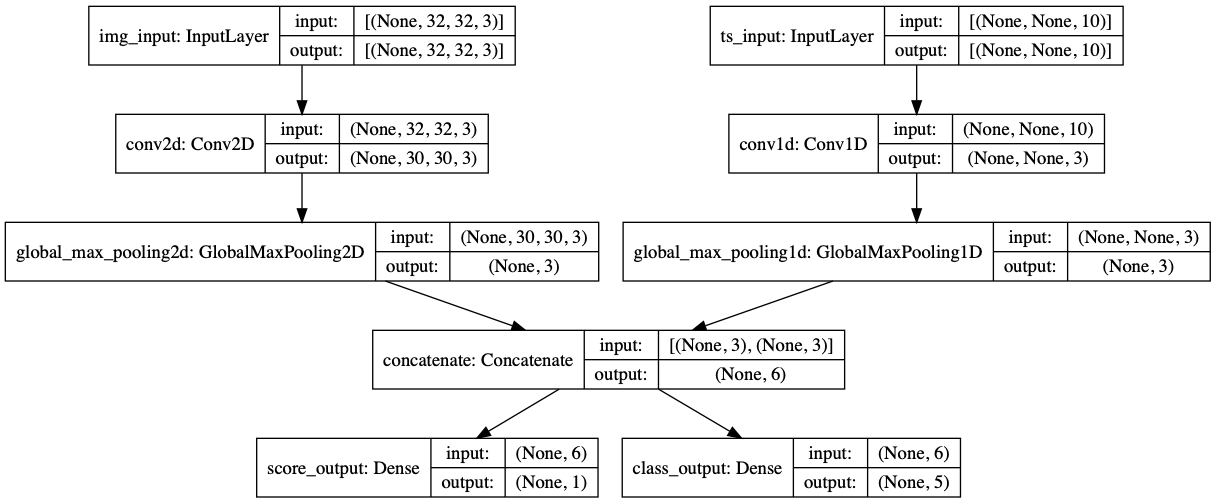

In [18]:
keras.utils.plot_model(model, './TF 2.0 Alpha/models/multi_input_and_output_model.png', show_shapes=True)

In [19]:
# At compilation time, we can specify different losses and metrics to different 
# ouptuts, by passing the loss and metrics functions as lists.
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError(),
          keras.losses.CategoricalCrossentropy()],
    metrics=[[keras.metrics.MeanAbsolutePercentageError(),
              keras.metrics.MeanAbsoluteError()],
             [keras.metrics.CategoricalAccuracy()]])

In [20]:
# Since we gave names to our output layers, we coud also specify per-output losses 
# and metrics via a dict.
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={'score_output': keras.losses.MeanSquaredError(),
          'class_output': keras.losses.CategoricalCrossentropy()},
    metrics={'score_output': [keras.metrics.MeanAbsolutePercentageError(),
                              keras.metrics.MeanAbsoluteError()],
             'class_output': [keras.metrics.CategoricalAccuracy()]})

In [21]:
# It's possible to give different weights to different output-specific losses 
# (for instance, one might wish to privilege the "score" loss in our example, 
# by giving to 2x the importance of the class loss), using the loss_weight 
# argument.
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={'score_output': keras.losses.MeanSquaredError(),
          'class_output': keras.losses.CategoricalCrossentropy()},
    metrics={'score_output': [keras.metrics.MeanAbsolutePercentageError(),
                              keras.metrics.MeanAbsoluteError()],
             'class_output': [keras.metrics.CategoricalAccuracy()]},
    loss_weight={'score_output': 2., 'class_output': 1.})

In [22]:
# You could also chose not to compute a loss for certain outputs, if these 
# outputs meant for prediction but not for training.
# List loss version
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[None, keras.losses.CategoricalCrossentropy()])

# Or dict loss version.
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={'class_output': keras.losses.CategoricalCrossentropy()})

W0518 12:56:59.763772 4448904640 training_utils.py:1152] Output score_output missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to score_output.


In [23]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError(),
          keras.losses.CategoricalCrossentropy()])

# Generate dummy Numpy data
img_data = np.random.random_sample(size=(100, 32, 32, 3))
ts_data = np.random.random_sample(size=(100, 20, 10))
score_targets = np.random.random_sample(size=(100, 1))
class_targets = np.random.random_sample(size=(100, 5))

# Fit on lists.
model.fit([img_data, ts_data], [score_targets, class_targets],
          batch_size=32,
          epochs=3)

# Alernatively, fit on dicts.
model.fit({'img_input': img_data, 'ts_input': ts_data},
          {'score_output': score_targets, 'class_output': class_targets},
          batch_size=32,
          epochs=3)

Epoch 1/3


 32/100 [========>.....................] - ETA: 1s - loss: 7.9454 - score_output_loss: 3.2715 - class_output_loss: 4.6739

100/100 [==============================] - 1s 5ms/sample - loss: 7.5657 - score_output_loss: 2.8058 - class_output_loss: 4.7599


Epoch 2/3
 32/100 [========>.....................] - ETA: 0s - loss: 6.8863 - score_output_loss: 2.0282 - class_output_loss: 4.8582

100/100 [==============================] - 0s 552us/sample - loss: 6.6367 - score_output_loss: 1.8619 - class_output_loss: 4.7748


Epoch 3/3
 32/100 [========>.....................] - ETA: 0s - loss: 6.3581 - score_output_loss: 1.5996 - class_output_loss: 4.7584

100/100 [==============================] - 0s 576us/sample - loss: 6.1606 - score_output_loss: 1.3728 - class_output_loss: 4.7879


Epoch 1/3


 32/100 [========>.....................] - ETA: 0s - loss: 5.8886 - score_output_loss: 1.0038 - class_output_loss: 4.8849

 64/100 [==================>...........] - ETA: 0s - loss: 5.7577 - score_output_loss: 1.0054 - class_output_loss: 4.7523

 96/100 [===========================>..] - ETA: 0s - loss: 5.7604 - score_output_loss: 1.0379 - class_output_loss: 4.7225

100/100 [==============================] - 0s 3ms/sample - loss: 5.7644 - score_output_loss: 1.0312 - class_output_loss: 4.7332


Epoch 2/3


 32/100 [========>.....................] - ETA: 0s - loss: 5.5905 - score_output_loss: 0.9760 - class_output_loss: 4.6145

 64/100 [==================>...........] - ETA: 0s - loss: 5.6521 - score_output_loss: 0.9204 - class_output_loss: 4.7317

 96/100 [===========================>..] - ETA: 0s - loss: 5.4444 - score_output_loss: 0.8586 - class_output_loss: 4.5858

100/100 [==============================] - 0s 2ms/sample - loss: 5.4302 - score_output_loss: 0.8446 - class_output_loss: 4.5856


Epoch 3/3


 32/100 [========>.....................] - ETA: 0s - loss: 5.0719 - score_output_loss: 0.6910 - class_output_loss: 4.3809

 64/100 [==================>...........] - ETA: 0s - loss: 5.1444 - score_output_loss: 0.6706 - class_output_loss: 4.4739

 96/100 [===========================>..] - ETA: 0s - loss: 5.1352 - score_output_loss: 0.6814 - class_output_loss: 4.4538

100/100 [==============================] - 0s 4ms/sample - loss: 5.1799 - score_output_loss: 0.6878 - class_output_loss: 4.4921


In [24]:
# Here's the Dataset use case: similarly as what we did for Numpy arrays, the 
# Dataset should return a tuple of dicts.
train_dataset = tf.data.Dataset.from_tensor_slices(
    ({'img_input': img_data, 'ts_input': ts_data},
     {'score_output': score_targets, 'class_output': class_targets}))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

model.fit(train_dataset, epochs=3)

Epoch 1/3
1/2 [==============>...............] - ETA: 0s - loss: 5.1906 - score_output_loss: 0.5876 - class_output_loss: 4.6030

2/2 [==============================] - 0s 87ms/step - loss: 4.9451 - score_output_loss: 0.5717 - class_output_loss: 4.4240


Epoch 2/3


1/2 [==============>...............] - ETA: 0s - loss: 5.0949 - score_output_loss: 0.5274 - class_output_loss: 4.5675

2/2 [==============================] - 0s 72ms/step - loss: 4.8568 - score_output_loss: 0.5133 - class_output_loss: 4.3925


Epoch 3/3


1/2 [==============>...............] - ETA: 0s - loss: 5.0073 - score_output_loss: 0.4729 - class_output_loss: 4.5344

2/2 [==============================] - 0s 94ms/step - loss: 4.7763 - score_output_loss: 0.4606 - class_output_loss: 4.3633


In [25]:
model = get_compiled_model()

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving.
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less".
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs".
        patience=2,
        verbose=1)
]
model.fit(x_train, y_train,
          epochs=20,
          batch_size=64,
          callbacks=callbacks,
          validation_split=0.2)

Train on 40000 samples, validate on 10000 samples


Epoch 1/20
   64/40000 [..............................] - ETA: 1:47 - loss: 2.2827 - sparse_categorical_accuracy: 0.1250

  576/40000 [..............................] - ETA: 15s - loss: 1.9298 - sparse_categorical_accuracy: 0.4080 

 1088/40000 [..............................] - ETA: 10s - loss: 1.6753 - sparse_categorical_accuracy: 0.5257

 1664/40000 [>.............................] - ETA: 7s - loss: 1.4547 - sparse_categorical_accuracy: 0.6010 

 2240/40000 [>.............................] - ETA: 6s - loss: 1.3043 - sparse_categorical_accuracy: 0.6469

 2880/40000 [=>............................] - ETA: 5s - loss: 1.1761 - sparse_categorical_accuracy: 0.6851

 3520/40000 [=>............................] - ETA: 5s - loss: 1.0716 - sparse_categorical_accuracy: 0.7128

 4160/40000 [==>...........................] - ETA: 4s - loss: 1.0001 - sparse_categorical_accuracy: 0.7303

 4736/40000 [==>...........................] - ETA: 4s - loss: 0.9412 - sparse_categorical_accuracy: 0.7460

 5312/40000 [==>...........................] - ETA: 4s - loss: 0.8920 - sparse_categorical_accuracy: 0.7594

 5888/40000 [===>..........................] - ETA: 4s - loss: 0.8600 - sparse_categorical_accuracy: 0.7677

 6464/40000 [===>..........................] - ETA: 3s - loss: 0.8218 - sparse_categorical_accuracy: 0.7788

 7040/40000 [====>.........................] - ETA: 3s - loss: 0.7856 - sparse_categorical_accuracy: 0.7888

 7616/40000 [====>.........................] - ETA: 3s - loss: 0.7556 - sparse_categorical_accuracy: 0.7966

 8192/40000 [=====>........................] - ETA: 3s - loss: 0.7311 - sparse_categorical_accuracy: 0.8031

 8704/40000 [=====>........................] - ETA: 3s - loss: 0.7101 - sparse_categorical_accuracy: 0.8086

 9280/40000 [=====>........................] - ETA: 3s - loss: 0.6911 - sparse_categorical_accuracy: 0.8131

 9856/40000 [======>.......................] - ETA: 3s - loss: 0.6734 - sparse_categorical_accuracy: 0.8176

10432/40000 [======>.......................] - ETA: 3s - loss: 0.6575 - sparse_categorical_accuracy: 0.8220

11008/40000 [=======>......................] - ETA: 3s - loss: 0.6416 - sparse_categorical_accuracy: 0.8256

11584/40000 [=======>......................] - ETA: 3s - loss: 0.6248 - sparse_categorical_accuracy: 0.8292

12160/40000 [========>.....................] - ETA: 2s - loss: 0.6121 - sparse_categorical_accuracy: 0.8320

12800/40000 [========>.....................] - ETA: 2s - loss: 0.5988 - sparse_categorical_accuracy: 0.8358

13504/40000 [=========>....................] - ETA: 2s - loss: 0.5845 - sparse_categorical_accuracy: 0.8396

14208/40000 [=========>....................] - ETA: 2s - loss: 0.5690 - sparse_categorical_accuracy: 0.8435

14912/40000 [==========>...................] - ETA: 2s - loss: 0.5560 - sparse_categorical_accuracy: 0.8466

15488/40000 [==========>...................] - ETA: 2s - loss: 0.5478 - sparse_categorical_accuracy: 0.8493

16000/40000 [===========>..................] - ETA: 2s - loss: 0.5388 - sparse_categorical_accuracy: 0.8516

16576/40000 [===========>..................] - ETA: 2s - loss: 0.5313 - sparse_categorical_accuracy: 0.8538

17088/40000 [===========>..................] - ETA: 2s - loss: 0.5250 - sparse_categorical_accuracy: 0.8551

17664/40000 [============>.................] - ETA: 2s - loss: 0.5175 - sparse_categorical_accuracy: 0.8569

18304/40000 [============>.................] - ETA: 2s - loss: 0.5106 - sparse_categorical_accuracy: 0.8587

18944/40000 [=============>................] - ETA: 2s - loss: 0.5043 - sparse_categorical_accuracy: 0.8604

19648/40000 [=============>................] - ETA: 1s - loss: 0.4975 - sparse_categorical_accuracy: 0.8619

20288/40000 [==============>...............] - ETA: 1s - loss: 0.4913 - sparse_categorical_accuracy: 0.8635

20928/40000 [==============>...............] - ETA: 1s - loss: 0.4851 - sparse_categorical_accuracy: 0.8651

21632/40000 [===============>..............] - ETA: 1s - loss: 0.4779 - sparse_categorical_accuracy: 0.8671

22272/40000 [===============>..............] - ETA: 1s - loss: 0.4734 - sparse_categorical_accuracy: 0.8683

22976/40000 [================>.............] - ETA: 1s - loss: 0.4676 - sparse_categorical_accuracy: 0.8700

23680/40000 [================>.............] - ETA: 1s - loss: 0.4630 - sparse_categorical_accuracy: 0.8711

24448/40000 [=================>............] - ETA: 1s - loss: 0.4569 - sparse_categorical_accuracy: 0.8723

25088/40000 [=================>............] - ETA: 1s - loss: 0.4526 - sparse_categorical_accuracy: 0.8734

25856/40000 [==================>...........] - ETA: 1s - loss: 0.4471 - sparse_categorical_accuracy: 0.8750

26752/40000 [===================>..........] - ETA: 1s - loss: 0.4433 - sparse_categorical_accuracy: 0.8761

27584/40000 [===================>..........] - ETA: 1s - loss: 0.4364 - sparse_categorical_accuracy: 0.8778

28416/40000 [====================>.........] - ETA: 1s - loss: 0.4321 - sparse_categorical_accuracy: 0.8786

29184/40000 [====================>.........] - ETA: 0s - loss: 0.4261 - sparse_categorical_accuracy: 0.8807

29952/40000 [=====================>........] - ETA: 0s - loss: 0.4210 - sparse_categorical_accuracy: 0.8818

30848/40000 [======================>.......] - ETA: 0s - loss: 0.4164 - sparse_categorical_accuracy: 0.8828

31488/40000 [======================>.......] - ETA: 0s - loss: 0.4123 - sparse_categorical_accuracy: 0.8841

32256/40000 [=======================>......] - ETA: 0s - loss: 0.4084 - sparse_categorical_accuracy: 0.8850

32960/40000 [=======================>......] - ETA: 0s - loss: 0.4049 - sparse_categorical_accuracy: 0.8859

33792/40000 [========================>.....] - ETA: 0s - loss: 0.4010 - sparse_categorical_accuracy: 0.8869

34624/40000 [========================>.....] - ETA: 0s - loss: 0.3966 - sparse_categorical_accuracy: 0.8882

35520/40000 [=========================>....] - ETA: 0s - loss: 0.3933 - sparse_categorical_accuracy: 0.8892

36416/40000 [==========================>...] - ETA: 0s - loss: 0.3895 - sparse_categorical_accuracy: 0.8901

37312/40000 [==========================>...] - ETA: 0s - loss: 0.3847 - sparse_categorical_accuracy: 0.8913

38272/40000 [===========================>..] - ETA: 0s - loss: 0.3806 - sparse_categorical_accuracy: 0.8924



39232/40000 [============================>.] - ETA: 0s - loss: 0.3775 - sparse_categorical_accuracy: 0.8931

39872/40000 [============================>.] - ETA: 0s - loss: 0.3749 - sparse_categorical_accuracy: 0.8938

40000/40000 [==============================] - 4s 95us/sample - loss: 0.3741 - sparse_categorical_accuracy: 0.8940 - val_loss: 0.2374 - val_sparse_categorical_accuracy: 0.9320


Epoch 2/20
   64/40000 [..............................] - ETA: 6s - loss: 0.2638 - sparse_categorical_accuracy: 0.8906

  768/40000 [..............................] - ETA: 3s - loss: 0.2178 - sparse_categorical_accuracy: 0.9310

 1728/40000 [>.............................] - ETA: 2s - loss: 0.2119 - sparse_categorical_accuracy: 0.9410

 2816/40000 [=>............................] - ETA: 2s - loss: 0.2059 - sparse_categorical_accuracy: 0.9421

 3776/40000 [=>............................] - ETA: 2s - loss: 0.2164 - sparse_categorical_accuracy: 0.9388

 4736/40000 [==>...........................] - ETA: 1s - loss: 0.2039 - sparse_categorical_accuracy: 0.9409

 5504/40000 [===>..........................] - ETA: 2s - loss: 0.2005 - sparse_categorical_accuracy: 0.9437

 6336/40000 [===>..........................] - ETA: 1s - loss: 0.2015 - sparse_categorical_accuracy: 0.9437

 6528/40000 [===>..........................] - ETA: 2s - loss: 0.2011 - sparse_categorical_accuracy: 0.9438

 6848/40000 [====>.........................] - ETA: 2s - loss: 0.1993 - sparse_categorical_accuracy: 0.9441

 7232/40000 [====>.........................] - ETA: 2s - loss: 0.1981 - sparse_categorical_accuracy: 0.9439

 7616/40000 [====>.........................] - ETA: 2s - loss: 0.1962 - sparse_categorical_accuracy: 0.9439

 8128/40000 [=====>........................] - ETA: 2s - loss: 0.2002 - sparse_categorical_accuracy: 0.9427

 8896/40000 [=====>........................] - ETA: 2s - loss: 0.2006 - sparse_categorical_accuracy: 0.9427

 9664/40000 [======>.......................] - ETA: 2s - loss: 0.1998 - sparse_categorical_accuracy: 0.9427

10432/40000 [======>.......................] - ETA: 2s - loss: 0.1964 - sparse_categorical_accuracy: 0.9431

11200/40000 [=======>......................] - ETA: 2s - loss: 0.1981 - sparse_categorical_accuracy: 0.9424

11968/40000 [=======>......................] - ETA: 2s - loss: 0.1978 - sparse_categorical_accuracy: 0.9425

12800/40000 [========>.....................] - ETA: 2s - loss: 0.2004 - sparse_categorical_accuracy: 0.9416

13632/40000 [=========>....................] - ETA: 1s - loss: 0.1962 - sparse_categorical_accuracy: 0.9431

14400/40000 [=========>....................] - ETA: 1s - loss: 0.1949 - sparse_categorical_accuracy: 0.9435

15168/40000 [==========>...................] - ETA: 1s - loss: 0.1917 - sparse_categorical_accuracy: 0.9446

15936/40000 [==========>...................] - ETA: 1s - loss: 0.1919 - sparse_categorical_accuracy: 0.9443

16640/40000 [===========>..................] - ETA: 1s - loss: 0.1934 - sparse_categorical_accuracy: 0.9430

17472/40000 [============>.................] - ETA: 1s - loss: 0.1907 - sparse_categorical_accuracy: 0.9437

18240/40000 [============>.................] - ETA: 1s - loss: 0.1913 - sparse_categorical_accuracy: 0.9436

19008/40000 [=============>................] - ETA: 1s - loss: 0.1887 - sparse_categorical_accuracy: 0.9443

19776/40000 [=============>................] - ETA: 1s - loss: 0.1879 - sparse_categorical_accuracy: 0.9444

20608/40000 [==============>...............] - ETA: 1s - loss: 0.1881 - sparse_categorical_accuracy: 0.9444

21376/40000 [===============>..............] - ETA: 1s - loss: 0.1870 - sparse_categorical_accuracy: 0.9447

22080/40000 [===============>..............] - ETA: 1s - loss: 0.1881 - sparse_categorical_accuracy: 0.9447

22592/40000 [===============>..............] - ETA: 1s - loss: 0.1872 - sparse_categorical_accuracy: 0.9452

23104/40000 [================>.............] - ETA: 1s - loss: 0.1862 - sparse_categorical_accuracy: 0.9454

23680/40000 [================>.............] - ETA: 1s - loss: 0.1866 - sparse_categorical_accuracy: 0.9453

24320/40000 [=================>............] - ETA: 1s - loss: 0.1865 - sparse_categorical_accuracy: 0.9454

25088/40000 [=================>............] - ETA: 1s - loss: 0.1860 - sparse_categorical_accuracy: 0.9457

25792/40000 [==================>...........] - ETA: 1s - loss: 0.1851 - sparse_categorical_accuracy: 0.9460

26496/40000 [==================>...........] - ETA: 0s - loss: 0.1830 - sparse_categorical_accuracy: 0.9464

27072/40000 [===================>..........] - ETA: 0s - loss: 0.1840 - sparse_categorical_accuracy: 0.9461

27648/40000 [===================>..........] - ETA: 0s - loss: 0.1844 - sparse_categorical_accuracy: 0.9460

28352/40000 [====================>.........] - ETA: 0s - loss: 0.1847 - sparse_categorical_accuracy: 0.9461

29056/40000 [====================>.........] - ETA: 0s - loss: 0.1834 - sparse_categorical_accuracy: 0.9466

29568/40000 [=====================>........] - ETA: 0s - loss: 0.1826 - sparse_categorical_accuracy: 0.9468

30272/40000 [=====================>........] - ETA: 0s - loss: 0.1825 - sparse_categorical_accuracy: 0.9468

30848/40000 [======================>.......] - ETA: 0s - loss: 0.1822 - sparse_categorical_accuracy: 0.9469

31424/40000 [======================>.......] - ETA: 0s - loss: 0.1819 - sparse_categorical_accuracy: 0.9470

32000/40000 [=======================>......] - ETA: 0s - loss: 0.1826 - sparse_categorical_accuracy: 0.9468

32640/40000 [=======================>......] - ETA: 0s - loss: 0.1835 - sparse_categorical_accuracy: 0.9466

33280/40000 [=======================>......] - ETA: 0s - loss: 0.1827 - sparse_categorical_accuracy: 0.9469

33920/40000 [========================>.....] - ETA: 0s - loss: 0.1824 - sparse_categorical_accuracy: 0.9470

34688/40000 [=========================>....] - ETA: 0s - loss: 0.1818 - sparse_categorical_accuracy: 0.9471

35456/40000 [=========================>....] - ETA: 0s - loss: 0.1812 - sparse_categorical_accuracy: 0.9473

36224/40000 [==========================>...] - ETA: 0s - loss: 0.1811 - sparse_categorical_accuracy: 0.9474

37056/40000 [==========================>...] - ETA: 0s - loss: 0.1805 - sparse_categorical_accuracy: 0.9474

37760/40000 [===========================>..] - ETA: 0s - loss: 0.1802 - sparse_categorical_accuracy: 0.9476

38272/40000 [===========================>..] - ETA: 0s - loss: 0.1799 - sparse_categorical_accuracy: 0.9476

38912/40000 [============================>.] - ETA: 0s - loss: 0.1793 - sparse_categorical_accuracy: 0.9477

39488/40000 [============================>.] - ETA: 0s - loss: 0.1788 - sparse_categorical_accuracy: 0.9476

40000/40000 [==============================] - 3s 86us/sample - loss: 0.1787 - sparse_categorical_accuracy: 0.9475 - val_loss: 0.1844 - val_sparse_categorical_accuracy: 0.9446


Epoch 3/20
   64/40000 [..............................] - ETA: 4s - loss: 0.2160 - sparse_categorical_accuracy: 0.9375

  576/40000 [..............................] - ETA: 4s - loss: 0.1484 - sparse_categorical_accuracy: 0.9566

 1152/40000 [..............................] - ETA: 3s - loss: 0.1456 - sparse_categorical_accuracy: 0.9583

 1792/40000 [>.............................] - ETA: 3s - loss: 0.1365 - sparse_categorical_accuracy: 0.9609

 2560/40000 [>.............................] - ETA: 3s - loss: 0.1429 - sparse_categorical_accuracy: 0.9598

 3264/40000 [=>............................] - ETA: 3s - loss: 0.1372 - sparse_categorical_accuracy: 0.9602

 4032/40000 [==>...........................] - ETA: 2s - loss: 0.1397 - sparse_categorical_accuracy: 0.9581

 4736/40000 [==>...........................] - ETA: 2s - loss: 0.1412 - sparse_categorical_accuracy: 0.9563

 5440/40000 [===>..........................] - ETA: 2s - loss: 0.1419 - sparse_categorical_accuracy: 0.9557

 6208/40000 [===>..........................] - ETA: 2s - loss: 0.1413 - sparse_categorical_accuracy: 0.9555

 6976/40000 [====>.........................] - ETA: 2s - loss: 0.1404 - sparse_categorical_accuracy: 0.9556

 7680/40000 [====>.........................] - ETA: 2s - loss: 0.1387 - sparse_categorical_accuracy: 0.9565



 8320/40000 [=====>........................] - ETA: 2s - loss: 0.1368 - sparse_categorical_accuracy: 0.9571

 8832/40000 [=====>........................] - ETA: 2s - loss: 0.1349 - sparse_categorical_accuracy: 0.9575

 9408/40000 [======>.......................] - ETA: 2s - loss: 0.1337 - sparse_categorical_accuracy: 0.9580

10112/40000 [======>.......................] - ETA: 2s - loss: 0.1332 - sparse_categorical_accuracy: 0.9581

10880/40000 [=======>......................] - ETA: 2s - loss: 0.1341 - sparse_categorical_accuracy: 0.9579

11648/40000 [=======>......................] - ETA: 2s - loss: 0.1351 - sparse_categorical_accuracy: 0.9580

12416/40000 [========>.....................] - ETA: 2s - loss: 0.1337 - sparse_categorical_accuracy: 0.9581

12992/40000 [========>.....................] - ETA: 2s - loss: 0.1347 - sparse_categorical_accuracy: 0.9576

13760/40000 [=========>....................] - ETA: 1s - loss: 0.1363 - sparse_categorical_accuracy: 0.9578

14528/40000 [=========>....................] - ETA: 1s - loss: 0.1340 - sparse_categorical_accuracy: 0.9586

15232/40000 [==========>...................] - ETA: 1s - loss: 0.1339 - sparse_categorical_accuracy: 0.9584

15936/40000 [==========>...................] - ETA: 1s - loss: 0.1337 - sparse_categorical_accuracy: 0.9588

16704/40000 [===========>..................] - ETA: 1s - loss: 0.1322 - sparse_categorical_accuracy: 0.9592

17472/40000 [============>.................] - ETA: 1s - loss: 0.1315 - sparse_categorical_accuracy: 0.9594

18240/40000 [============>.................] - ETA: 1s - loss: 0.1321 - sparse_categorical_accuracy: 0.9590

19008/40000 [=============>................] - ETA: 1s - loss: 0.1321 - sparse_categorical_accuracy: 0.9589

19584/40000 [=============>................] - ETA: 1s - loss: 0.1330 - sparse_categorical_accuracy: 0.9584

20160/40000 [==============>...............] - ETA: 1s - loss: 0.1337 - sparse_categorical_accuracy: 0.9585

20800/40000 [==============>...............] - ETA: 1s - loss: 0.1353 - sparse_categorical_accuracy: 0.9583

21440/40000 [===============>..............] - ETA: 1s - loss: 0.1346 - sparse_categorical_accuracy: 0.9584

21952/40000 [===============>..............] - ETA: 1s - loss: 0.1352 - sparse_categorical_accuracy: 0.9582

22528/40000 [===============>..............] - ETA: 1s - loss: 0.1349 - sparse_categorical_accuracy: 0.9581

23296/40000 [================>.............] - ETA: 1s - loss: 0.1341 - sparse_categorical_accuracy: 0.9585

24064/40000 [=================>............] - ETA: 1s - loss: 0.1342 - sparse_categorical_accuracy: 0.9588

24768/40000 [=================>............] - ETA: 1s - loss: 0.1338 - sparse_categorical_accuracy: 0.9589

25408/40000 [==================>...........] - ETA: 1s - loss: 0.1337 - sparse_categorical_accuracy: 0.9590

25984/40000 [==================>...........] - ETA: 1s - loss: 0.1335 - sparse_categorical_accuracy: 0.9591

26496/40000 [==================>...........] - ETA: 1s - loss: 0.1339 - sparse_categorical_accuracy: 0.9589

27072/40000 [===================>..........] - ETA: 0s - loss: 0.1341 - sparse_categorical_accuracy: 0.9589

27648/40000 [===================>..........] - ETA: 0s - loss: 0.1338 - sparse_categorical_accuracy: 0.9589

28288/40000 [====================>.........] - ETA: 0s - loss: 0.1339 - sparse_categorical_accuracy: 0.9589

28864/40000 [====================>.........] - ETA: 0s - loss: 0.1334 - sparse_categorical_accuracy: 0.9592

29440/40000 [=====================>........] - ETA: 0s - loss: 0.1329 - sparse_categorical_accuracy: 0.9593

30144/40000 [=====================>........] - ETA: 0s - loss: 0.1330 - sparse_categorical_accuracy: 0.9593

30848/40000 [======================>.......] - ETA: 0s - loss: 0.1325 - sparse_categorical_accuracy: 0.9594

31488/40000 [======================>.......] - ETA: 0s - loss: 0.1320 - sparse_categorical_accuracy: 0.9596

32064/40000 [=======================>......] - ETA: 0s - loss: 0.1321 - sparse_categorical_accuracy: 0.9595

32576/40000 [=======================>......] - ETA: 0s - loss: 0.1329 - sparse_categorical_accuracy: 0.9594

33152/40000 [=======================>......] - ETA: 0s - loss: 0.1327 - sparse_categorical_accuracy: 0.9595

33664/40000 [========================>.....] - ETA: 0s - loss: 0.1321 - sparse_categorical_accuracy: 0.9597

34240/40000 [========================>.....] - ETA: 0s - loss: 0.1314 - sparse_categorical_accuracy: 0.9599

34944/40000 [=========================>....] - ETA: 0s - loss: 0.1305 - sparse_categorical_accuracy: 0.9601

35648/40000 [=========================>....] - ETA: 0s - loss: 0.1302 - sparse_categorical_accuracy: 0.9602

36416/40000 [==========================>...] - ETA: 0s - loss: 0.1305 - sparse_categorical_accuracy: 0.9603

37056/40000 [==========================>...] - ETA: 0s - loss: 0.1306 - sparse_categorical_accuracy: 0.9602

37824/40000 [===========================>..] - ETA: 0s - loss: 0.1304 - sparse_categorical_accuracy: 0.9605

38592/40000 [===========================>..] - ETA: 0s - loss: 0.1309 - sparse_categorical_accuracy: 0.9602

39360/40000 [============================>.] - ETA: 0s - loss: 0.1304 - sparse_categorical_accuracy: 0.9604

40000/40000 [==============================] - 3s 87us/sample - loss: 0.1302 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.1672 - val_sparse_categorical_accuracy: 0.9516


Epoch 4/20
   64/40000 [..............................] - ETA: 6s - loss: 0.0986 - sparse_categorical_accuracy: 0.9531

  320/40000 [..............................] - ETA: 8s - loss: 0.1276 - sparse_categorical_accuracy: 0.9563

  640/40000 [..............................] - ETA: 7s - loss: 0.1475 - sparse_categorical_accuracy: 0.9547

 1216/40000 [..............................] - ETA: 5s - loss: 0.1332 - sparse_categorical_accuracy: 0.9581

 1792/40000 [>.............................] - ETA: 4s - loss: 0.1176 - sparse_categorical_accuracy: 0.9621

 2368/40000 [>.............................] - ETA: 4s - loss: 0.1182 - sparse_categorical_accuracy: 0.9616

 2880/40000 [=>............................] - ETA: 4s - loss: 0.1140 - sparse_categorical_accuracy: 0.9639

 3648/40000 [=>............................] - ETA: 3s - loss: 0.1135 - sparse_categorical_accuracy: 0.9644

 4416/40000 [==>...........................] - ETA: 3s - loss: 0.1104 - sparse_categorical_accuracy: 0.9665

 5184/40000 [==>...........................] - ETA: 3s - loss: 0.1083 - sparse_categorical_accuracy: 0.9672

 5888/40000 [===>..........................] - ETA: 3s - loss: 0.1075 - sparse_categorical_accuracy: 0.9671

 6400/40000 [===>..........................] - ETA: 3s - loss: 0.1078 - sparse_categorical_accuracy: 0.9677

 6912/40000 [====>.........................] - ETA: 3s - loss: 0.1080 - sparse_categorical_accuracy: 0.9677

 7616/40000 [====>.........................] - ETA: 3s - loss: 0.1112 - sparse_categorical_accuracy: 0.9668

 8192/40000 [=====>........................] - ETA: 3s - loss: 0.1086 - sparse_categorical_accuracy: 0.9675

 8896/40000 [=====>........................] - ETA: 2s - loss: 0.1054 - sparse_categorical_accuracy: 0.9688

 9600/40000 [======>.......................] - ETA: 2s - loss: 0.1077 - sparse_categorical_accuracy: 0.9685

10176/40000 [======>.......................] - ETA: 2s - loss: 0.1081 - sparse_categorical_accuracy: 0.9688

10944/40000 [=======>......................] - ETA: 2s - loss: 0.1072 - sparse_categorical_accuracy: 0.9687

11712/40000 [=======>......................] - ETA: 2s - loss: 0.1062 - sparse_categorical_accuracy: 0.9688

12480/40000 [========>.....................] - ETA: 2s - loss: 0.1068 - sparse_categorical_accuracy: 0.9690

13248/40000 [========>.....................] - ETA: 2s - loss: 0.1056 - sparse_categorical_accuracy: 0.9688

14080/40000 [=========>....................] - ETA: 2s - loss: 0.1043 - sparse_categorical_accuracy: 0.9692

14912/40000 [==========>...................] - ETA: 2s - loss: 0.1054 - sparse_categorical_accuracy: 0.9687

15744/40000 [==========>...................] - ETA: 2s - loss: 0.1069 - sparse_categorical_accuracy: 0.9678

16512/40000 [===========>..................] - ETA: 1s - loss: 0.1055 - sparse_categorical_accuracy: 0.9683

17152/40000 [===========>..................] - ETA: 1s - loss: 0.1060 - sparse_categorical_accuracy: 0.9682

17856/40000 [============>.................] - ETA: 1s - loss: 0.1061 - sparse_categorical_accuracy: 0.9681

18496/40000 [============>.................] - ETA: 1s - loss: 0.1049 - sparse_categorical_accuracy: 0.9685

18688/40000 [=============>................] - ETA: 1s - loss: 0.1050 - sparse_categorical_accuracy: 0.9685

19328/40000 [=============>................] - ETA: 1s - loss: 0.1044 - sparse_categorical_accuracy: 0.9685

20224/40000 [==============>...............] - ETA: 1s - loss: 0.1051 - sparse_categorical_accuracy: 0.9680

21056/40000 [==============>...............] - ETA: 1s - loss: 0.1046 - sparse_categorical_accuracy: 0.9683

21888/40000 [===============>..............] - ETA: 1s - loss: 0.1055 - sparse_categorical_accuracy: 0.9683

22400/40000 [===============>..............] - ETA: 1s - loss: 0.1052 - sparse_categorical_accuracy: 0.9683

23104/40000 [================>.............] - ETA: 1s - loss: 0.1047 - sparse_categorical_accuracy: 0.9685

23744/40000 [================>.............] - ETA: 1s - loss: 0.1038 - sparse_categorical_accuracy: 0.9686

24320/40000 [=================>............] - ETA: 1s - loss: 0.1031 - sparse_categorical_accuracy: 0.9688

24896/40000 [=================>............] - ETA: 1s - loss: 0.1029 - sparse_categorical_accuracy: 0.9687

25344/40000 [==================>...........] - ETA: 1s - loss: 0.1034 - sparse_categorical_accuracy: 0.9686

25984/40000 [==================>...........] - ETA: 1s - loss: 0.1031 - sparse_categorical_accuracy: 0.9687

26624/40000 [==================>...........] - ETA: 1s - loss: 0.1026 - sparse_categorical_accuracy: 0.9688

27392/40000 [===================>..........] - ETA: 1s - loss: 0.1031 - sparse_categorical_accuracy: 0.9686

28096/40000 [====================>.........] - ETA: 0s - loss: 0.1035 - sparse_categorical_accuracy: 0.9684

28672/40000 [====================>.........] - ETA: 0s - loss: 0.1032 - sparse_categorical_accuracy: 0.9686

29184/40000 [====================>.........] - ETA: 0s - loss: 0.1029 - sparse_categorical_accuracy: 0.9686

29824/40000 [=====================>........] - ETA: 0s - loss: 0.1028 - sparse_categorical_accuracy: 0.9684

30592/40000 [=====================>........] - ETA: 0s - loss: 0.1025 - sparse_categorical_accuracy: 0.9684

31232/40000 [======================>.......] - ETA: 0s - loss: 0.1031 - sparse_categorical_accuracy: 0.9685

31872/40000 [======================>.......] - ETA: 0s - loss: 0.1033 - sparse_categorical_accuracy: 0.9684

32320/40000 [=======================>......] - ETA: 0s - loss: 0.1034 - sparse_categorical_accuracy: 0.9683

32896/40000 [=======================>......] - ETA: 0s - loss: 0.1035 - sparse_categorical_accuracy: 0.9683

33280/40000 [=======================>......] - ETA: 0s - loss: 0.1035 - sparse_categorical_accuracy: 0.9682

33728/40000 [========================>.....] - ETA: 0s - loss: 0.1036 - sparse_categorical_accuracy: 0.9681

34048/40000 [========================>.....] - ETA: 0s - loss: 0.1037 - sparse_categorical_accuracy: 0.9681

34432/40000 [========================>.....] - ETA: 0s - loss: 0.1038 - sparse_categorical_accuracy: 0.9681

34944/40000 [=========================>....] - ETA: 0s - loss: 0.1033 - sparse_categorical_accuracy: 0.9683

35456/40000 [=========================>....] - ETA: 0s - loss: 0.1035 - sparse_categorical_accuracy: 0.9681

35968/40000 [=========================>....] - ETA: 0s - loss: 0.1032 - sparse_categorical_accuracy: 0.9682

36352/40000 [==========================>...] - ETA: 0s - loss: 0.1036 - sparse_categorical_accuracy: 0.9682

36864/40000 [==========================>...] - ETA: 0s - loss: 0.1035 - sparse_categorical_accuracy: 0.9681

37248/40000 [==========================>...] - ETA: 0s - loss: 0.1036 - sparse_categorical_accuracy: 0.9682

37696/40000 [===========================>..] - ETA: 0s - loss: 0.1037 - sparse_categorical_accuracy: 0.9684

38080/40000 [===========================>..] - ETA: 0s - loss: 0.1038 - sparse_categorical_accuracy: 0.9684

38656/40000 [===========================>..] - ETA: 0s - loss: 0.1036 - sparse_categorical_accuracy: 0.9684

39232/40000 [============================>.] - ETA: 0s - loss: 0.1033 - sparse_categorical_accuracy: 0.9686

39680/40000 [============================>.] - ETA: 0s - loss: 0.1038 - sparse_categorical_accuracy: 0.9685

39744/40000 [============================>.] - ETA: 0s - loss: 0.1037 - sparse_categorical_accuracy: 0.9685

40000/40000 [==============================] - 4s 112us/sample - loss: 0.1035 - sparse_categorical_accuracy: 0.9685 - val_loss: 0.1568 - val_sparse_categorical_accuracy: 0.9554


Epoch 5/20
   64/40000 [..............................] - ETA: 6s - loss: 0.0293 - sparse_categorical_accuracy: 1.0000

  640/40000 [..............................] - ETA: 3s - loss: 0.0485 - sparse_categorical_accuracy: 0.9891

 1216/40000 [..............................] - ETA: 3s - loss: 0.0643 - sparse_categorical_accuracy: 0.9836

 1664/40000 [>.............................] - ETA: 3s - loss: 0.0698 - sparse_categorical_accuracy: 0.9808

 2112/40000 [>.............................] - ETA: 4s - loss: 0.0846 - sparse_categorical_accuracy: 0.9749

 2624/40000 [>.............................] - ETA: 3s - loss: 0.0912 - sparse_categorical_accuracy: 0.9722

 3136/40000 [=>............................] - ETA: 3s - loss: 0.0917 - sparse_categorical_accuracy: 0.9710

 3584/40000 [=>............................] - ETA: 3s - loss: 0.0897 - sparse_categorical_accuracy: 0.9727

 4224/40000 [==>...........................] - ETA: 3s - loss: 0.0930 - sparse_categorical_accuracy: 0.9732

 4864/40000 [==>...........................] - ETA: 3s - loss: 0.0916 - sparse_categorical_accuracy: 0.9737

 5376/40000 [===>..........................] - ETA: 3s - loss: 0.0929 - sparse_categorical_accuracy: 0.9728

 5824/40000 [===>..........................] - ETA: 3s - loss: 0.0917 - sparse_categorical_accuracy: 0.9730

 6080/40000 [===>..........................] - ETA: 3s - loss: 0.0905 - sparse_categorical_accuracy: 0.9735

 6528/40000 [===>..........................] - ETA: 3s - loss: 0.0877 - sparse_categorical_accuracy: 0.9741

 7104/40000 [====>.........................] - ETA: 3s - loss: 0.0856 - sparse_categorical_accuracy: 0.9747

 7744/40000 [====>.........................] - ETA: 3s - loss: 0.0862 - sparse_categorical_accuracy: 0.9740

 8384/40000 [=====>........................] - ETA: 3s - loss: 0.0856 - sparse_categorical_accuracy: 0.9740

 9088/40000 [=====>........................] - ETA: 3s - loss: 0.0855 - sparse_categorical_accuracy: 0.9738

 9792/40000 [======>.......................] - ETA: 3s - loss: 0.0837 - sparse_categorical_accuracy: 0.9746

10176/40000 [======>.......................] - ETA: 3s - loss: 0.0835 - sparse_categorical_accuracy: 0.9746

10688/40000 [=======>......................] - ETA: 2s - loss: 0.0855 - sparse_categorical_accuracy: 0.9740

11072/40000 [=======>......................] - ETA: 2s - loss: 0.0849 - sparse_categorical_accuracy: 0.9743

11648/40000 [=======>......................] - ETA: 2s - loss: 0.0859 - sparse_categorical_accuracy: 0.9741

12160/40000 [========>.....................] - ETA: 2s - loss: 0.0866 - sparse_categorical_accuracy: 0.9736

12736/40000 [========>.....................] - ETA: 2s - loss: 0.0868 - sparse_categorical_accuracy: 0.9731

13440/40000 [=========>....................] - ETA: 2s - loss: 0.0873 - sparse_categorical_accuracy: 0.9730

14144/40000 [=========>....................] - ETA: 2s - loss: 0.0858 - sparse_categorical_accuracy: 0.9736

14848/40000 [==========>...................] - ETA: 2s - loss: 0.0853 - sparse_categorical_accuracy: 0.9737

15616/40000 [==========>...................] - ETA: 2s - loss: 0.0839 - sparse_categorical_accuracy: 0.9737

16384/40000 [===========>..................] - ETA: 2s - loss: 0.0856 - sparse_categorical_accuracy: 0.9738

16960/40000 [===========>..................] - ETA: 2s - loss: 0.0848 - sparse_categorical_accuracy: 0.9738

17536/40000 [============>.................] - ETA: 2s - loss: 0.0846 - sparse_categorical_accuracy: 0.9738

18112/40000 [============>.................] - ETA: 2s - loss: 0.0835 - sparse_categorical_accuracy: 0.9742

18752/40000 [=============>................] - ETA: 1s - loss: 0.0832 - sparse_categorical_accuracy: 0.9741

19456/40000 [=============>................] - ETA: 1s - loss: 0.0837 - sparse_categorical_accuracy: 0.9739

20096/40000 [==============>...............] - ETA: 1s - loss: 0.0834 - sparse_categorical_accuracy: 0.9740

20864/40000 [==============>...............] - ETA: 1s - loss: 0.0825 - sparse_categorical_accuracy: 0.9743

21440/40000 [===============>..............] - ETA: 1s - loss: 0.0823 - sparse_categorical_accuracy: 0.9744

21952/40000 [===============>..............] - ETA: 1s - loss: 0.0820 - sparse_categorical_accuracy: 0.9746

22400/40000 [===============>..............] - ETA: 1s - loss: 0.0819 - sparse_categorical_accuracy: 0.9746

22976/40000 [================>.............] - ETA: 1s - loss: 0.0819 - sparse_categorical_accuracy: 0.9746

23552/40000 [================>.............] - ETA: 1s - loss: 0.0822 - sparse_categorical_accuracy: 0.9745

23680/40000 [================>.............] - ETA: 1s - loss: 0.0824 - sparse_categorical_accuracy: 0.9745

24128/40000 [=================>............] - ETA: 1s - loss: 0.0827 - sparse_categorical_accuracy: 0.9743

24640/40000 [=================>............] - ETA: 1s - loss: 0.0827 - sparse_categorical_accuracy: 0.9743

25344/40000 [==================>...........] - ETA: 1s - loss: 0.0824 - sparse_categorical_accuracy: 0.9745

26048/40000 [==================>...........] - ETA: 1s - loss: 0.0829 - sparse_categorical_accuracy: 0.9743

26624/40000 [==================>...........] - ETA: 1s - loss: 0.0825 - sparse_categorical_accuracy: 0.9744

27200/40000 [===================>..........] - ETA: 1s - loss: 0.0827 - sparse_categorical_accuracy: 0.9743

28032/40000 [====================>.........] - ETA: 1s - loss: 0.0827 - sparse_categorical_accuracy: 0.9743

28800/40000 [====================>.........] - ETA: 1s - loss: 0.0827 - sparse_categorical_accuracy: 0.9742

29248/40000 [====================>.........] - ETA: 1s - loss: 0.0823 - sparse_categorical_accuracy: 0.9744

29632/40000 [=====================>........] - ETA: 0s - loss: 0.0822 - sparse_categorical_accuracy: 0.9744

30080/40000 [=====================>........] - ETA: 0s - loss: 0.0822 - sparse_categorical_accuracy: 0.9743

30656/40000 [=====================>........] - ETA: 0s - loss: 0.0824 - sparse_categorical_accuracy: 0.9742

31296/40000 [======================>.......] - ETA: 0s - loss: 0.0824 - sparse_categorical_accuracy: 0.9742

32000/40000 [=======================>......] - ETA: 0s - loss: 0.0823 - sparse_categorical_accuracy: 0.9742

32832/40000 [=======================>......] - ETA: 0s - loss: 0.0823 - sparse_categorical_accuracy: 0.9742

33664/40000 [========================>.....] - ETA: 0s - loss: 0.0826 - sparse_categorical_accuracy: 0.9742

34368/40000 [========================>.....] - ETA: 0s - loss: 0.0822 - sparse_categorical_accuracy: 0.9742

35008/40000 [=========================>....] - ETA: 0s - loss: 0.0827 - sparse_categorical_accuracy: 0.9742

35648/40000 [=========================>....] - ETA: 0s - loss: 0.0824 - sparse_categorical_accuracy: 0.9742

36416/40000 [==========================>...] - ETA: 0s - loss: 0.0828 - sparse_categorical_accuracy: 0.9740

37248/40000 [==========================>...] - ETA: 0s - loss: 0.0829 - sparse_categorical_accuracy: 0.9740

37952/40000 [===========================>..] - ETA: 0s - loss: 0.0833 - sparse_categorical_accuracy: 0.9738

38784/40000 [============================>.] - ETA: 0s - loss: 0.0832 - sparse_categorical_accuracy: 0.9738

39616/40000 [============================>.] - ETA: 0s - loss: 0.0834 - sparse_categorical_accuracy: 0.9738

40000/40000 [==============================] - 4s 98us/sample - loss: 0.0833 - sparse_categorical_accuracy: 0.9738 - val_loss: 0.1766 - val_sparse_categorical_accuracy: 0.9514


Epoch 6/20
   64/40000 [..............................] - ETA: 5s - loss: 0.0139 - sparse_categorical_accuracy: 1.0000

  768/40000 [..............................] - ETA: 3s - loss: 0.0661 - sparse_categorical_accuracy: 0.9779

 1472/40000 [>.............................] - ETA: 2s - loss: 0.0638 - sparse_categorical_accuracy: 0.9789

 2240/40000 [>.............................] - ETA: 2s - loss: 0.0604 - sparse_categorical_accuracy: 0.9812

 3200/40000 [=>............................] - ETA: 2s - loss: 0.0619 - sparse_categorical_accuracy: 0.9822

 4096/40000 [==>...........................] - ETA: 2s - loss: 0.0614 - sparse_categorical_accuracy: 0.9819

 4864/40000 [==>...........................] - ETA: 2s - loss: 0.0612 - sparse_categorical_accuracy: 0.9821

 5568/40000 [===>..........................] - ETA: 2s - loss: 0.0633 - sparse_categorical_accuracy: 0.9815

 6272/40000 [===>..........................] - ETA: 2s - loss: 0.0666 - sparse_categorical_accuracy: 0.9801

 7296/40000 [====>.........................] - ETA: 2s - loss: 0.0635 - sparse_categorical_accuracy: 0.9809

 8384/40000 [=====>........................] - ETA: 1s - loss: 0.0602 - sparse_categorical_accuracy: 0.9822

 9472/40000 [======>.......................] - ETA: 1s - loss: 0.0588 - sparse_categorical_accuracy: 0.9826

10496/40000 [======>.......................] - ETA: 1s - loss: 0.0626 - sparse_categorical_accuracy: 0.9814

11520/40000 [=======>......................] - ETA: 1s - loss: 0.0640 - sparse_categorical_accuracy: 0.9810

12544/40000 [========>.....................] - ETA: 1s - loss: 0.0651 - sparse_categorical_accuracy: 0.9805

13568/40000 [=========>....................] - ETA: 1s - loss: 0.0654 - sparse_categorical_accuracy: 0.9804

14144/40000 [=========>....................] - ETA: 1s - loss: 0.0651 - sparse_categorical_accuracy: 0.9803

14784/40000 [==========>...................] - ETA: 1s - loss: 0.0661 - sparse_categorical_accuracy: 0.9805

15680/40000 [==========>...................] - ETA: 1s - loss: 0.0649 - sparse_categorical_accuracy: 0.9809

16512/40000 [===========>..................] - ETA: 1s - loss: 0.0648 - sparse_categorical_accuracy: 0.9806

17408/40000 [============>.................] - ETA: 1s - loss: 0.0653 - sparse_categorical_accuracy: 0.9805

18240/40000 [============>.................] - ETA: 1s - loss: 0.0656 - sparse_categorical_accuracy: 0.9802

19008/40000 [=============>................] - ETA: 1s - loss: 0.0669 - sparse_categorical_accuracy: 0.9800

19904/40000 [=============>................] - ETA: 1s - loss: 0.0700 - sparse_categorical_accuracy: 0.9794

20800/40000 [==============>...............] - ETA: 1s - loss: 0.0689 - sparse_categorical_accuracy: 0.9797

21504/40000 [===============>..............] - ETA: 1s - loss: 0.0682 - sparse_categorical_accuracy: 0.9798

22336/40000 [===============>..............] - ETA: 1s - loss: 0.0678 - sparse_categorical_accuracy: 0.9799

23104/40000 [================>.............] - ETA: 1s - loss: 0.0674 - sparse_categorical_accuracy: 0.9800

23936/40000 [================>.............] - ETA: 0s - loss: 0.0683 - sparse_categorical_accuracy: 0.9799

24768/40000 [=================>............] - ETA: 0s - loss: 0.0687 - sparse_categorical_accuracy: 0.9800

25536/40000 [==================>...........] - ETA: 0s - loss: 0.0681 - sparse_categorical_accuracy: 0.9800

26432/40000 [==================>...........] - ETA: 0s - loss: 0.0682 - sparse_categorical_accuracy: 0.9799

27200/40000 [===================>..........] - ETA: 0s - loss: 0.0693 - sparse_categorical_accuracy: 0.9794

27520/40000 [===================>..........] - ETA: 0s - loss: 0.0694 - sparse_categorical_accuracy: 0.9793

28416/40000 [====================>.........] - ETA: 0s - loss: 0.0697 - sparse_categorical_accuracy: 0.9791

29376/40000 [=====================>........] - ETA: 0s - loss: 0.0705 - sparse_categorical_accuracy: 0.9788

30464/40000 [=====================>........] - ETA: 0s - loss: 0.0704 - sparse_categorical_accuracy: 0.9788

31488/40000 [======================>.......] - ETA: 0s - loss: 0.0696 - sparse_categorical_accuracy: 0.9791

32576/40000 [=======================>......] - ETA: 0s - loss: 0.0695 - sparse_categorical_accuracy: 0.9789

33728/40000 [========================>.....] - ETA: 0s - loss: 0.0694 - sparse_categorical_accuracy: 0.9790

34880/40000 [=========================>....] - ETA: 0s - loss: 0.0699 - sparse_categorical_accuracy: 0.9787

35968/40000 [=========================>....] - ETA: 0s - loss: 0.0701 - sparse_categorical_accuracy: 0.9788

37056/40000 [==========================>...] - ETA: 0s - loss: 0.0707 - sparse_categorical_accuracy: 0.9787

38144/40000 [===========================>..] - ETA: 0s - loss: 0.0711 - sparse_categorical_accuracy: 0.9786

39040/40000 [============================>.] - ETA: 0s - loss: 0.0709 - sparse_categorical_accuracy: 0.9787

40000/40000 [==============================] - 3s 65us/sample - loss: 0.0708 - sparse_categorical_accuracy: 0.9787 - val_loss: 0.1601 - val_sparse_categorical_accuracy: 0.9573


Epoch 00006: early stopping


- Many built-in callbacks are available:

	- ModelCheckpoint: Periodically save the model.
	- EarlyStopping: Stop training when training is no longer improving the validation metrics.
	- TensorBoard: periodically write model logs that can be visualized in TensorBoard.
	- CSVLogger: streams loss and metrics data to a CSV file.

In [26]:
# You can create a custom callback by extending the base class 
# keras.callbacks.Callback. A callback has access to its associated model through 
# the class property self.model.
class LossHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs):
        self.losses = []

    def on_batch_end(self, batch, logs):
        self.losses.append(logs.get('loss'))

In [27]:
# When you're training model on relatively large datasets, it's crucial to save 
# checkpoints of your model at frequent intervals.
model = get_compiled_model()

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='./TF 2.0 Alpha/models/mymodel_{epoch}.h5',
        # Path where to save the model.
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        save_best_only=True,
        monitor='val_loss',
        verbose=1)
]
model.fit(x_train, y_train,
          epochs=3,
          batch_size=64,
          callbacks=callbacks,
          validation_split=0.2)

Train on 40000 samples, validate on 10000 samples


Epoch 1/3


   64/40000 [..............................] - ETA: 2:26 - loss: 2.3023 - sparse_categorical_accuracy: 0.0469

  704/40000 [..............................] - ETA: 16s - loss: 1.9509 - sparse_categorical_accuracy: 0.4474 

 1216/40000 [..............................] - ETA: 10s - loss: 1.7078 - sparse_categorical_accuracy: 0.5444

 1792/40000 [>.............................] - ETA: 8s - loss: 1.5077 - sparse_categorical_accuracy: 0.6066 

 2560/40000 [>.............................] - ETA: 6s - loss: 1.2981 - sparse_categorical_accuracy: 0.6625

 3264/40000 [=>............................] - ETA: 5s - loss: 1.1583 - sparse_categorical_accuracy: 0.7022

 3904/40000 [=>............................] - ETA: 5s - loss: 1.0629 - sparse_categorical_accuracy: 0.7262

 4672/40000 [==>...........................] - ETA: 4s - loss: 0.9784 - sparse_categorical_accuracy: 0.7466

 5376/40000 [===>..........................] - ETA: 4s - loss: 0.9109 - sparse_categorical_accuracy: 0.7628

 6016/40000 [===>..........................] - ETA: 3s - loss: 0.8621 - sparse_categorical_accuracy: 0.7724

 6656/40000 [===>..........................] - ETA: 3s - loss: 0.8248 - sparse_categorical_accuracy: 0.7814

 7360/40000 [====>.........................] - ETA: 3s - loss: 0.7933 - sparse_categorical_accuracy: 0.7867

 8064/40000 [=====>........................] - ETA: 3s - loss: 0.7589 - sparse_categorical_accuracy: 0.7959

 8832/40000 [=====>........................] - ETA: 3s - loss: 0.7262 - sparse_categorical_accuracy: 0.8048

 9664/40000 [======>.......................] - ETA: 3s - loss: 0.6956 - sparse_categorical_accuracy: 0.8127

10432/40000 [======>.......................] - ETA: 2s - loss: 0.6707 - sparse_categorical_accuracy: 0.8194

11200/40000 [=======>......................] - ETA: 2s - loss: 0.6502 - sparse_categorical_accuracy: 0.8246

11840/40000 [=======>......................] - ETA: 2s - loss: 0.6362 - sparse_categorical_accuracy: 0.8278

12416/40000 [========>.....................] - ETA: 2s - loss: 0.6235 - sparse_categorical_accuracy: 0.8309

13184/40000 [========>.....................] - ETA: 2s - loss: 0.6086 - sparse_categorical_accuracy: 0.8346

13952/40000 [=========>....................] - ETA: 2s - loss: 0.5926 - sparse_categorical_accuracy: 0.8384

14656/40000 [=========>....................] - ETA: 2s - loss: 0.5776 - sparse_categorical_accuracy: 0.8422

15296/40000 [==========>...................] - ETA: 2s - loss: 0.5673 - sparse_categorical_accuracy: 0.8449

16000/40000 [===========>..................] - ETA: 2s - loss: 0.5546 - sparse_categorical_accuracy: 0.8486

16704/40000 [===========>..................] - ETA: 2s - loss: 0.5460 - sparse_categorical_accuracy: 0.8502

17472/40000 [============>.................] - ETA: 1s - loss: 0.5354 - sparse_categorical_accuracy: 0.8533

18176/40000 [============>.................] - ETA: 1s - loss: 0.5251 - sparse_categorical_accuracy: 0.8559

18944/40000 [=============>................] - ETA: 1s - loss: 0.5156 - sparse_categorical_accuracy: 0.8586

19712/40000 [=============>................] - ETA: 1s - loss: 0.5065 - sparse_categorical_accuracy: 0.8608

20416/40000 [==============>...............] - ETA: 1s - loss: 0.4987 - sparse_categorical_accuracy: 0.8628

21056/40000 [==============>...............] - ETA: 1s - loss: 0.4917 - sparse_categorical_accuracy: 0.8646

21632/40000 [===============>..............] - ETA: 1s - loss: 0.4858 - sparse_categorical_accuracy: 0.8661

22208/40000 [===============>..............] - ETA: 1s - loss: 0.4799 - sparse_categorical_accuracy: 0.8674

22720/40000 [================>.............] - ETA: 1s - loss: 0.4763 - sparse_categorical_accuracy: 0.8684

23232/40000 [================>.............] - ETA: 1s - loss: 0.4710 - sparse_categorical_accuracy: 0.8698

23744/40000 [================>.............] - ETA: 1s - loss: 0.4660 - sparse_categorical_accuracy: 0.8712

24512/40000 [=================>............] - ETA: 1s - loss: 0.4614 - sparse_categorical_accuracy: 0.8725

25280/40000 [=================>............] - ETA: 1s - loss: 0.4536 - sparse_categorical_accuracy: 0.8747

26048/40000 [==================>...........] - ETA: 1s - loss: 0.4481 - sparse_categorical_accuracy: 0.8757

26816/40000 [===================>..........] - ETA: 1s - loss: 0.4426 - sparse_categorical_accuracy: 0.8771

27520/40000 [===================>..........] - ETA: 1s - loss: 0.4384 - sparse_categorical_accuracy: 0.8783

28224/40000 [====================>.........] - ETA: 0s - loss: 0.4332 - sparse_categorical_accuracy: 0.8795

28864/40000 [====================>.........] - ETA: 0s - loss: 0.4311 - sparse_categorical_accuracy: 0.8800

29568/40000 [=====================>........] - ETA: 0s - loss: 0.4268 - sparse_categorical_accuracy: 0.8814

30272/40000 [=====================>........] - ETA: 0s - loss: 0.4223 - sparse_categorical_accuracy: 0.8825

30976/40000 [======================>.......] - ETA: 0s - loss: 0.4186 - sparse_categorical_accuracy: 0.8836

31616/40000 [======================>.......] - ETA: 0s - loss: 0.4157 - sparse_categorical_accuracy: 0.8843

32256/40000 [=======================>......] - ETA: 0s - loss: 0.4129 - sparse_categorical_accuracy: 0.8848

32896/40000 [=======================>......] - ETA: 0s - loss: 0.4098 - sparse_categorical_accuracy: 0.8858

33472/40000 [========================>.....] - ETA: 0s - loss: 0.4060 - sparse_categorical_accuracy: 0.8868

34176/40000 [========================>.....] - ETA: 0s - loss: 0.4021 - sparse_categorical_accuracy: 0.8878

35008/40000 [=========================>....] - ETA: 0s - loss: 0.3974 - sparse_categorical_accuracy: 0.8890

35648/40000 [=========================>....] - ETA: 0s - loss: 0.3959 - sparse_categorical_accuracy: 0.8896

36224/40000 [==========================>...] - ETA: 0s - loss: 0.3936 - sparse_categorical_accuracy: 0.8902

36864/40000 [==========================>...] - ETA: 0s - loss: 0.3908 - sparse_categorical_accuracy: 0.8907

37440/40000 [===========================>..] - ETA: 0s - loss: 0.3880 - sparse_categorical_accuracy: 0.8916

38080/40000 [===========================>..] - ETA: 0s - loss: 0.3854 - sparse_categorical_accuracy: 0.8924

38592/40000 [===========================>..] - ETA: 0s - loss: 0.3828 - sparse_categorical_accuracy: 0.8931

39168/40000 [============================>.] - ETA: 0s - loss: 0.3806 - sparse_categorical_accuracy: 0.8937

39744/40000 [============================>.] - ETA: 0s - loss: 0.3785 - sparse_categorical_accuracy: 0.8942


Epoch 00001: val_loss improved from inf to 0.23492, saving model to ./TF 2.0 Alpha/models/mymodel_1.h5
40000/40000 [==============================] - 4s 99us/sample - loss: 0.3780 - sparse_categorical_accuracy: 0.8944 - val_loss: 0.2349 - val_sparse_categorical_accuracy: 0.9317


Epoch 2/3
   64/40000 [..............................] - ETA: 4s - loss: 0.0706 - sparse_categorical_accuracy: 1.0000

  576/40000 [..............................] - ETA: 4s - loss: 0.2058 - sparse_categorical_accuracy: 0.9479

 1216/40000 [..............................] - ETA: 3s - loss: 0.2026 - sparse_categorical_accuracy: 0.9474

 1792/40000 [>.............................] - ETA: 3s - loss: 0.2048 - sparse_categorical_accuracy: 0.9464

 2432/40000 [>.............................] - ETA: 3s - loss: 0.2079 - sparse_categorical_accuracy: 0.9437

 3072/40000 [=>............................] - ETA: 3s - loss: 0.2263 - sparse_categorical_accuracy: 0.9346

 3712/40000 [=>............................] - ETA: 3s - loss: 0.2195 - sparse_categorical_accuracy: 0.9359

 4416/40000 [==>...........................] - ETA: 3s - loss: 0.2123 - sparse_categorical_accuracy: 0.9384

 5056/40000 [==>...........................] - ETA: 3s - loss: 0.2113 - sparse_categorical_accuracy: 0.9393

 5696/40000 [===>..........................] - ETA: 2s - loss: 0.2112 - sparse_categorical_accuracy: 0.9398

 6208/40000 [===>..........................] - ETA: 2s - loss: 0.2095 - sparse_categorical_accuracy: 0.9407

 6848/40000 [====>.........................] - ETA: 2s - loss: 0.2096 - sparse_categorical_accuracy: 0.9400

 7488/40000 [====>.........................] - ETA: 2s - loss: 0.2088 - sparse_categorical_accuracy: 0.9395

 8128/40000 [=====>........................] - ETA: 2s - loss: 0.2040 - sparse_categorical_accuracy: 0.9414

 8768/40000 [=====>........................] - ETA: 2s - loss: 0.2035 - sparse_categorical_accuracy: 0.9414

 9408/40000 [======>.......................] - ETA: 2s - loss: 0.2026 - sparse_categorical_accuracy: 0.9408

10112/40000 [======>.......................] - ETA: 2s - loss: 0.2006 - sparse_categorical_accuracy: 0.9417

10816/40000 [=======>......................] - ETA: 2s - loss: 0.1995 - sparse_categorical_accuracy: 0.9420

11648/40000 [=======>......................] - ETA: 2s - loss: 0.1981 - sparse_categorical_accuracy: 0.9422

12416/40000 [========>.....................] - ETA: 2s - loss: 0.1940 - sparse_categorical_accuracy: 0.9434

13056/40000 [========>.....................] - ETA: 2s - loss: 0.1925 - sparse_categorical_accuracy: 0.9434

13696/40000 [=========>....................] - ETA: 2s - loss: 0.1915 - sparse_categorical_accuracy: 0.9434

14272/40000 [=========>....................] - ETA: 2s - loss: 0.1899 - sparse_categorical_accuracy: 0.9435

14784/40000 [==========>...................] - ETA: 2s - loss: 0.1887 - sparse_categorical_accuracy: 0.9440

15424/40000 [==========>...................] - ETA: 2s - loss: 0.1896 - sparse_categorical_accuracy: 0.9439

16192/40000 [===========>..................] - ETA: 1s - loss: 0.1897 - sparse_categorical_accuracy: 0.9438

16896/40000 [===========>..................] - ETA: 1s - loss: 0.1896 - sparse_categorical_accuracy: 0.9438

17536/40000 [============>.................] - ETA: 1s - loss: 0.1900 - sparse_categorical_accuracy: 0.9435

18240/40000 [============>.................] - ETA: 1s - loss: 0.1910 - sparse_categorical_accuracy: 0.9435

18880/40000 [=============>................] - ETA: 1s - loss: 0.1904 - sparse_categorical_accuracy: 0.9434

19648/40000 [=============>................] - ETA: 1s - loss: 0.1906 - sparse_categorical_accuracy: 0.9437

20288/40000 [==============>...............] - ETA: 1s - loss: 0.1882 - sparse_categorical_accuracy: 0.9442

21120/40000 [==============>...............] - ETA: 1s - loss: 0.1869 - sparse_categorical_accuracy: 0.9448

21952/40000 [===============>..............] - ETA: 1s - loss: 0.1861 - sparse_categorical_accuracy: 0.9453

22656/40000 [===============>..............] - ETA: 1s - loss: 0.1859 - sparse_categorical_accuracy: 0.9454

23232/40000 [================>.............] - ETA: 1s - loss: 0.1854 - sparse_categorical_accuracy: 0.9456

23808/40000 [================>.............] - ETA: 1s - loss: 0.1848 - sparse_categorical_accuracy: 0.9458

24640/40000 [=================>............] - ETA: 1s - loss: 0.1847 - sparse_categorical_accuracy: 0.9457

25344/40000 [==================>...........] - ETA: 1s - loss: 0.1840 - sparse_categorical_accuracy: 0.9459

25984/40000 [==================>...........] - ETA: 1s - loss: 0.1834 - sparse_categorical_accuracy: 0.9460

26624/40000 [==================>...........] - ETA: 1s - loss: 0.1827 - sparse_categorical_accuracy: 0.9462

27392/40000 [===================>..........] - ETA: 1s - loss: 0.1822 - sparse_categorical_accuracy: 0.9462

28096/40000 [====================>.........] - ETA: 0s - loss: 0.1829 - sparse_categorical_accuracy: 0.9459

28800/40000 [====================>.........] - ETA: 0s - loss: 0.1827 - sparse_categorical_accuracy: 0.9459

29568/40000 [=====================>........] - ETA: 0s - loss: 0.1816 - sparse_categorical_accuracy: 0.9462

30272/40000 [=====================>........] - ETA: 0s - loss: 0.1809 - sparse_categorical_accuracy: 0.9464

30912/40000 [======================>.......] - ETA: 0s - loss: 0.1810 - sparse_categorical_accuracy: 0.9464

31680/40000 [======================>.......] - ETA: 0s - loss: 0.1806 - sparse_categorical_accuracy: 0.9467

32384/40000 [=======================>......] - ETA: 0s - loss: 0.1804 - sparse_categorical_accuracy: 0.9467

33088/40000 [=======================>......] - ETA: 0s - loss: 0.1806 - sparse_categorical_accuracy: 0.9468

33792/40000 [========================>.....] - ETA: 0s - loss: 0.1806 - sparse_categorical_accuracy: 0.9470

34560/40000 [========================>.....] - ETA: 0s - loss: 0.1805 - sparse_categorical_accuracy: 0.9468

35328/40000 [=========================>....] - ETA: 0s - loss: 0.1794 - sparse_categorical_accuracy: 0.9469

36032/40000 [==========================>...] - ETA: 0s - loss: 0.1786 - sparse_categorical_accuracy: 0.9470

36800/40000 [==========================>...] - ETA: 0s - loss: 0.1789 - sparse_categorical_accuracy: 0.9470

37632/40000 [===========================>..] - ETA: 0s - loss: 0.1788 - sparse_categorical_accuracy: 0.9470

38400/40000 [===========================>..] - ETA: 0s - loss: 0.1777 - sparse_categorical_accuracy: 0.9471

39104/40000 [============================>.] - ETA: 0s - loss: 0.1772 - sparse_categorical_accuracy: 0.9473

39744/40000 [============================>.] - ETA: 0s - loss: 0.1765 - sparse_categorical_accuracy: 0.9476


Epoch 00002: val_loss improved from 0.23492 to 0.18382, saving model to ./TF 2.0 Alpha/models/mymodel_2.h5
40000/40000 [==============================] - 3s 87us/sample - loss: 0.1766 - sparse_categorical_accuracy: 0.9475 - val_loss: 0.1838 - val_sparse_categorical_accuracy: 0.9448


Epoch 3/3
   64/40000 [..............................] - ETA: 4s - loss: 0.2483 - sparse_categorical_accuracy: 0.9531

  640/40000 [..............................] - ETA: 3s - loss: 0.1494 - sparse_categorical_accuracy: 0.9563

 1408/40000 [>.............................] - ETA: 3s - loss: 0.1245 - sparse_categorical_accuracy: 0.9602

 2176/40000 [>.............................] - ETA: 2s - loss: 0.1174 - sparse_categorical_accuracy: 0.9642

 2944/40000 [=>............................] - ETA: 2s - loss: 0.1238 - sparse_categorical_accuracy: 0.9626

 3584/40000 [=>............................] - ETA: 2s - loss: 0.1219 - sparse_categorical_accuracy: 0.9643

 4288/40000 [==>...........................] - ETA: 2s - loss: 0.1210 - sparse_categorical_accuracy: 0.9646

 5056/40000 [==>...........................] - ETA: 2s - loss: 0.1216 - sparse_categorical_accuracy: 0.9628

 5824/40000 [===>..........................] - ETA: 2s - loss: 0.1218 - sparse_categorical_accuracy: 0.9633

 6592/40000 [===>..........................] - ETA: 2s - loss: 0.1221 - sparse_categorical_accuracy: 0.9627

 7296/40000 [====>.........................] - ETA: 2s - loss: 0.1228 - sparse_categorical_accuracy: 0.9630



 8000/40000 [=====>........................] - ETA: 2s - loss: 0.1246 - sparse_categorical_accuracy: 0.9622

 8576/40000 [=====>........................] - ETA: 2s - loss: 0.1254 - sparse_categorical_accuracy: 0.9618

 9152/40000 [=====>........................] - ETA: 2s - loss: 0.1255 - sparse_categorical_accuracy: 0.9618

 9792/40000 [======>.......................] - ETA: 2s - loss: 0.1260 - sparse_categorical_accuracy: 0.9617

10496/40000 [======>.......................] - ETA: 2s - loss: 0.1263 - sparse_categorical_accuracy: 0.9614

11328/40000 [=======>......................] - ETA: 2s - loss: 0.1274 - sparse_categorical_accuracy: 0.9614

12224/40000 [========>.....................] - ETA: 2s - loss: 0.1282 - sparse_categorical_accuracy: 0.9609

12992/40000 [========>.....................] - ETA: 1s - loss: 0.1277 - sparse_categorical_accuracy: 0.9614

13568/40000 [=========>....................] - ETA: 1s - loss: 0.1272 - sparse_categorical_accuracy: 0.9617

14208/40000 [=========>....................] - ETA: 1s - loss: 0.1301 - sparse_categorical_accuracy: 0.9608

14912/40000 [==========>...................] - ETA: 1s - loss: 0.1297 - sparse_categorical_accuracy: 0.9604

15616/40000 [==========>...................] - ETA: 1s - loss: 0.1283 - sparse_categorical_accuracy: 0.9605

16320/40000 [===========>..................] - ETA: 1s - loss: 0.1278 - sparse_categorical_accuracy: 0.9610

17088/40000 [===========>..................] - ETA: 1s - loss: 0.1308 - sparse_categorical_accuracy: 0.9606

17856/40000 [============>.................] - ETA: 1s - loss: 0.1298 - sparse_categorical_accuracy: 0.9607

18624/40000 [============>.................] - ETA: 1s - loss: 0.1299 - sparse_categorical_accuracy: 0.9607

19392/40000 [=============>................] - ETA: 1s - loss: 0.1310 - sparse_categorical_accuracy: 0.9602

20032/40000 [==============>...............] - ETA: 1s - loss: 0.1308 - sparse_categorical_accuracy: 0.9602

20672/40000 [==============>...............] - ETA: 1s - loss: 0.1306 - sparse_categorical_accuracy: 0.9602

21312/40000 [==============>...............] - ETA: 1s - loss: 0.1309 - sparse_categorical_accuracy: 0.9602

21952/40000 [===============>..............] - ETA: 1s - loss: 0.1297 - sparse_categorical_accuracy: 0.9604

22528/40000 [===============>..............] - ETA: 1s - loss: 0.1298 - sparse_categorical_accuracy: 0.9604

23168/40000 [================>.............] - ETA: 1s - loss: 0.1299 - sparse_categorical_accuracy: 0.9603

24000/40000 [=================>............] - ETA: 1s - loss: 0.1294 - sparse_categorical_accuracy: 0.9603

24704/40000 [=================>............] - ETA: 1s - loss: 0.1293 - sparse_categorical_accuracy: 0.9607

25408/40000 [==================>...........] - ETA: 1s - loss: 0.1289 - sparse_categorical_accuracy: 0.9609

26176/40000 [==================>...........] - ETA: 1s - loss: 0.1297 - sparse_categorical_accuracy: 0.9607

27008/40000 [===================>..........] - ETA: 0s - loss: 0.1293 - sparse_categorical_accuracy: 0.9610

27712/40000 [===================>..........] - ETA: 0s - loss: 0.1287 - sparse_categorical_accuracy: 0.9613

28416/40000 [====================>.........] - ETA: 0s - loss: 0.1287 - sparse_categorical_accuracy: 0.9611

28992/40000 [====================>.........] - ETA: 0s - loss: 0.1283 - sparse_categorical_accuracy: 0.9612

29568/40000 [=====================>........] - ETA: 0s - loss: 0.1278 - sparse_categorical_accuracy: 0.9613

30080/40000 [=====================>........] - ETA: 0s - loss: 0.1279 - sparse_categorical_accuracy: 0.9613

30592/40000 [=====================>........] - ETA: 0s - loss: 0.1278 - sparse_categorical_accuracy: 0.9614

31168/40000 [======================>.......] - ETA: 0s - loss: 0.1277 - sparse_categorical_accuracy: 0.9616

31680/40000 [======================>.......] - ETA: 0s - loss: 0.1281 - sparse_categorical_accuracy: 0.9616

32256/40000 [=======================>......] - ETA: 0s - loss: 0.1280 - sparse_categorical_accuracy: 0.9616

32768/40000 [=======================>......] - ETA: 0s - loss: 0.1277 - sparse_categorical_accuracy: 0.9616

33152/40000 [=======================>......] - ETA: 0s - loss: 0.1278 - sparse_categorical_accuracy: 0.9617

33600/40000 [========================>.....] - ETA: 0s - loss: 0.1276 - sparse_categorical_accuracy: 0.9618

34368/40000 [========================>.....] - ETA: 0s - loss: 0.1272 - sparse_categorical_accuracy: 0.9619

34944/40000 [=========================>....] - ETA: 0s - loss: 0.1277 - sparse_categorical_accuracy: 0.9618

35520/40000 [=========================>....] - ETA: 0s - loss: 0.1274 - sparse_categorical_accuracy: 0.9620

36160/40000 [==========================>...] - ETA: 0s - loss: 0.1268 - sparse_categorical_accuracy: 0.9621

36672/40000 [==========================>...] - ETA: 0s - loss: 0.1259 - sparse_categorical_accuracy: 0.9625

37184/40000 [==========================>...] - ETA: 0s - loss: 0.1257 - sparse_categorical_accuracy: 0.9626

37824/40000 [===========================>..] - ETA: 0s - loss: 0.1256 - sparse_categorical_accuracy: 0.9626

38400/40000 [===========================>..] - ETA: 0s - loss: 0.1250 - sparse_categorical_accuracy: 0.9628

39168/40000 [============================>.] - ETA: 0s - loss: 0.1250 - sparse_categorical_accuracy: 0.9626

39936/40000 [============================>.] - ETA: 0s - loss: 0.1251 - sparse_categorical_accuracy: 0.9626


Epoch 00003: val_loss improved from 0.18382 to 0.15452, saving model to ./TF 2.0 Alpha/models/mymodel_3.h5
40000/40000 [==============================] - 3s 87us/sample - loss: 0.1253 - sparse_categorical_accuracy: 0.9626 - val_loss: 0.1545 - val_sparse_categorical_accuracy: 0.9556


In [28]:
initial_learning_rate = 0.1
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
# If the argument staircase is True, then global_step / decay_steps is an integer 
# division and the decayed learning rate follows a staircase function.

optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

- Callbacks do have access to all metrics, including validation metrics. You can thus use a callback that modifies the current learning rate on the optimizer. In fact, this is even built-in as the ReduceLROnPlateau callback.

- TensorBoard, a browser-based application that you can run locally that provides you with:

	- Live plots of the loss and metrics for training and evaluation
	- (optionally) Visualizations of the histograms of your layer activations.
	- (optionally) 3D visualizations of the embedding spaces learned by your Embedding layers.

In [ ]:
tensorboard_cbk = keras.callbacks.TensorBoard(log_dir='./TF 2.0 Alpha/logs')
model.fit(dataset, epochs=10, callbacks=[tensorboard_cbk])

In [30]:
# The TensorBoard callback has many useful options, including whether to log 
# embeddings, histograms, and how often to write logs.
keras.callbacks.TensorBoard(
  log_dir='./TF 2.0 Alpha/logs',
  histogram_freq=0,  # How often to log histogram visualizations.
  embeddings_freq=0,  # How often to log embedding visualizations.
  update_freq='epoch')  # How often to write logs (default: once per epoch).

- Calling a model inside a GradientTape scope enables you to retrieve the gradients of the trainable weights of the layer with respect to a loss value. Using an optimizer instance, you can use these gradients to update these variables (which you can retrieve using model.trainable_variables).

In [31]:
# Get the model.
inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Instantiate an optimizer.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy()

# Prepare the training dataset.
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Iterate over epochs.
for epoch in range(3):
  print('Start of epoch %d' % (epoch,))

  # Iterate over the batches of the dataset.
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

    # Open a GradientTape to record the operations run
    # during the forward pass, which enables autodifferentiation.
    with tf.GradientTape() as tape:

      # Run the forward pass of the layer.
      # The operations that the layer applies
      # to its inputs are going to be recorded
      # on the GradientTape.
      logits = model(x_batch_train)  # Logits for this minibatch

      # Compute the loss value for this minibatch.
      loss_value = loss_fn(y_batch_train, logits)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss.
    grads = tape.gradient(loss_value, model.trainable_variables)

    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Log every 200 batches.
    if step % 200 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 64))

Start of epoch 0


Training loss (for one batch) at step 0: 2.4182581901550293
Seen so far: 64 samples


Training loss (for one batch) at step 200: 2.306825637817383
Seen so far: 12864 samples


Training loss (for one batch) at step 400: 2.2152392864227295
Seen so far: 25664 samples


Training loss (for one batch) at step 600: 2.201694965362549
Seen so far: 38464 samples


Start of epoch 1


Training loss (for one batch) at step 0: 2.118992805480957
Seen so far: 64 samples


Training loss (for one batch) at step 200: 2.0500216484069824
Seen so far: 12864 samples


Training loss (for one batch) at step 400: 1.9291081428527832
Seen so far: 25664 samples


Training loss (for one batch) at step 600: 1.9234504699707031
Seen so far: 38464 samples


Start of epoch 2


Training loss (for one batch) at step 0: 1.787705659866333
Seen so far: 64 samples


Training loss (for one batch) at step 200: 1.7103900909423828
Seen so far: 12864 samples


Training loss (for one batch) at step 400: 1.539388656616211
Seen so far: 25664 samples


Training loss (for one batch) at step 600: 1.5636757612228394
Seen so far: 38464 samples


In [32]:
# Let's compute SparseCategoricalAccuracy on validation data at the end of each 
# epoch.

# Get model
inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Instantiate an optimizer to train the model.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy()

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

# Prepare the training dataset.
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)


# Iterate over epochs.
for epoch in range(3):
  print('Start of epoch %d' % (epoch,))

  # Iterate over the batches of the dataset.
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      logits = model(x_batch_train)
      loss_value = loss_fn(y_batch_train, logits)
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Update training metric.
    train_acc_metric(y_batch_train, logits)

    # Log every 200 batches.
    if step % 200 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 64))

  # Display metrics at the end of each epoch.
  train_acc = train_acc_metric.result()
  print('Training acc over epoch: %s' % (float(train_acc),))
  # Reset training metrics at the end of each epoch
  train_acc_metric.reset_states()

  # Run a validation loop at the end of each epoch.
  for x_batch_val, y_batch_val in val_dataset:
    val_logits = model(x_batch_val)
    # Update val metrics
    val_acc_metric(y_batch_val, val_logits)
  val_acc = val_acc_metric.result()
  val_acc_metric.reset_states()
  print('Validation acc: %s' % (float(val_acc),))

Start of epoch 0


Training loss (for one batch) at step 0: 2.325489044189453
Seen so far: 64 samples


Training loss (for one batch) at step 200: 2.2656679153442383
Seen so far: 12864 samples


Training loss (for one batch) at step 400: 2.2255849838256836
Seen so far: 25664 samples


Training loss (for one batch) at step 600: 2.0682365894317627
Seen so far: 38464 samples


Training acc over epoch: 0.22665999829769135


Validation acc: 0.3691999912261963
Start of epoch 1


Training loss (for one batch) at step 0: 1.9388067722320557
Seen so far: 64 samples


Training loss (for one batch) at step 200: 1.9620091915130615
Seen so far: 12864 samples


Training loss (for one batch) at step 400: 1.9548808336257935
Seen so far: 25664 samples


Training loss (for one batch) at step 600: 1.6714332103729248
Seen so far: 38464 samples


Training acc over epoch: 0.4619399905204773


Validation acc: 0.5953999757766724
Start of epoch 2


Training loss (for one batch) at step 0: 1.4793272018432617
Seen so far: 64 samples


Training loss (for one batch) at step 200: 1.5970827341079712
Seen so far: 12864 samples


Training loss (for one batch) at step 400: 1.5993034839630127
Seen so far: 25664 samples


Training loss (for one batch) at step 600: 1.2638717889785767
Seen so far: 38464 samples


Training acc over epoch: 0.6549000144004822


Validation acc: 0.7419999837875366


In [33]:
# Featuring a layer that creates a regularization loss.

class ActivityRegularizationLayer(layers.Layer):

  def call(self, inputs):
    self.add_loss(1e-2 * tf.reduce_sum(inputs))
    return inputs

inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
# Insert activity regularization as a layer
x = ActivityRegularizationLayer()(x)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [34]:
logits = model(x_train[:64])
print(model.losses)

[<tf.Tensor: id=999225, shape=(), dtype=float32, numpy=6.9135923>]


- The tracked losses are first cleared at the start of the model __call__, so you will only see the losses created during this one forward pass. For instance, calling the model repeatedly and then querying losses only displays the latest losses, created during the last call.

In [35]:
optimizer = keras.optimizers.SGD(learning_rate=1e-3)

for epoch in range(3):
  print('Start of epoch %d' % (epoch,))

  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      logits = model(x_batch_train)
      loss_value = loss_fn(y_batch_train, logits)

      # Add extra losses created during this forward pass.
      loss_value += sum(model.losses)

    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Log every 200 batches.
    if step % 200 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 64))

Start of epoch 0


Training loss (for one batch) at step 0: 9.20032024383545
Seen so far: 64 samples


Training loss (for one batch) at step 200: 2.48483943939209
Seen so far: 12864 samples


Training loss (for one batch) at step 400: 2.4076058864593506
Seen so far: 25664 samples


Training loss (for one batch) at step 600: 2.3368453979492188
Seen so far: 38464 samples


Start of epoch 1


Training loss (for one batch) at step 0: 2.3264524936676025
Seen so far: 64 samples


Training loss (for one batch) at step 200: 2.318483829498291
Seen so far: 12864 samples


Training loss (for one batch) at step 400: 2.3272299766540527
Seen so far: 25664 samples


Training loss (for one batch) at step 600: 2.314471483230591
Seen so far: 38464 samples


Start of epoch 2


Training loss (for one batch) at step 0: 2.310971260070801
Seen so far: 64 samples


Training loss (for one batch) at step 200: 2.306781768798828
Seen so far: 12864 samples


Training loss (for one batch) at step 400: 2.3141701221466064
Seen so far: 25664 samples


Training loss (for one batch) at step 600: 2.310028076171875
Seen so far: 38464 samples
